## Создание датасета ля обучения и тестрования ##

In [1]:
from xml.dom import minidom
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

folder_text_path = glob.glob('2 - DA/Text/*') 
raw_img_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() != 'L':
        raw_img_text[filename.upper()] = plt.imread(filename)
        
raw_xml_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() == 'L':
        raw_xml_text[filename.upper()] = minidom.parse(filename)

In [85]:
def divideData(img, xml_file, fname, label, data):
    
    for i, wordRect in enumerate(xml_file.getElementsByTagName('WordFragment')):
        bCounts = max((int) (wordRect.attributes['BlackCount'].value), 0)
        wCounts = max((int) (wordRect.attributes['WhiteHolesCount'].value), 0)
        hCounts = max((int) (wordRect.attributes['HorzStrokesCount'].value), 0)
        vCounts = max((int) (wordRect.attributes['VertStrokesCount'].value), 0)
        mLength = max((int) (wordRect.attributes['MaxHorzStrokeLength'].value), 0)
        
        rect = wordRect.getElementsByTagName('Rect')[0]
        
        lefty = max(min((int) (rect.attributes['Left'].value), img.shape[1]) - 1, 0)
        leftx = max(min((int) (rect.attributes['Top'].value), img.shape[0]) - 1, 0)
        righty = min((int) (rect.attributes['Right'].value), img.shape[1]) 
        rightx = min((int) (rect.attributes['Bottom'].value), img.shape[0])
        
        print('--------')
        print(leftx, rightx,lefty, righty)
        print(img.shape)
        print('-------')

        plt.imsave('text/' + fname[:-3] + "_" + str(i) + ".TIF", img[leftx: rightx, lefty:righty])
        
        data.append({
            'im': img[leftx: rightx, lefty:righty], 
            'bc' : bCounts,
            'wc' : wCounts,
            'hc' : hCounts,
            'vc' : vCounts,
            'ml' : mLength,
            'isText' : label
        })
        


In [86]:
data = []

for filename, img in raw_img_text.items():
    divideData(img, raw_xml_text[filename[:-3] + 'XML'], filename, True, data)

--------
17 1011 72 646
(1048, 762, 3)
-------
--------
101 108 546 552
(1048, 762, 3)
-------
--------
106 112 342 348
(1048, 762, 3)
-------
--------
113 117 345 348
(1048, 762, 3)
-------
--------
114 121 548 554
(1048, 762, 3)
-------
--------
124 132 533 539
(1048, 762, 3)
-------
--------
126 129 540 544
(1048, 762, 3)
-------
--------
126 134 547 552
(1048, 762, 3)
-------
--------
133 227 518 541
(1048, 762, 3)
-------
--------
146 163 558 567
(1048, 762, 3)
-------
--------
152 157 549 555
(1048, 762, 3)
-------
--------
155 158 547 549
(1048, 762, 3)
-------
--------
158 161 543 547
(1048, 762, 3)
-------
--------
158 161 548 552
(1048, 762, 3)
-------
--------
164 313 540 587
(1048, 762, 3)
-------
--------
166 168 540 543
(1048, 762, 3)
-------
--------
166 171 557 563
(1048, 762, 3)
-------
--------
167 171 546 552
(1048, 762, 3)
-------
--------
176 180 547 552
(1048, 762, 3)
-------
--------
176 182 553 560
(1048, 762, 3)
-------
--------
179 184 542 548
(1048, 762, 3)
-

--------
515 520 338 343
(1048, 762, 3)
-------
--------
515 518 682 686
(1048, 762, 3)
-------
--------
515 521 697 701
(1048, 762, 3)
-------
--------
516 519 215 217
(1048, 762, 3)
-------
--------
516 520 228 232
(1048, 762, 3)
-------
--------
518 522 615 623
(1048, 762, 3)
-------
--------
518 522 687 693
(1048, 762, 3)
-------
--------
519 531 298 308
(1048, 762, 3)
-------
--------
519 522 382 386
(1048, 762, 3)
-------
--------
519 524 624 633
(1048, 762, 3)
-------
--------
520 526 680 685
(1048, 762, 3)
-------
--------
523 526 222 224
(1048, 762, 3)
-------
--------
523 526 631 637
(1048, 762, 3)
-------
--------
526 530 640 644
(1048, 762, 3)
-------
--------
527 534 201 205
(1048, 762, 3)
-------
--------
527 531 688 694
(1048, 762, 3)
-------
--------
528 532 232 238
(1048, 762, 3)
-------
--------
528 531 593 596
(1048, 762, 3)
-------
--------
530 539 391 400
(1048, 762, 3)
-------
--------
530 552 688 701
(1048, 762, 3)
-------
--------
531 534 648 651
(1048, 762, 3)


--------
487 496 211 215
(1048, 762, 3)
-------
--------
585 588 211 213
(1048, 762, 3)
-------
--------
599 601 211 214
(1048, 762, 3)
-------
--------
437 446 212 217
(1048, 762, 3)
-------
--------
399 429 213 239
(1048, 762, 3)
-------
--------
425 428 213 216
(1048, 762, 3)
-------
--------
516 519 215 217
(1048, 762, 3)
-------
--------
584 591 215 220
(1048, 762, 3)
-------
--------
393 397 218 221
(1048, 762, 3)
-------
--------
488 509 219 235
(1048, 762, 3)
-------
--------
523 526 222 224
(1048, 762, 3)
-------
--------
589 592 222 224
(1048, 762, 3)
-------
--------
471 474 223 228
(1048, 762, 3)
-------
--------
511 517 224 228
(1048, 762, 3)
-------
--------
557 560 224 227
(1048, 762, 3)
-------
--------
416 424 226 229
(1048, 762, 3)
-------
--------
561 564 226 229
(1048, 762, 3)
-------
--------
361 365 228 232
(1048, 762, 3)
-------
--------
516 520 228 232
(1048, 762, 3)
-------
--------
543 546 228 234
(1048, 762, 3)
-------
--------
578 582 228 232
(1048, 762, 3)


--------
540 543 561 563
(1048, 762, 3)
-------
--------
474 476 563 566
(1048, 762, 3)
-------
--------
308 310 564 567
(1048, 762, 3)
-------
--------
575 626 566 585
(1048, 762, 3)
-------
--------
336 339 567 570
(1048, 762, 3)
-------
--------
265 268 569 572
(1048, 762, 3)
-------
--------
276 279 570 574
(1048, 762, 3)
-------
--------
323 343 570 579
(1048, 762, 3)
-------
--------
648 654 571 578
(1048, 762, 3)
-------
--------
264 267 572 575
(1048, 762, 3)
-------
--------
395 397 574 577
(1048, 762, 3)
-------
--------
241 246 575 581
(1048, 762, 3)
-------
--------
257 263 575 581
(1048, 762, 3)
-------
--------
284 291 575 580
(1048, 762, 3)
-------
--------
653 659 576 580
(1048, 762, 3)
-------
--------
229 261 578 601
(1048, 762, 3)
-------
--------
641 647 578 582
(1048, 762, 3)
-------
--------
263 266 579 582
(1048, 762, 3)
-------
--------
266 271 580 586
(1048, 762, 3)
-------
--------
615 628 580 589
(1048, 762, 3)
-------
--------
270 278 583 593
(1048, 762, 3)


--------
84 87 260 263
(1300, 1261, 3)
-------
--------
85 117 236 279
(1300, 1261, 3)
-------
--------
94 98 228 232
(1300, 1261, 3)
-------
--------
95 100 280 285
(1300, 1261, 3)
-------
--------
98 107 279 285
(1300, 1261, 3)
-------
--------
99 102 234 238
(1300, 1261, 3)
-------
--------
100 103 284 287
(1300, 1261, 3)
-------
--------
100 107 437 452
(1300, 1261, 3)
-------
--------
104 180 234 301
(1300, 1261, 3)
-------
--------
107 123 245 258
(1300, 1261, 3)
-------
--------
107 121 446 463
(1300, 1261, 3)
-------
--------
107 110 453 456
(1300, 1261, 3)
-------
--------
108 128 356 396
(1300, 1261, 3)
-------
--------
109 186 970 1014
(1300, 1261, 3)
-------
--------
114 117 460 463
(1300, 1261, 3)
-------
--------
116 135 463 488
(1300, 1261, 3)
-------
--------
117 121 335 341
(1300, 1261, 3)
-------
--------
118 121 276 279
(1300, 1261, 3)
-------
--------
120 123 320 325
(1300, 1261, 3)
-------
--------
120 129 463 474
(1300, 1261, 3)
-------
--------
121 139 344 361
(1

--------
334 502 684 833
(1300, 1261, 3)
-------
--------
337 341 649 653
(1300, 1261, 3)
-------
--------
337 341 681 687
(1300, 1261, 3)
-------
--------
338 353 346 359
(1300, 1261, 3)
-------
--------
338 349 1133 1140
(1300, 1261, 3)
-------
--------
339 348 375 384
(1300, 1261, 3)
-------
--------
342 346 65 69
(1300, 1261, 3)
-------
--------
343 346 500 503
(1300, 1261, 3)
-------
--------
343 345 512 520
(1300, 1261, 3)
-------
--------
344 349 69 77
(1300, 1261, 3)
-------
--------
344 349 449 456
(1300, 1261, 3)
-------
--------
344 348 520 528
(1300, 1261, 3)
-------
--------
345 349 655 658
(1300, 1261, 3)
-------
--------
345 350 1097 1100
(1300, 1261, 3)
-------
--------
347 426 1102 1171
(1300, 1261, 3)
-------
--------
347 351 1149 1152
(1300, 1261, 3)
-------
--------
348 352 681 690
(1300, 1261, 3)
-------
--------
350 353 211 213
(1300, 1261, 3)
-------
--------
350 353 1098 1101
(1300, 1261, 3)
-------
--------
351 377 689 710
(1300, 1261, 3)
-------
--------
351 3

--------
518 521 1189 1192
(1300, 1261, 3)
-------
--------
520 523 1130 1133
(1300, 1261, 3)
-------
--------
521 528 765 769
(1300, 1261, 3)
-------
--------
521 526 1190 1193
(1300, 1261, 3)
-------
--------
524 527 1112 1114
(1300, 1261, 3)
-------
--------
526 530 512 516
(1300, 1261, 3)
-------
--------
526 532 1126 1129
(1300, 1261, 3)
-------
--------
527 530 929 931
(1300, 1261, 3)
-------
--------
527 542 1133 1141
(1300, 1261, 3)
-------
--------
527 537 1160 1165
(1300, 1261, 3)
-------
--------
528 532 787 790
(1300, 1261, 3)
-------
--------
528 537 1107 1112
(1300, 1261, 3)
-------
--------
530 535 505 510
(1300, 1261, 3)
-------
--------
530 550 931 946
(1300, 1261, 3)
-------
--------
531 536 1062 1066
(1300, 1261, 3)
-------
--------
532 548 789 800
(1300, 1261, 3)
-------
--------
533 536 1128 1131
(1300, 1261, 3)
-------
--------
534 536 511 517
(1300, 1261, 3)
-------
--------
535 539 457 460
(1300, 1261, 3)
-------
--------
536 568 778 796
(1300, 1261, 3)
-------


--------
1001 1007 483 486
(1300, 1261, 3)
-------
--------
1012 1026 566 574
(1300, 1261, 3)
-------
--------
1012 1015 577 579
(1300, 1261, 3)
-------
--------
1014 1021 584 587
(1300, 1261, 3)
-------
--------
1021 1027 582 585
(1300, 1261, 3)
-------
--------
1025 1037 560 573
(1300, 1261, 3)
-------
--------
1033 1038 197 209
(1300, 1261, 3)
-------
--------
1033 1035 355 361
(1300, 1261, 3)
-------
--------
1033 1035 364 369
(1300, 1261, 3)
-------
--------
1034 1036 369 373
(1300, 1261, 3)
-------
--------
1034 1036 395 398
(1300, 1261, 3)
-------
--------
1036 1043 351 379
(1300, 1261, 3)
-------
--------
1038 1043 339 348
(1300, 1261, 3)
-------
--------
1039 1044 393 408
(1300, 1261, 3)
-------
--------
1041 1047 341 376
(1300, 1261, 3)
-------
--------
1041 1045 379 386
(1300, 1261, 3)
-------
--------
1043 1048 401 417
(1300, 1261, 3)
-------
--------
1045 1049 364 373
(1300, 1261, 3)
-------
--------
1045 1049 379 384
(1300, 1261, 3)
-------
--------
1046 1049 350 355
(130

--------
557 583 226 247
(1300, 1261, 3)
-------
--------
313 316 227 230
(1300, 1261, 3)
-------
--------
94 98 228 232
(1300, 1261, 3)
-------
--------
298 323 229 240
(1300, 1261, 3)
-------
--------
75 195 231 306
(1300, 1261, 3)
-------
--------
466 469 231 235
(1300, 1261, 3)
-------
--------
180 183 233 237
(1300, 1261, 3)
-------
--------
99 102 234 238
(1300, 1261, 3)
-------
--------
453 462 234 238
(1300, 1261, 3)
-------
--------
229 253 235 254
(1300, 1261, 3)
-------
--------
85 109 236 266
(1300, 1261, 3)
-------
--------
182 185 237 240
(1300, 1261, 3)
-------
--------
577 580 237 240
(1300, 1261, 3)
-------
--------
1166 1169 240 242
(1300, 1261, 3)
-------
--------
867 873 242 250
(1300, 1261, 3)
-------
--------
107 123 245 258
(1300, 1261, 3)
-------
--------
222 338 247 347
(1300, 1261, 3)
-------
--------
221 240 252 270
(1300, 1261, 3)
-------
--------
255 261 255 261
(1300, 1261, 3)
-------
--------
429 437 257 262
(1300, 1261, 3)
-------
--------
123 130 258 26

--------
202 207 531 536
(1300, 1261, 3)
-------
--------
372 379 535 539
(1300, 1261, 3)
-------
--------
463 467 537 541
(1300, 1261, 3)
-------
--------
208 216 538 546
(1300, 1261, 3)
-------
--------
191 196 540 546
(1300, 1261, 3)
-------
--------
204 212 540 548
(1300, 1261, 3)
-------
--------
1176 1179 540 549
(1300, 1261, 3)
-------
--------
216 221 545 549
(1300, 1261, 3)
-------
--------
397 402 545 549
(1300, 1261, 3)
-------
--------
1048 1062 546 563
(1300, 1261, 3)
-------
--------
1058 1064 546 554
(1300, 1261, 3)
-------
--------
197 265 547 615
(1300, 1261, 3)
-------
--------
1063 1068 548 554
(1300, 1261, 3)
-------
--------
220 232 549 561
(1300, 1261, 3)
-------
--------
1178 1180 549 552
(1300, 1261, 3)
-------
--------
1046 1055 554 571
(1300, 1261, 3)
-------
--------
489 494 556 566
(1300, 1261, 3)
-------
--------
429 432 560 568
(1300, 1261, 3)
-------
--------
1026 1034 560 567
(1300, 1261, 3)
-------
--------
1046 1055 562 577
(1300, 1261, 3)
-------
----

--------
419 587 988 1082
(1300, 1261, 3)
-------
--------
418 448 995 1010
(1300, 1261, 3)
-------
--------
782 798 997 1004
(1300, 1261, 3)
-------
--------
298 397 998 1047
(1300, 1261, 3)
-------
--------
283 293 999 1005
(1300, 1261, 3)
-------
--------
319 344 999 1013
(1300, 1261, 3)
-------
--------
800 811 1003 1008
(1300, 1261, 3)
-------
--------
293 309 1004 1013
(1300, 1261, 3)
-------
--------
812 826 1007 1012
(1300, 1261, 3)
-------
--------
448 454 1009 1014
(1300, 1261, 3)
-------
--------
612 622 1011 1040
(1300, 1261, 3)
-------
--------
181 257 1012 1053
(1300, 1261, 3)
-------
--------
293 385 1012 1056
(1300, 1261, 3)
-------
--------
344 417 1012 1048
(1300, 1261, 3)
-------
--------
454 481 1012 1028
(1300, 1261, 3)
-------
--------
815 825 1012 1016
(1300, 1261, 3)
-------
--------
311 344 1013 1029
(1300, 1261, 3)
-------
--------
441 527 1013 1061
(1300, 1261, 3)
-------
--------
364 503 1014 1080
(1300, 1261, 3)
-------
--------
276 279 1022 1024
(1300, 126

--------
98 100 82 84
(1200, 1200, 3)
-------
--------
99 104 77 82
(1200, 1200, 3)
-------
--------
99 101 99 101
(1200, 1200, 3)
-------
--------
99 102 112 115
(1200, 1200, 3)
-------
--------
119 127 57 68
(1200, 1200, 3)
-------
--------
120 133 168 191
(1200, 1200, 3)
-------
--------
123 158 167 200
(1200, 1200, 3)
-------
--------
128 130 56 58
(1200, 1200, 3)
-------
--------
148 155 123 146
(1200, 1200, 3)
-------
--------
150 158 89 105
(1200, 1200, 3)
-------
--------
152 155 677 682
(1200, 1200, 3)
-------
--------
156 158 140 142
(1200, 1200, 3)
-------
--------
157 160 142 145
(1200, 1200, 3)
-------
--------
170 179 103 111
(1200, 1200, 3)
-------
--------
171 181 140 152
(1200, 1200, 3)
-------
--------
180 283 745 766
(1200, 1200, 3)
-------
--------
188 236 90 101
(1200, 1200, 3)
-------
--------
201 203 442 444
(1200, 1200, 3)
-------
--------
204 403 639 1181
(1200, 1200, 3)
-------
--------
205 208 443 445
(1200, 1200, 3)
-------
--------
215 218 1033 1035
(1200, 

--------
859 876 769 780
(1200, 1200, 3)
-------
--------
955 962 783 804
(1200, 1200, 3)
-------
--------
872 1071 786 883
(1200, 1200, 3)
-------
--------
973 975 786 789
(1200, 1200, 3)
-------
--------
962 964 787 791
(1200, 1200, 3)
-------
--------
595 644 788 804
(1200, 1200, 3)
-------
--------
299 304 815 822
(1200, 1200, 3)
-------
--------
60 278 839 1140
(1200, 1200, 3)
-------
--------
204 366 876 1112
(1200, 1200, 3)
-------
--------
406 769 896 1169
(1200, 1200, 3)
-------
--------
726 1131 914 1139
(1200, 1200, 3)
-------
--------
223 297 946 1016
(1200, 1200, 3)
-------
--------
563 640 956 991
(1200, 1200, 3)
-------
--------
981 1014 958 976
(1200, 1200, 3)
-------
--------
222 224 1024 1032
(1200, 1200, 3)
-------
--------
215 218 1033 1035
(1200, 1200, 3)
-------
--------
248 250 1060 1062
(1200, 1200, 3)
-------
--------
247 249 1062 1064
(1200, 1200, 3)
-------
--------
298 300 1082 1084
(1200, 1200, 3)
-------
--------
507 523 1083 1087
(1200, 1200, 3)
-------
-

--------
543 554 301 315
(1024, 1024, 3)
-------
--------
546 560 732 737
(1024, 1024, 3)
-------
--------
552 581 215 287
(1024, 1024, 3)
-------
--------
562 582 812 823
(1024, 1024, 3)
-------
--------
564 594 491 500
(1024, 1024, 3)
-------
--------
569 600 723 731
(1024, 1024, 3)
-------
--------
570 583 468 478
(1024, 1024, 3)
-------
--------
576 579 135 137
(1024, 1024, 3)
-------
--------
577 596 396 456
(1024, 1024, 3)
-------
--------
581 618 515 556
(1024, 1024, 3)
-------
--------
583 614 461 477
(1024, 1024, 3)
-------
--------
600 611 558 620
(1024, 1024, 3)
-------
--------
608 652 563 585
(1024, 1024, 3)
-------
--------
612 619 606 645
(1024, 1024, 3)
-------
--------
629 858 215 449
(1024, 1024, 3)
-------
--------
667 713 890 909
(1024, 1024, 3)
-------
--------
687 705 918 941
(1024, 1024, 3)
-------
--------
699 705 922 951
(1024, 1024, 3)
-------
--------
706 765 177 196
(1024, 1024, 3)
-------
--------
710 743 96 123
(1024, 1024, 3)
-------
--------
712 766 247 

--------
546 560 732 737
(1024, 1024, 3)
-------
--------
531 602 734 751
(1024, 1024, 3)
-------
--------
843 884 738 745
(1024, 1024, 3)
-------
--------
190 211 746 776
(1024, 1024, 3)
-------
--------
309 328 747 771
(1024, 1024, 3)
-------
--------
515 604 751 766
(1024, 1024, 3)
-------
--------
494 505 754 764
(1024, 1024, 3)
-------
--------
464 471 755 761
(1024, 1024, 3)
-------
--------
473 489 755 764
(1024, 1024, 3)
-------
--------
251 262 757 802
(1024, 1024, 3)
-------
--------
265 334 762 813
(1024, 1024, 3)
-------
--------
465 473 762 772
(1024, 1024, 3)
-------
--------
451 461 763 774
(1024, 1024, 3)
-------
--------
532 545 765 768
(1024, 1024, 3)
-------
--------
475 486 768 779
(1024, 1024, 3)
-------
--------
491 503 768 778
(1024, 1024, 3)
-------
--------
249 253 773 790
(1024, 1024, 3)
-------
--------
459 467 774 782
(1024, 1024, 3)
-------
--------
469 475 776 783
(1024, 1024, 3)
-------
--------
485 492 776 783
(1024, 1024, 3)
-------
--------
511 597 777

--------
61 67 222 229
(977, 2359, 4)
-------
--------
63 74 207 223
(977, 2359, 4)
-------
--------
103 110 260 268
(977, 2359, 4)
-------
--------
109 114 271 276
(977, 2359, 4)
-------
--------
112 118 265 271
(977, 2359, 4)
-------
--------
147 153 244 251
(977, 2359, 4)
-------
--------
157 163 254 261
(977, 2359, 4)
-------
--------
165 171 261 268
(977, 2359, 4)
-------
--------
171 177 268 274
(977, 2359, 4)
-------
--------
186 193 301 308
(977, 2359, 4)
-------
--------
187 202 263 270
(977, 2359, 4)
-------
--------
204 210 253 259
(977, 2359, 4)
-------
--------
208 217 249 264
(977, 2359, 4)
-------
--------
261 271 2230 2238
(977, 2359, 4)
-------
--------
267 273 388 393
(977, 2359, 4)
-------
--------
271 277 377 384
(977, 2359, 4)
-------
--------
272 276 2206 2209
(977, 2359, 4)
-------
--------
275 284 2198 2204
(977, 2359, 4)
-------
--------
279 285 391 397
(977, 2359, 4)
-------
--------
283 290 2228 2234
(977, 2359, 4)
-------
--------
285 291 2250 2256
(977, 235

--------
786 794 1498 1512
(977, 2359, 4)
-------
--------
787 795 1932 1940
(977, 2359, 4)
-------
--------
788 794 1484 1490
(977, 2359, 4)
-------
--------
791 803 874 882
(977, 2359, 4)
-------
--------
791 798 1511 1518
(977, 2359, 4)
-------
--------
793 798 1494 1499
(977, 2359, 4)
-------
--------
795 802 1945 1952
(977, 2359, 4)
-------
--------
795 802 1959 1968
(977, 2359, 4)
-------
--------
797 819 889 914
(977, 2359, 4)
-------
--------
799 801 761 764
(977, 2359, 4)
-------
--------
800 808 571 579
(977, 2359, 4)
-------
--------
800 807 2117 2134
(977, 2359, 4)
-------
--------
801 811 2205 2213
(977, 2359, 4)
-------
--------
808 835 930 953
(977, 2359, 4)
-------
--------
811 817 557 564
(977, 2359, 4)
-------
--------
814 820 689 701
(977, 2359, 4)
-------
--------
818 831 912 928
(977, 2359, 4)
-------
--------
825 834 669 680
(977, 2359, 4)
-------
--------
829 831 2340 2345
(977, 2359, 4)
-------
--------
830 834 2163 2166
(977, 2359, 4)
-------
--------
830 832 2

--------
768 774 1996 2004
(977, 2359, 4)
-------
--------
731 742 2000 2012
(977, 2359, 4)
-------
--------
714 724 2001 2009
(977, 2359, 4)
-------
--------
447 453 2002 2009
(977, 2359, 4)
-------
--------
435 443 2015 2022
(977, 2359, 4)
-------
--------
733 740 2015 2022
(977, 2359, 4)
-------
--------
440 456 2021 2028
(977, 2359, 4)
-------
--------
671 677 2040 2046
(977, 2359, 4)
-------
--------
664 671 2050 2058
(977, 2359, 4)
-------
--------
442 449 2054 2059
(977, 2359, 4)
-------
--------
675 680 2055 2060
(977, 2359, 4)
-------
--------
716 736 2074 2081
(977, 2359, 4)
-------
--------
710 728 2086 2097
(977, 2359, 4)
-------
--------
772 785 2098 2119
(977, 2359, 4)
-------
--------
728 734 2103 2111
(977, 2359, 4)
-------
--------
746 770 2112 2128
(977, 2359, 4)
-------
--------
668 670 2114 2116
(977, 2359, 4)
-------
--------
732 739 2114 2121
(977, 2359, 4)
-------
--------
666 678 2117 2133
(977, 2359, 4)
-------
--------
800 807 2117 2134
(977, 2359, 4)
-------


--------
1558 1566 1134 1138
(2985, 3307, 3)
-------
--------
1561 1564 1139 1141
(2985, 3307, 3)
-------
--------
1562 1566 1132 1134
(2985, 3307, 3)
-------
--------
1566 1586 681 699
(2985, 3307, 3)
-------
--------
1567 1570 1130 1132
(2985, 3307, 3)
-------
--------
1571 1574 1127 1130
(2985, 3307, 3)
-------
--------
1574 1578 1143 1146
(2985, 3307, 3)
-------
--------
1575 1578 1125 1128
(2985, 3307, 3)
-------
--------
1578 1582 1123 1126
(2985, 3307, 3)
-------
--------
1578 1585 2524 2536
(2985, 3307, 3)
-------
--------
1583 1586 1121 1124
(2985, 3307, 3)
-------
--------
1587 1591 1120 1122
(2985, 3307, 3)
-------
--------
1593 1596 1138 1140
(2985, 3307, 3)
-------
--------
1597 1600 1096 1102
(2985, 3307, 3)
-------
--------
1597 1600 1136 1138
(2985, 3307, 3)
-------
--------
1599 1642 659 776
(2985, 3307, 3)
-------
--------
1599 1620 2162 2178
(2985, 3307, 3)
-------
--------
1599 1602 2211 2214
(2985, 3307, 3)
-------
--------
1615 1618 1450 1454
(2985, 3307, 3)
-----

--------
2501 2530 2615 2624
(2985, 3307, 3)
-------
--------
2502 2506 1418 1440
(2985, 3307, 3)
-------
--------
2503 2508 1894 1900
(2985, 3307, 3)
-------
--------
2505 2508 2589 2592
(2985, 3307, 3)
-------
--------
2509 2512 2589 2592
(2985, 3307, 3)
-------
--------
2510 2512 1578 1582
(2985, 3307, 3)
-------
--------
2512 2521 1771 1776
(2985, 3307, 3)
-------
--------
2515 2518 2589 2592
(2985, 3307, 3)
-------
--------
2521 2526 1690 1695
(2985, 3307, 3)
-------
--------
2521 2524 1813 1816
(2985, 3307, 3)
-------
--------
2522 2524 1767 1777
(2985, 3307, 3)
-------
--------
2523 2527 1777 1782
(2985, 3307, 3)
-------
--------
2526 2530 1675 1680
(2985, 3307, 3)
-------
--------
2526 2531 1688 1692
(2985, 3307, 3)
-------
--------
2526 2529 1780 1782
(2985, 3307, 3)
-------
--------
2528 2532 1683 1687
(2985, 3307, 3)
-------
--------
2529 2531 1782 1786
(2985, 3307, 3)
-------
--------
2533 2536 1689 1693
(2985, 3307, 3)
-------
--------
2535 2539 1785 1790
(2985, 3307, 3)
-

--------
1842 1844 1319 1322
(2985, 3307, 3)
-------
--------
1843 1846 1323 1330
(2985, 3307, 3)
-------
--------
1254 1257 1327 1330
(2985, 3307, 3)
-------
--------
1841 1844 1333 1340
(2985, 3307, 3)
-------
--------
1399 1404 1339 1344
(2985, 3307, 3)
-------
--------
1839 1842 1340 1342
(2985, 3307, 3)
-------
--------
1837 1842 1349 1356
(2985, 3307, 3)
-------
--------
1639 1644 1360 1363
(2985, 3307, 3)
-------
--------
1835 1846 1366 1370
(2985, 3307, 3)
-------
--------
1305 1308 1369 1371
(2985, 3307, 3)
-------
--------
2213 2220 1389 1394
(2985, 3307, 3)
-------
--------
2180 2182 1407 1410
(2985, 3307, 3)
-------
--------
1347 1350 1417 1420
(2985, 3307, 3)
-------
--------
1749 1769 1417 1457
(2985, 3307, 3)
-------
--------
2502 2506 1418 1440
(2985, 3307, 3)
-------
--------
764 766 1427 1432
(2985, 3307, 3)
-------
--------
1098 1100 1429 1432
(2985, 3307, 3)
-------
--------
1196 1202 1429 1435
(2985, 3307, 3)
-------
--------
1448 1451 1429 1431
(2985, 3307, 3)
---

--------
1127 1162 2299 2367
(2985, 3307, 3)
-------
--------
1163 1172 2303 2324
(2985, 3307, 3)
-------
--------
1155 1158 2311 2318
(2985, 3307, 3)
-------
--------
1684 1686 2311 2320
(2985, 3307, 3)
-------
--------
1681 1684 2322 2326
(2985, 3307, 3)
-------
--------
1691 1696 2326 2332
(2985, 3307, 3)
-------
--------
1686 1699 2335 2341
(2985, 3307, 3)
-------
--------
2092 2099 2341 2343
(2985, 3307, 3)
-------
--------
1739 1743 2348 2351
(2985, 3307, 3)
-------
--------
1631 1641 2350 2371
(2985, 3307, 3)
-------
--------
1885 1934 2357 2376
(2985, 3307, 3)
-------
--------
1871 1874 2365 2368
(2985, 3307, 3)
-------
--------
2068 2070 2378 2382
(2985, 3307, 3)
-------
--------
1980 1984 2381 2383
(2985, 3307, 3)
-------
--------
2071 2080 2381 2386
(2985, 3307, 3)
-------
--------
1767 1770 2390 2392
(2985, 3307, 3)
-------
--------
2053 2058 2391 2394
(2985, 3307, 3)
-------
--------
1705 1707 2397 2400
(2985, 3307, 3)
-------
--------
277 926 2399 3235
(2985, 3307, 3)
---

--------
125 131 2136 2143
(601, 2416)
-------
--------
127 131 1222 1226
(601, 2416)
-------
--------
128 135 861 867
(601, 2416)
-------
--------
128 138 1238 1245
(601, 2416)
-------
--------
128 133 1446 1451
(601, 2416)
-------
--------
128 134 2173 2179
(601, 2416)
-------
--------
129 136 753 759
(601, 2416)
-------
--------
129 135 1064 1067
(601, 2416)
-------
--------
129 134 1727 1733
(601, 2416)
-------
--------
129 136 2186 2192
(601, 2416)
-------
--------
130 135 744 750
(601, 2416)
-------
--------
130 139 2150 2159
(601, 2416)
-------
--------
131 138 384 389
(601, 2416)
-------
--------
131 137 576 582
(601, 2416)
-------
--------
131 136 1441 1446
(601, 2416)
-------
--------
131 136 1464 1468
(601, 2416)
-------
--------
131 136 1500 1505
(601, 2416)
-------
--------
131 135 1687 1691
(601, 2416)
-------
--------
131 137 2131 2138
(601, 2416)
-------
--------
132 137 328 334
(601, 2416)
-------
--------
133 136 1202 1204
(601, 2416)
-------
--------
133 138 1476 148

--------
221 227 1429 1434
(601, 2416)
-------
--------
221 227 1933 1939
(601, 2416)
-------
--------
221 227 1949 1955
(601, 2416)
-------
--------
221 226 2010 2016
(601, 2416)
-------
--------
222 232 814 825
(601, 2416)
-------
--------
222 227 1011 1016
(601, 2416)
-------
--------
222 227 1473 1478
(601, 2416)
-------
--------
222 227 1482 1487
(601, 2416)
-------
--------
222 227 1813 1817
(601, 2416)
-------
--------
222 229 1922 1929
(601, 2416)
-------
--------
223 229 552 558
(601, 2416)
-------
--------
223 231 789 795
(601, 2416)
-------
--------
223 227 1665 1670
(601, 2416)
-------
--------
224 229 502 507
(601, 2416)
-------
--------
224 231 533 539
(601, 2416)
-------
--------
224 230 863 868
(601, 2416)
-------
--------
225 251 1140 1153
(601, 2416)
-------
--------
225 230 1169 1174
(601, 2416)
-------
--------
226 232 573 578
(601, 2416)
-------
--------
226 232 695 701
(601, 2416)
-------
--------
226 231 1727 1733
(601, 2416)
-------
--------
227 233 708 713
(601

--------
265 271 1572 1578
(601, 2416)
-------
--------
265 269 1725 1731
(601, 2416)
-------
--------
266 271 835 841
(601, 2416)
-------
--------
266 270 1188 1192
(601, 2416)
-------
--------
266 272 1212 1215
(601, 2416)
-------
--------
266 271 1771 1777
(601, 2416)
-------
--------
267 275 544 561
(601, 2416)
-------
--------
267 272 644 650
(601, 2416)
-------
--------
267 275 1052 1058
(601, 2416)
-------
--------
267 273 1174 1179
(601, 2416)
-------
--------
267 272 2082 2087
(601, 2416)
-------
--------
268 274 660 666
(601, 2416)
-------
--------
268 275 848 860
(601, 2416)
-------
--------
268 275 1922 1928
(601, 2416)
-------
--------
268 275 1967 1975
(601, 2416)
-------
--------
268 274 2027 2033
(601, 2416)
-------
--------
268 275 2044 2051
(601, 2416)
-------
--------
269 275 535 541
(601, 2416)
-------
--------
269 275 718 723
(601, 2416)
-------
--------
269 274 1031 1037
(601, 2416)
-------
--------
269 273 1752 1758
(601, 2416)
-------
--------
269 274 1983 1989


--------
302 307 2255 2260
(601, 2416)
-------
--------
303 318 378 385
(601, 2416)
-------
--------
303 309 642 645
(601, 2416)
-------
--------
303 315 667 674
(601, 2416)
-------
--------
303 308 1197 1201
(601, 2416)
-------
--------
303 312 1540 1545
(601, 2416)
-------
--------
303 309 1568 1573
(601, 2416)
-------
--------
303 308 2227 2233
(601, 2416)
-------
--------
304 308 521 525
(601, 2416)
-------
--------
304 311 701 707
(601, 2416)
-------
--------
304 310 826 831
(601, 2416)
-------
--------
304 308 1215 1220
(601, 2416)
-------
--------
304 309 1359 1363
(601, 2416)
-------
--------
304 309 1739 1744
(601, 2416)
-------
--------
304 314 1759 1770
(601, 2416)
-------
--------
304 310 1772 1777
(601, 2416)
-------
--------
304 308 1938 1943
(601, 2416)
-------
--------
304 309 2030 2036
(601, 2416)
-------
--------
304 308 2239 2244
(601, 2416)
-------
--------
305 311 336 341
(601, 2416)
-------
--------
305 314 529 535
(601, 2416)
-------
--------
305 310 833 839
(601

--------
329 344 1525 1543
(601, 2416)
-------
--------
329 334 1547 1553
(601, 2416)
-------
--------
329 334 1580 1585
(601, 2416)
-------
--------
329 342 1603 1626
(601, 2416)
-------
--------
329 339 1782 1794
(601, 2416)
-------
--------
329 334 1958 1964
(601, 2416)
-------
--------
329 345 2000 2018
(601, 2416)
-------
--------
329 335 2064 2070
(601, 2416)
-------
--------
329 335 2081 2087
(601, 2416)
-------
--------
330 336 380 385
(601, 2416)
-------
--------
330 349 649 702
(601, 2416)
-------
--------
330 337 1369 1380
(601, 2416)
-------
--------
330 337 1488 1496
(601, 2416)
-------
--------
330 336 1969 1977
(601, 2416)
-------
--------
330 336 2216 2227
(601, 2416)
-------
--------
331 341 191 197
(601, 2416)
-------
--------
331 338 367 373
(601, 2416)
-------
--------
331 337 1345 1350
(601, 2416)
-------
--------
331 340 1566 1574
(601, 2416)
-------
--------
331 341 1801 1813
(601, 2416)
-------
--------
331 341 1947 1956
(601, 2416)
-------
--------
331 338 2026

--------
359 369 1401 1410
(601, 2416)
-------
--------
359 369 1575 1586
(601, 2416)
-------
--------
359 364 1788 1795
(601, 2416)
-------
--------
359 372 1951 1972
(601, 2416)
-------
--------
359 364 1989 1996
(601, 2416)
-------
--------
359 369 2098 2108
(601, 2416)
-------
--------
360 365 654 659
(601, 2416)
-------
--------
360 368 1216 1225
(601, 2416)
-------
--------
360 381 1449 1468
(601, 2416)
-------
--------
360 365 1451 1457
(601, 2416)
-------
--------
360 365 1801 1806
(601, 2416)
-------
--------
360 365 1971 1976
(601, 2416)
-------
--------
360 365 2244 2250
(601, 2416)
-------
--------
361 369 178 190
(601, 2416)
-------
--------
361 374 692 709
(601, 2416)
-------
--------
361 369 1175 1180
(601, 2416)
-------
--------
361 380 1347 1385
(601, 2416)
-------
--------
361 382 1400 1424
(601, 2416)
-------
--------
361 367 1595 1601
(601, 2416)
-------
--------
361 367 2067 2073
(601, 2416)
-------
--------
361 367 2261 2267
(601, 2416)
-------
--------
362 381 11

--------
391 396 1605 1609
(601, 2416)
-------
--------
391 396 1614 1618
(601, 2416)
-------
--------
391 396 1620 1625
(601, 2416)
-------
--------
391 401 1626 1646
(601, 2416)
-------
--------
391 397 1773 1782
(601, 2416)
-------
--------
391 400 2006 2024
(601, 2416)
-------
--------
391 396 2055 2061
(601, 2416)
-------
--------
391 398 2090 2096
(601, 2416)
-------
--------
391 396 2119 2125
(601, 2416)
-------
--------
392 404 1405 1414
(601, 2416)
-------
--------
392 404 1958 1968
(601, 2416)
-------
--------
392 398 1975 1979
(601, 2416)
-------
--------
392 401 2034 2041
(601, 2416)
-------
--------
392 398 2284 2289
(601, 2416)
-------
--------
393 398 177 182
(601, 2416)
-------
--------
393 410 1202 1222
(601, 2416)
-------
--------
393 400 1363 1372
(601, 2416)
-------
--------
393 398 1390 1396
(601, 2416)
-------
--------
393 399 1765 1769
(601, 2416)
-------
--------
393 397 1968 1974
(601, 2416)
-------
--------
394 399 696 701
(601, 2416)
-------
--------
394 406 

--------
463 469 539 546
(601, 2416)
-------
--------
463 473 1983 1992
(601, 2416)
-------
--------
463 469 2280 2290
(601, 2416)
-------
--------
464 481 334 360
(601, 2416)
-------
--------
464 472 803 813
(601, 2416)
-------
--------
465 470 1972 1979
(601, 2416)
-------
--------
465 470 2302 2308
(601, 2416)
-------
--------
466 471 982 987
(601, 2416)
-------
--------
466 472 2040 2045
(601, 2416)
-------
--------
467 474 2009 2015
(601, 2416)
-------
--------
469 490 120 148
(601, 2416)
-------
--------
469 474 2296 2303
(601, 2416)
-------
--------
470 477 160 167
(601, 2416)
-------
--------
470 478 2280 2287
(601, 2416)
-------
--------
470 476 2320 2326
(601, 2416)
-------
--------
472 477 2313 2318
(601, 2416)
-------
--------
473 485 2288 2304
(601, 2416)
-------
--------
475 480 2326 2333
(601, 2416)
-------
--------
476 482 357 363
(601, 2416)
-------
--------
478 484 1986 1992
(601, 2416)
-------
--------
479 504 341 359
(601, 2416)
-------
--------
479 484 2313 2320
(6

--------
513 526 90 99
(601, 2416)
-------
--------
550 559 91 98
(601, 2416)
-------
--------
524 529 99 104
(601, 2416)
-------
--------
491 522 104 118
(601, 2416)
-------
--------
491 495 106 112
(601, 2416)
-------
--------
493 514 118 126
(601, 2416)
-------
--------
473 490 120 135
(601, 2416)
-------
--------
455 472 132 139
(601, 2416)
-------
--------
469 482 137 148
(601, 2416)
-------
--------
463 469 140 145
(601, 2416)
-------
--------
432 440 142 148
(601, 2416)
-------
--------
551 555 145 149
(601, 2416)
-------
--------
444 452 147 153
(601, 2416)
-------
--------
421 428 148 154
(601, 2416)
-------
--------
430 435 151 156
(601, 2416)
-------
--------
438 444 151 156
(601, 2416)
-------
--------
445 466 153 170
(601, 2416)
-------
--------
417 423 157 162
(601, 2416)
-------
--------
417 458 158 186
(601, 2416)
-------
--------
403 411 159 164
(601, 2416)
-------
--------
470 477 160 167
(601, 2416)
-------
--------
391 396 161 165
(601, 2416)
-------
--------
374 38

--------
240 246 539 544
(601, 2416)
-------
--------
310 318 539 547
(601, 2416)
-------
--------
327 348 539 553
(601, 2416)
-------
--------
463 469 539 546
(601, 2416)
-------
--------
253 288 540 557
(601, 2416)
-------
--------
212 218 541 547
(601, 2416)
-------
--------
351 357 541 547
(601, 2416)
-------
--------
155 161 543 548
(601, 2416)
-------
--------
200 205 543 551
(601, 2416)
-------
--------
298 304 543 549
(601, 2416)
-------
--------
233 239 546 552
(601, 2416)
-------
--------
309 326 546 556
(601, 2416)
-------
--------
245 252 548 553
(601, 2416)
-------
--------
388 394 548 554
(601, 2416)
-------
--------
294 300 549 555
(601, 2416)
-------
--------
354 361 549 556
(601, 2416)
-------
--------
574 579 549 558
(601, 2416)
-------
--------
140 146 550 556
(601, 2416)
-------
--------
168 184 550 557
(601, 2416)
-------
--------
333 343 550 557
(601, 2416)
-------
--------
110 117 551 557
(601, 2416)
-------
--------
214 221 552 563
(601, 2416)
-------
--------
2

--------
561 567 755 761
(601, 2416)
-------
--------
147 153 756 763
(601, 2416)
-------
--------
152 158 763 769
(601, 2416)
-------
--------
566 571 763 767
(601, 2416)
-------
--------
168 173 765 770
(601, 2416)
-------
--------
138 143 769 774
(601, 2416)
-------
--------
174 180 769 774
(601, 2416)
-------
--------
567 573 775 780
(601, 2416)
-------
--------
190 196 776 781
(601, 2416)
-------
--------
172 179 778 783
(601, 2416)
-------
--------
191 196 785 790
(601, 2416)
-------
--------
157 165 788 795
(601, 2416)
-------
--------
205 211 789 794
(601, 2416)
-------
--------
223 231 789 795
(601, 2416)
-------
--------
564 572 790 797
(601, 2416)
-------
--------
241 247 793 799
(601, 2416)
-------
--------
249 256 795 800
(601, 2416)
-------
--------
264 270 799 804
(601, 2416)
-------
--------
217 223 801 807
(601, 2416)
-------
--------
193 199 802 807
(601, 2416)
-------
--------
236 241 803 809
(601, 2416)
-------
--------
464 472 803 813
(601, 2416)
-------
--------
2

--------
136 141 1166 1174
(601, 2416)
-------
--------
239 244 1167 1172
(601, 2416)
-------
--------
259 265 1168 1173
(601, 2416)
-------
--------
225 230 1169 1174
(601, 2416)
-------
--------
295 315 1169 1177
(601, 2416)
-------
--------
394 444 1169 1188
(601, 2416)
-------
--------
174 179 1170 1175
(601, 2416)
-------
--------
207 212 1170 1176
(601, 2416)
-------
--------
340 349 1170 1179
(601, 2416)
-------
--------
328 334 1171 1182
(601, 2416)
-------
--------
382 388 1171 1176
(601, 2416)
-------
--------
218 223 1172 1176
(601, 2416)
-------
--------
281 286 1172 1177
(601, 2416)
-------
--------
353 357 1172 1177
(601, 2416)
-------
--------
564 569 1172 1178
(601, 2416)
-------
--------
155 161 1173 1179
(601, 2416)
-------
--------
376 381 1173 1179
(601, 2416)
-------
--------
422 428 1173 1178
(601, 2416)
-------
--------
241 247 1174 1178
(601, 2416)
-------
--------
267 273 1174 1179
(601, 2416)
-------
--------
313 322 1174 1183
(601, 2416)
-------
--------
361 

--------
361 382 1400 1424
(601, 2416)
-------
--------
359 369 1401 1410
(601, 2416)
-------
--------
186 191 1402 1406
(601, 2416)
-------
--------
324 328 1402 1406
(601, 2416)
-------
--------
201 205 1403 1408
(601, 2416)
-------
--------
332 339 1404 1409
(601, 2416)
-------
--------
560 565 1404 1410
(601, 2416)
-------
--------
307 312 1405 1410
(601, 2416)
-------
--------
392 404 1405 1414
(601, 2416)
-------
--------
184 190 1408 1413
(601, 2416)
-------
--------
199 203 1410 1415
(601, 2416)
-------
--------
330 342 1410 1421
(601, 2416)
-------
--------
290 295 1411 1415
(601, 2416)
-------
--------
315 320 1411 1416
(601, 2416)
-------
--------
350 358 1411 1417
(601, 2416)
-------
--------
391 397 1411 1418
(601, 2416)
-------
--------
322 327 1413 1418
(601, 2416)
-------
--------
185 190 1414 1418
(601, 2416)
-------
--------
378 393 1414 1428
(601, 2416)
-------
--------
279 283 1415 1421
(601, 2416)
-------
--------
306 311 1416 1421
(601, 2416)
-------
--------
340 

--------
252 261 1522 1530
(601, 2416)
-------
--------
571 576 1522 1527
(601, 2416)
-------
--------
115 120 1523 1528
(601, 2416)
-------
--------
369 374 1524 1530
(601, 2416)
-------
--------
318 323 1525 1532
(601, 2416)
-------
--------
329 339 1525 1536
(601, 2416)
-------
--------
375 383 1528 1544
(601, 2416)
-------
--------
274 279 1530 1535
(601, 2416)
-------
--------
342 348 1530 1535
(601, 2416)
-------
--------
289 293 1531 1536
(601, 2416)
-------
--------
114 119 1533 1539
(601, 2416)
-------
--------
319 324 1533 1538
(601, 2416)
-------
--------
349 356 1533 1541
(601, 2416)
-------
--------
365 371 1533 1539
(601, 2416)
-------
--------
563 568 1533 1539
(601, 2416)
-------
--------
255 260 1536 1541
(601, 2416)
-------
--------
331 344 1536 1543
(601, 2416)
-------
--------
385 391 1536 1544
(601, 2416)
-------
--------
303 312 1540 1545
(601, 2416)
-------
--------
355 364 1541 1552
(601, 2416)
-------
--------
277 282 1542 1546
(601, 2416)
-------
--------
365 

--------
348 357 1762 1771
(601, 2416)
-------
--------
400 405 1762 1770
(601, 2416)
-------
--------
417 430 1762 1772
(601, 2416)
-------
--------
556 561 1762 1767
(601, 2416)
-------
--------
203 208 1763 1768
(601, 2416)
-------
--------
342 346 1763 1769
(601, 2416)
-------
--------
189 194 1764 1770
(601, 2416)
-------
--------
246 250 1764 1770
(601, 2416)
-------
--------
406 414 1764 1780
(601, 2416)
-------
--------
237 241 1765 1771
(601, 2416)
-------
--------
319 340 1765 1773
(601, 2416)
-------
--------
372 379 1765 1771
(601, 2416)
-------
--------
393 399 1765 1769
(601, 2416)
-------
--------
297 301 1766 1770
(601, 2416)
-------
--------
413 416 1766 1768
(601, 2416)
-------
--------
108 112 1767 1772
(601, 2416)
-------
--------
292 296 1768 1773
(601, 2416)
-------
--------
349 360 1768 1776
(601, 2416)
-------
--------
266 271 1771 1777
(601, 2416)
-------
--------
389 406 1771 1806
(601, 2416)
-------
--------
413 418 1771 1776
(601, 2416)
-------
--------
304 

--------
305 312 1984 1992
(601, 2416)
-------
--------
404 415 1984 1994
(601, 2416)
-------
--------
446 454 1984 2002
(601, 2416)
-------
--------
452 456 1984 1987
(601, 2416)
-------
--------
111 116 1985 1990
(601, 2416)
-------
--------
374 378 1986 1992
(601, 2416)
-------
--------
478 484 1986 1992
(601, 2416)
-------
--------
337 346 1987 1997
(601, 2416)
-------
--------
398 403 1988 1994
(601, 2416)
-------
--------
200 205 1989 1997
(601, 2416)
-------
--------
359 364 1989 1996
(601, 2416)
-------
--------
389 396 1989 1999
(601, 2416)
-------
--------
328 334 1990 1997
(601, 2416)
-------
--------
425 443 1990 2000
(601, 2416)
-------
--------
110 116 1991 1997
(601, 2416)
-------
--------
169 175 1991 1998
(601, 2416)
-------
--------
315 321 1991 1997
(601, 2416)
-------
--------
350 354 1991 1997
(601, 2416)
-------
--------
379 384 1992 1999
(601, 2416)
-------
--------
412 418 1992 1998
(601, 2416)
-------
--------
454 461 1992 2001
(601, 2416)
-------
--------
139 

--------
551 556 2145 2151
(601, 2416)
-------
--------
145 151 2148 2155
(601, 2416)
-------
--------
156 169 2149 2156
(601, 2416)
-------
--------
130 139 2150 2159
(601, 2416)
-------
--------
169 176 2153 2161
(601, 2416)
-------
--------
519 547 2153 2186
(601, 2416)
-------
--------
160 166 2156 2163
(601, 2416)
-------
--------
102 113 2157 2166
(601, 2416)
-------
--------
115 120 2158 2164
(601, 2416)
-------
--------
138 143 2161 2168
(601, 2416)
-------
--------
147 153 2161 2167
(601, 2416)
-------
--------
166 172 2161 2168
(601, 2416)
-------
--------
552 559 2162 2169
(601, 2416)
-------
--------
124 130 2166 2172
(601, 2416)
-------
--------
145 155 2167 2174
(601, 2416)
-------
--------
164 170 2169 2175
(601, 2416)
-------
--------
549 554 2171 2177
(601, 2416)
-------
--------
117 126 2172 2182
(601, 2416)
-------
--------
128 134 2173 2179
(601, 2416)
-------
--------
142 148 2175 2182
(601, 2416)
-------
--------
164 173 2175 2187
(601, 2416)
-------
--------
154 

--------
68 69 171 177
(69, 480, 3)
-------
--------
68 69 178 182
(69, 480, 3)
-------
--------
68 69 180 204
(69, 480, 3)
-------
--------
68 69 196 199
(69, 480, 3)
-------
--------
68 69 198 200
(69, 480, 3)
-------
--------
68 69 198 211
(69, 480, 3)
-------
--------
68 69 204 213
(69, 480, 3)
-------
--------
68 69 209 212
(69, 480, 3)
-------
--------
68 69 209 245
(69, 480, 3)
-------
--------
68 69 214 217
(69, 480, 3)
-------
--------
68 69 240 265
(69, 480, 3)
-------
--------
68 69 245 248
(69, 480, 3)
-------
--------
68 69 260 301
(69, 480, 3)
-------
--------
68 69 261 265
(69, 480, 3)
-------
--------
68 69 277 281
(69, 480, 3)
-------
--------
68 69 295 299
(69, 480, 3)
-------
--------
68 69 298 301
(69, 480, 3)
-------
--------
68 69 299 320
(69, 480, 3)
-------
--------
68 69 315 321
(69, 480, 3)
-------
--------
68 69 315 323
(69, 480, 3)
-------
--------
68 69 319 321
(69, 480, 3)
-------
--------
68 69 317 367
(69, 480, 3)
-------
--------
68 69 322 332
(69, 480,

--------
600 616 287 299
(898, 1200)
-------
--------
600 604 675 680
(898, 1200)
-------
--------
602 607 727 732
(898, 1200)
-------
--------
603 617 262 277
(898, 1200)
-------
--------
603 607 749 754
(898, 1200)
-------
--------
604 609 735 741
(898, 1200)
-------
--------
605 609 699 703
(898, 1200)
-------
--------
606 620 342 355
(898, 1200)
-------
--------
612 616 681 686
(898, 1200)
-------
--------
612 616 703 708
(898, 1200)
-------
--------
612 617 752 758
(898, 1200)
-------
--------
612 632 942 986
(898, 1200)
-------
--------
613 617 711 716
(898, 1200)
-------
--------
614 619 732 737
(898, 1200)
-------
--------
614 619 769 775
(898, 1200)
-------
--------
627 644 950 976
(898, 1200)
-------
--------
635 676 591 653
(898, 1200)
-------
--------
645 649 614 618
(898, 1200)
-------
--------
647 815 157 918
(898, 1200)
-------
--------
647 650 608 611
(898, 1200)
-------
--------
650 654 614 618
(898, 1200)
-------
--------
651 655 603 607
(898, 1200)
-------
--------
6

--------
593 598 741 746
(898, 1200)
-------
--------
247 325 743 827
(898, 1200)
-------
--------
552 557 743 748
(898, 1200)
-------
--------
585 590 746 751
(898, 1200)
-------
--------
603 607 749 754
(898, 1200)
-------
--------
566 571 750 755
(898, 1200)
-------
--------
612 617 752 758
(898, 1200)
-------
--------
545 550 754 759
(898, 1200)
-------
--------
593 597 755 759
(898, 1200)
-------
--------
557 561 758 763
(898, 1200)
-------
--------
738 751 759 776
(898, 1200)
-------
--------
571 576 761 765
(898, 1200)
-------
--------
584 588 761 766
(898, 1200)
-------
--------
598 603 764 769
(898, 1200)
-------
--------
547 551 766 771
(898, 1200)
-------
--------
614 619 769 775
(898, 1200)
-------
--------
729 737 769 788
(898, 1200)
-------
--------
556 560 770 774
(898, 1200)
-------
--------
583 588 770 775
(898, 1200)
-------
--------
571 576 772 776
(898, 1200)
-------
--------
653 655 773 777
(898, 1200)
-------
--------
121 131 775 799
(898, 1200)
-------
--------
5

--------
202 211 778 781
(944, 1487)
-------
--------
203 210 753 762
(944, 1487)
-------
--------
204 208 788 790
(944, 1487)
-------
--------
205 211 572 577
(944, 1487)
-------
--------
206 219 530 535
(944, 1487)
-------
--------
206 215 781 784
(944, 1487)
-------
--------
208 218 432 444
(944, 1487)
-------
--------
210 215 396 400
(944, 1487)
-------
--------
210 213 616 619
(944, 1487)
-------
--------
210 213 621 626
(944, 1487)
-------
--------
210 227 797 803
(944, 1487)
-------
--------
211 317 223 344
(944, 1487)
-------
--------
212 221 526 529
(944, 1487)
-------
--------
212 217 643 650
(944, 1487)
-------
--------
213 218 557 562
(944, 1487)
-------
--------
213 219 577 584
(944, 1487)
-------
--------
214 219 602 617
(944, 1487)
-------
--------
217 226 885 890
(944, 1487)
-------
--------
218 224 396 401
(944, 1487)
-------
--------
218 227 721 731
(944, 1487)
-------
--------
218 221 759 762
(944, 1487)
-------
--------
218 238 793 811
(944, 1487)
-------
--------
2

--------
374 386 376 388
(944, 1487)
-------
--------
374 377 847 850
(944, 1487)
-------
--------
374 377 1015 1017
(944, 1487)
-------
--------
375 381 1004 1014
(944, 1487)
-------
--------
377 380 718 721
(944, 1487)
-------
--------
377 381 853 857
(944, 1487)
-------
--------
380 401 782 789
(944, 1487)
-------
--------
380 392 797 802
(944, 1487)
-------
--------
380 387 996 1004
(944, 1487)
-------
--------
381 395 758 765
(944, 1487)
-------
--------
381 392 855 859
(944, 1487)
-------
--------
382 389 717 720
(944, 1487)
-------
--------
383 389 795 798
(944, 1487)
-------
--------
384 404 635 645
(944, 1487)
-------
--------
384 387 849 852
(944, 1487)
-------
--------
384 389 969 981
(944, 1487)
-------
--------
385 390 452 460
(944, 1487)
-------
--------
386 388 791 794
(944, 1487)
-------
--------
386 391 943 948
(944, 1487)
-------
--------
387 405 215 221
(944, 1487)
-------
--------
387 391 845 852
(944, 1487)
-------
--------
387 389 995 998
(944, 1487)
-------
-----

--------
453 455 1158 1167
(944, 1487)
-------
--------
453 456 1182 1184
(944, 1487)
-------
--------
453 456 1195 1202
(944, 1487)
-------
--------
453 456 1210 1215
(944, 1487)
-------
--------
453 457 1219 1227
(944, 1487)
-------
--------
453 455 1288 1291
(944, 1487)
-------
--------
453 455 1317 1324
(944, 1487)
-------
--------
453 455 1347 1350
(944, 1487)
-------
--------
454 457 822 825
(944, 1487)
-------
--------
454 457 1236 1241
(944, 1487)
-------
--------
454 457 1411 1421
(944, 1487)
-------
--------
455 458 359 367
(944, 1487)
-------
--------
455 458 1373 1379
(944, 1487)
-------
--------
456 462 1339 1377
(944, 1487)
-------
--------
457 481 796 800
(944, 1487)
-------
--------
457 462 861 863
(944, 1487)
-------
--------
457 460 1007 1009
(944, 1487)
-------
--------
458 463 474 486
(944, 1487)
-------
--------
459 462 772 775
(944, 1487)
-------
--------
459 481 998 1015
(944, 1487)
-------
--------
459 461 1110 1113
(944, 1487)
-------
--------
459 461 1124 1127

--------
537 544 821 829
(944, 1487)
-------
--------
537 546 910 919
(944, 1487)
-------
--------
538 543 502 507
(944, 1487)
-------
--------
538 543 1022 1027
(944, 1487)
-------
--------
538 542 1192 1195
(944, 1487)
-------
--------
538 541 1379 1381
(944, 1487)
-------
--------
539 542 163 166
(944, 1487)
-------
--------
539 544 232 236
(944, 1487)
-------
--------
539 552 307 315
(944, 1487)
-------
--------
539 546 377 380
(944, 1487)
-------
--------
540 547 483 494
(944, 1487)
-------
--------
540 547 1367 1375
(944, 1487)
-------
--------
541 549 913 920
(944, 1487)
-------
--------
541 544 1182 1186
(944, 1487)
-------
--------
542 552 864 891
(944, 1487)
-------
--------
542 544 1019 1022
(944, 1487)
-------
--------
543 553 373 375
(944, 1487)
-------
--------
543 780 488 542
(944, 1487)
-------
--------
543 552 955 971
(944, 1487)
-------
--------
543 545 1175 1178
(944, 1487)
-------
--------
544 550 236 238
(944, 1487)
-------
--------
545 566 907 921
(944, 1487)
----

--------
653 656 379 383
(944, 1487)
-------
--------
653 655 399 402
(944, 1487)
-------
--------
653 659 1293 1298
(944, 1487)
-------
--------
654 657 384 387
(944, 1487)
-------
--------
655 658 761 764
(944, 1487)
-------
--------
655 691 982 1057
(944, 1487)
-------
--------
656 660 397 400
(944, 1487)
-------
--------
656 658 432 435
(944, 1487)
-------
--------
656 661 463 466
(944, 1487)
-------
--------
656 659 750 753
(944, 1487)
-------
--------
656 668 803 829
(944, 1487)
-------
--------
656 661 854 862
(944, 1487)
-------
--------
657 660 389 392
(944, 1487)
-------
--------
657 660 405 408
(944, 1487)
-------
--------
657 662 436 448
(944, 1487)
-------
--------
657 664 468 472
(944, 1487)
-------
--------
658 662 473 476
(944, 1487)
-------
--------
658 660 745 748
(944, 1487)
-------
--------
658 661 756 760
(944, 1487)
-------
--------
659 662 381 384
(944, 1487)
-------
--------
659 665 475 480
(944, 1487)
-------
--------
659 667 829 832
(944, 1487)
-------
-------

--------
768 771 1184 1187
(944, 1487)
-------
--------
771 774 309 311
(944, 1487)
-------
--------
771 774 612 614
(944, 1487)
-------
--------
771 775 1136 1139
(944, 1487)
-------
--------
772 775 1098 1101
(944, 1487)
-------
--------
774 777 342 345
(944, 1487)
-------
--------
775 777 324 327
(944, 1487)
-------
--------
775 780 375 383
(944, 1487)
-------
--------
775 778 543 546
(944, 1487)
-------
--------
776 779 1091 1094
(944, 1487)
-------
--------
777 779 326 331
(944, 1487)
-------
--------
777 779 332 335
(944, 1487)
-------
--------
777 779 462 469
(944, 1487)
-------
--------
778 780 448 451
(944, 1487)
-------
--------
778 780 453 460
(944, 1487)
-------
--------
778 782 533 538
(944, 1487)
-------
--------
779 781 336 343
(944, 1487)
-------
--------
779 782 438 448
(944, 1487)
-------
--------
779 782 1089 1092
(944, 1487)
-------
--------
780 785 465 491
(944, 1487)
-------
--------
780 783 702 705
(944, 1487)
-------
--------
781 784 492 497
(944, 1487)
-------


--------
181 223 277 373
(944, 1487)
-------
--------
477 479 277 280
(944, 1487)
-------
--------
478 480 280 283
(944, 1487)
-------
--------
478 482 284 287
(944, 1487)
-------
--------
694 718 288 316
(944, 1487)
-------
--------
250 317 293 344
(944, 1487)
-------
--------
766 769 293 298
(944, 1487)
-------
--------
502 511 297 302
(944, 1487)
-------
--------
416 425 298 304
(944, 1487)
-------
--------
502 541 300 311
(944, 1487)
-------
--------
512 515 300 302
(944, 1487)
-------
--------
767 771 300 304
(944, 1487)
-------
--------
579 641 301 313
(944, 1487)
-------
--------
421 425 305 308
(944, 1487)
-------
--------
572 579 306 310
(944, 1487)
-------
--------
539 552 307 315
(944, 1487)
-------
--------
515 519 308 311
(944, 1487)
-------
--------
244 270 309 318
(944, 1487)
-------
--------
556 561 309 315
(944, 1487)
-------
--------
771 774 309 311
(944, 1487)
-------
--------
330 335 310 317
(944, 1487)
-------
--------
618 625 313 317
(944, 1487)
-------
--------
7

--------
431 434 479 482
(944, 1487)
-------
--------
419 431 480 482
(944, 1487)
-------
--------
534 547 482 494
(944, 1487)
-------
--------
430 438 483 487
(944, 1487)
-------
--------
482 491 486 489
(944, 1487)
-------
--------
518 527 486 490
(944, 1487)
-------
--------
696 707 486 499
(944, 1487)
-------
--------
433 439 488 492
(944, 1487)
-------
--------
278 284 491 503
(944, 1487)
-------
--------
484 490 491 494
(944, 1487)
-------
--------
469 472 492 496
(944, 1487)
-------
--------
513 520 492 495
(944, 1487)
-------
--------
781 784 492 497
(944, 1487)
-------
--------
510 518 496 500
(944, 1487)
-------
--------
516 535 496 516
(944, 1487)
-------
--------
280 288 498 509
(944, 1487)
-------
--------
478 481 498 501
(944, 1487)
-------
--------
767 770 499 502
(944, 1487)
-------
--------
534 543 501 508
(944, 1487)
-------
--------
274 278 503 507
(944, 1487)
-------
--------
234 290 504 556
(944, 1487)
-------
--------
547 554 504 509
(944, 1487)
-------
--------
5

--------
603 607 713 721
(944, 1487)
-------
--------
464 467 715 717
(944, 1487)
-------
--------
701 704 716 721
(944, 1487)
-------
--------
299 302 717 721
(944, 1487)
-------
--------
382 389 717 720
(944, 1487)
-------
--------
689 706 717 748
(944, 1487)
-------
--------
707 710 717 720
(944, 1487)
-------
--------
368 376 718 721
(944, 1487)
-------
--------
377 380 718 721
(944, 1487)
-------
--------
372 401 720 729
(944, 1487)
-------
--------
464 467 720 723
(944, 1487)
-------
--------
218 227 721 731
(944, 1487)
-------
--------
373 382 722 725
(944, 1487)
-------
--------
227 231 723 728
(944, 1487)
-------
--------
276 279 723 734
(944, 1487)
-------
--------
365 371 723 726
(944, 1487)
-------
--------
464 467 723 725
(944, 1487)
-------
--------
227 504 725 817
(944, 1487)
-------
--------
66 68 728 731
(944, 1487)
-------
--------
351 386 728 748
(944, 1487)
-------
--------
692 696 730 740
(944, 1487)
-------
--------
280 300 731 741
(944, 1487)
-------
--------
606

--------
140 146 835 837
(944, 1487)
-------
--------
356 365 835 844
(944, 1487)
-------
--------
495 498 835 838
(944, 1487)
-------
--------
607 624 835 854
(944, 1487)
-------
--------
599 605 836 845
(944, 1487)
-------
--------
140 146 837 840
(944, 1487)
-------
--------
271 274 837 840
(944, 1487)
-------
--------
492 495 837 839
(944, 1487)
-------
--------
202 209 838 846
(944, 1487)
-------
--------
486 488 838 841
(944, 1487)
-------
--------
154 195 839 849
(944, 1487)
-------
--------
468 473 839 843
(944, 1487)
-------
--------
473 476 839 841
(944, 1487)
-------
--------
461 464 840 843
(944, 1487)
-------
--------
465 467 840 843
(944, 1487)
-------
--------
549 552 840 843
(944, 1487)
-------
--------
266 272 841 845
(944, 1487)
-------
--------
197 211 843 853
(944, 1487)
-------
--------
333 342 843 847
(944, 1487)
-------
--------
513 516 844 846
(944, 1487)
-------
--------
387 391 845 852
(944, 1487)
-------
--------
623 638 845 857
(944, 1487)
-------
--------
3

--------
859 862 1042 1045
(944, 1487)
-------
--------
507 510 1046 1049
(944, 1487)
-------
--------
855 859 1047 1063
(944, 1487)
-------
--------
827 850 1048 1053
(944, 1487)
-------
--------
859 861 1051 1054
(944, 1487)
-------
--------
415 460 1052 1065
(944, 1487)
-------
--------
861 868 1052 1057
(944, 1487)
-------
--------
358 362 1053 1057
(944, 1487)
-------
--------
845 850 1054 1057
(944, 1487)
-------
--------
859 863 1057 1061
(944, 1487)
-------
--------
866 869 1057 1060
(944, 1487)
-------
--------
822 825 1058 1060
(944, 1487)
-------
--------
817 828 1062 1066
(944, 1487)
-------
--------
829 836 1062 1065
(944, 1487)
-------
--------
372 378 1063 1066
(944, 1487)
-------
--------
838 845 1063 1067
(944, 1487)
-------
--------
856 859 1063 1066
(944, 1487)
-------
--------
793 838 1066 1082
(944, 1487)
-------
--------
803 806 1072 1074
(944, 1487)
-------
--------
790 794 1075 1079
(944, 1487)
-------
--------
865 868 1075 1077
(944, 1487)
-------
--------
865 

--------
686 694 1219 1224
(944, 1487)
-------
--------
694 698 1219 1221
(944, 1487)
-------
--------
680 686 1221 1228
(944, 1487)
-------
--------
437 440 1222 1227
(944, 1487)
-------
--------
719 721 1222 1225
(944, 1487)
-------
--------
730 732 1222 1225
(944, 1487)
-------
--------
567 569 1223 1226
(944, 1487)
-------
--------
418 424 1224 1230
(944, 1487)
-------
--------
716 718 1224 1227
(944, 1487)
-------
--------
727 730 1224 1227
(944, 1487)
-------
--------
518 520 1225 1229
(944, 1487)
-------
--------
724 727 1226 1228
(944, 1487)
-------
--------
433 437 1227 1229
(944, 1487)
-------
--------
672 677 1227 1235
(944, 1487)
-------
--------
425 427 1228 1231
(944, 1487)
-------
--------
718 720 1228 1231
(944, 1487)
-------
--------
715 718 1230 1233
(944, 1487)
-------
--------
810 821 1230 1239
(944, 1487)
-------
--------
517 519 1233 1236
(944, 1487)
-------
--------
454 457 1236 1241
(944, 1487)
-------
--------
460 462 1237 1243
(944, 1487)
-------
--------
669 

--------
6 12 47 53
(1682, 1300, 4)
-------
--------
1201 1610 48 1149
(1682, 1300, 4)
-------
--------
106 1204 52 1235
(1682, 1300, 4)
-------
--------
6 12 53 58
(1682, 1300, 4)
-------
--------
6 12 58 64
(1682, 1300, 4)
-------
--------
6 12 69 75
(1682, 1300, 4)
-------
--------
6 12 75 80
(1682, 1300, 4)
-------
--------
6 12 80 86
(1682, 1300, 4)
-------
--------
6 12 86 92
(1682, 1300, 4)
-------
--------
1468 1539 86 428
(1682, 1300, 4)
-------
--------
6 12 92 98
(1682, 1300, 4)
-------
--------
6 12 98 104
(1682, 1300, 4)
-------
--------
6 12 104 110
(1682, 1300, 4)
-------
--------
6 12 115 121
(1682, 1300, 4)
-------
--------
6 12 125 135
(1682, 1300, 4)
-------
--------
6 12 135 145
(1682, 1300, 4)
-------
--------
6 12 145 155
(1682, 1300, 4)
-------
--------
846 1136 152 472
(1682, 1300, 4)
-------
--------
10 12 155 157
(1682, 1300, 4)
-------
--------
249 433 156 564
(1682, 1300, 4)
-------
--------
6 12 158 162
(1682, 1300, 4)
-------
--------
6 12 162 168
(1682, 1

--------
300 328 108 131
(564, 564)
-------
--------
368 396 108 131
(564, 564)
-------
--------
459 502 130 136
(564, 564)
-------
--------
423 538 154 272
(564, 564)
-------
--------
162 192 160 192
(564, 564)
-------
--------
239 269 160 192
(564, 564)
-------
--------
33 55 162 185
(564, 564)
-------
--------
110 133 162 186
(564, 564)
-------
--------
298 321 162 186
(564, 564)
-------
--------
376 398 162 186
(564, 564)
-------
--------
454 509 190 236
(564, 564)
-------
--------
163 193 235 267
(564, 564)
-------
--------
238 268 235 267
(564, 564)
-------
--------
33 56 241 265
(564, 564)
-------
--------
109 133 241 265
(564, 564)
-------
--------
298 320 241 264
(564, 564)
-------
--------
376 398 241 264
(564, 564)
-------
--------
26 538 291 409
(564, 564)
-------
--------
318 377 328 373
(564, 564)
-------
--------
56 116 332 368
(564, 564)
-------
--------
454 514 332 368
(564, 564)
-------
--------
26 140 428 546
(564, 564)
-------
--------
291 538 428 546
(564, 564)
---

--------
360 368 1977 1981
(1964, 2400, 3)
-------
--------
361 376 459 476
(1964, 2400, 3)
-------
--------
361 366 1820 1822
(1964, 2400, 3)
-------
--------
362 365 1691 1693
(1964, 2400, 3)
-------
--------
365 368 1686 1689
(1964, 2400, 3)
-------
--------
365 369 1726 1729
(1964, 2400, 3)
-------
--------
366 369 1681 1684
(1964, 2400, 3)
-------
--------
366 369 1771 1773
(1964, 2400, 3)
-------
--------
366 369 1810 1812
(1964, 2400, 3)
-------
--------
366 376 1819 1822
(1964, 2400, 3)
-------
--------
368 373 671 692
(1964, 2400, 3)
-------
--------
368 370 1691 1694
(1964, 2400, 3)
-------
--------
368 371 1713 1715
(1964, 2400, 3)
-------
--------
368 370 1825 1828
(1964, 2400, 3)
-------
--------
369 374 1979 1981
(1964, 2400, 3)
-------
--------
370 373 656 666
(1964, 2400, 3)
-------
--------
370 379 1809 1813
(1964, 2400, 3)
-------
--------
371 375 1691 1694
(1964, 2400, 3)
-------
--------
371 373 1825 1828
(1964, 2400, 3)
-------
--------
373 376 425 431
(1964, 2400,

--------
513 517 466 470
(1964, 2400, 3)
-------
--------
513 517 604 628
(1964, 2400, 3)
-------
--------
514 520 1784 1790
(1964, 2400, 3)
-------
--------
515 518 1378 1381
(1964, 2400, 3)
-------
--------
517 522 1789 1794
(1964, 2400, 3)
-------
--------
518 522 603 617
(1964, 2400, 3)
-------
--------
518 522 622 628
(1964, 2400, 3)
-------
--------
518 523 668 672
(1964, 2400, 3)
-------
--------
519 525 441 457
(1964, 2400, 3)
-------
--------
519 525 468 474
(1964, 2400, 3)
-------
--------
521 525 1865 1869
(1964, 2400, 3)
-------
--------
522 531 1657 1676
(1964, 2400, 3)
-------
--------
524 528 602 625
(1964, 2400, 3)
-------
--------
524 531 1816 1825
(1964, 2400, 3)
-------
--------
525 529 578 582
(1964, 2400, 3)
-------
--------
526 531 471 480
(1964, 2400, 3)
-------
--------
529 535 576 582
(1964, 2400, 3)
-------
--------
529 534 601 625
(1964, 2400, 3)
-------
--------
530 532 595 598
(1964, 2400, 3)
-------
--------
530 534 654 658
(1964, 2400, 3)
-------
--------

--------
655 661 1776 1779
(1964, 2400, 3)
-------
--------
656 660 1709 1713
(1964, 2400, 3)
-------
--------
657 660 1717 1719
(1964, 2400, 3)
-------
--------
658 661 1723 1726
(1964, 2400, 3)
-------
--------
658 661 1786 1789
(1964, 2400, 3)
-------
--------
659 662 1143 1148
(1964, 2400, 3)
-------
--------
665 668 558 562
(1964, 2400, 3)
-------
--------
665 668 563 566
(1964, 2400, 3)
-------
--------
665 668 567 571
(1964, 2400, 3)
-------
--------
666 668 537 540
(1964, 2400, 3)
-------
--------
669 673 1177 1191
(1964, 2400, 3)
-------
--------
669 672 1768 1772
(1964, 2400, 3)
-------
--------
671 674 568 572
(1964, 2400, 3)
-------
--------
673 676 1725 1732
(1964, 2400, 3)
-------
--------
675 680 510 532
(1964, 2400, 3)
-------
--------
675 680 1180 1191
(1964, 2400, 3)
-------
--------
675 677 1764 1769
(1964, 2400, 3)
-------
--------
677 679 569 572
(1964, 2400, 3)
-------
--------
679 684 1723 1736
(1964, 2400, 3)
-------
--------
681 684 1761 1766
(1964, 2400, 3)
--

--------
911 914 1159 1162
(1964, 2400, 3)
-------
--------
932 1863 1541 2274
(1964, 2400, 3)
-------
--------
940 945 1900 1903
(1964, 2400, 3)
-------
--------
942 946 1896 1900
(1964, 2400, 3)
-------
--------
945 966 1881 1907
(1964, 2400, 3)
-------
--------
950 1028 387 444
(1964, 2400, 3)
-------
--------
950 953 1888 1891
(1964, 2400, 3)
-------
--------
958 962 1886 1889
(1964, 2400, 3)
-------
--------
958 963 1917 1921
(1964, 2400, 3)
-------
--------
960 965 1913 1917
(1964, 2400, 3)
-------
--------
963 966 1145 1147
(1964, 2400, 3)
-------
--------
964 972 1879 1885
(1964, 2400, 3)
-------
--------
969 1827 85 771
(1964, 2400, 3)
-------
--------
980 983 1122 1125
(1964, 2400, 3)
-------
--------
990 994 1152 1165
(1964, 2400, 3)
-------
--------
992 995 1110 1114
(1964, 2400, 3)
-------
--------
992 995 1121 1127
(1964, 2400, 3)
-------
--------
993 996 1117 1120
(1964, 2400, 3)
-------
--------
995 999 1161 1170
(1964, 2400, 3)
-------
--------
997 1000 409 412
(1964, 

--------
1153 1156 270 286
(1964, 2400, 3)
-------
--------
1153 1156 289 296
(1964, 2400, 3)
-------
--------
1153 1170 1202 1206
(1964, 2400, 3)
-------
--------
1154 1157 298 303
(1964, 2400, 3)
-------
--------
1154 1157 378 382
(1964, 2400, 3)
-------
--------
1154 1162 702 713
(1964, 2400, 3)
-------
--------
1154 1157 840 843
(1964, 2400, 3)
-------
--------
1154 1191 1138 1144
(1964, 2400, 3)
-------
--------
1154 1168 1217 1221
(1964, 2400, 3)
-------
--------
1154 1158 1950 1959
(1964, 2400, 3)
-------
--------
1155 1157 311 314
(1964, 2400, 3)
-------
--------
1155 1159 436 443
(1964, 2400, 3)
-------
--------
1155 1165 1164 1168
(1964, 2400, 3)
-------
--------
1156 1159 433 436
(1964, 2400, 3)
-------
--------
1156 1159 510 513
(1964, 2400, 3)
-------
--------
1156 1166 1056 1059
(1964, 2400, 3)
-------
--------
1157 1160 519 524
(1964, 2400, 3)
-------
--------
1158 1163 842 845
(1964, 2400, 3)
-------
--------
1158 1171 1146 1149
(1964, 2400, 3)
-------
--------
1158 116

--------
1238 1255 459 463
(1964, 2400, 3)
-------
--------
1238 1243 1156 1158
(1964, 2400, 3)
-------
--------
1238 1245 1203 1206
(1964, 2400, 3)
-------
--------
1238 1240 1843 1846
(1964, 2400, 3)
-------
--------
1238 1242 2000 2002
(1964, 2400, 3)
-------
--------
1239 1245 454 457
(1964, 2400, 3)
-------
--------
1239 1242 1149 1152
(1964, 2400, 3)
-------
--------
1239 1245 1812 1815
(1964, 2400, 3)
-------
--------
1240 1243 390 393
(1964, 2400, 3)
-------
--------
1240 1246 1830 1833
(1964, 2400, 3)
-------
--------
1240 1245 1970 1973
(1964, 2400, 3)
-------
--------
1241 1244 331 333
(1964, 2400, 3)
-------
--------
1241 1245 1603 1606
(1964, 2400, 3)
-------
--------
1241 1251 1843 1847
(1964, 2400, 3)
-------
--------
1242 1246 396 399
(1964, 2400, 3)
-------
--------
1243 1246 370 372
(1964, 2400, 3)
-------
--------
1243 1246 734 737
(1964, 2400, 3)
-------
--------
1243 1274 2000 2005
(1964, 2400, 3)
-------
--------
1244 1251 868 872
(1964, 2400, 3)
-------
--------


--------
1300 1305 1969 1999
(1964, 2400, 3)
-------
--------
1301 1312 184 189
(1964, 2400, 3)
-------
--------
1302 1306 1910 1922
(1964, 2400, 3)
-------
--------
1303 1310 1196 1247
(1964, 2400, 3)
-------
--------
1303 1313 1465 1470
(1964, 2400, 3)
-------
--------
1303 1309 1652 1656
(1964, 2400, 3)
-------
--------
1303 1306 1939 1947
(1964, 2400, 3)
-------
--------
1304 1307 1947 1951
(1964, 2400, 3)
-------
--------
1305 1310 1172 1186
(1964, 2400, 3)
-------
--------
1305 1307 1825 1832
(1964, 2400, 3)
-------
--------
1306 1308 1167 1170
(1964, 2400, 3)
-------
--------
1306 1309 1190 1195
(1964, 2400, 3)
-------
--------
1306 1310 1624 1627
(1964, 2400, 3)
-------
--------
1307 1311 1056 1060
(1964, 2400, 3)
-------
--------
1307 1310 1971 1975
(1964, 2400, 3)
-------
--------
1308 1312 2057 2059
(1964, 2400, 3)
-------
--------
1309 1316 1201 1249
(1964, 2400, 3)
-------
--------
1309 1312 1802 1806
(1964, 2400, 3)
-------
--------
1311 1316 1179 1192
(1964, 2400, 3)
---

--------
1373 1379 1238 1270
(1964, 2400, 3)
-------
--------
1373 1377 2033 2051
(1964, 2400, 3)
-------
--------
1374 1376 1753 1756
(1964, 2400, 3)
-------
--------
1375 1380 250 259
(1964, 2400, 3)
-------
--------
1375 1381 526 537
(1964, 2400, 3)
-------
--------
1375 1380 936 940
(1964, 2400, 3)
-------
--------
1376 1379 543 547
(1964, 2400, 3)
-------
--------
1376 1380 1232 1238
(1964, 2400, 3)
-------
--------
1376 1380 1284 1291
(1964, 2400, 3)
-------
--------
1377 1382 181 185
(1964, 2400, 3)
-------
--------
1377 1383 901 905
(1964, 2400, 3)
-------
--------
1377 1380 1969 1974
(1964, 2400, 3)
-------
--------
1377 1381 1975 1980
(1964, 2400, 3)
-------
--------
1377 1381 1992 2000
(1964, 2400, 3)
-------
--------
1378 1383 279 300
(1964, 2400, 3)
-------
--------
1378 1381 1645 1648
(1964, 2400, 3)
-------
--------
1379 1382 1176 1180
(1964, 2400, 3)
-------
--------
1379 1385 1246 1272
(1964, 2400, 3)
-------
--------
1379 1382 1280 1283
(1964, 2400, 3)
-------
-------

--------
1485 1487 2056 2059
(1964, 2400, 3)
-------
--------
1486 1491 295 298
(1964, 2400, 3)
-------
--------
1486 1489 342 345
(1964, 2400, 3)
-------
--------
1487 1490 320 322
(1964, 2400, 3)
-------
--------
1487 1491 346 349
(1964, 2400, 3)
-------
--------
1488 1495 266 285
(1964, 2400, 3)
-------
--------
1492 1498 2147 2152
(1964, 2400, 3)
-------
--------
1494 1498 938 943
(1964, 2400, 3)
-------
--------
1495 1507 521 541
(1964, 2400, 3)
-------
--------
1495 1500 549 558
(1964, 2400, 3)
-------
--------
1497 1504 508 520
(1964, 2400, 3)
-------
--------
1499 1503 550 554
(1964, 2400, 3)
-------
--------
1499 1504 937 946
(1964, 2400, 3)
-------
--------
1500 1503 270 276
(1964, 2400, 3)
-------
--------
1500 1506 402 411
(1964, 2400, 3)
-------
--------
1501 1504 1751 1756
(1964, 2400, 3)
-------
--------
1502 1506 980 988
(1964, 2400, 3)
-------
--------
1503 1506 2143 2146
(1964, 2400, 3)
-------
--------
1504 1507 1983 1986
(1964, 2400, 3)
-------
--------
1505 1510 93

--------
1586 1592 1938 1943
(1964, 2400, 3)
-------
--------
1587 1590 340 342
(1964, 2400, 3)
-------
--------
1590 1594 1185 1189
(1964, 2400, 3)
-------
--------
1591 1595 409 421
(1964, 2400, 3)
-------
--------
1591 1595 430 437
(1964, 2400, 3)
-------
--------
1592 1597 328 347
(1964, 2400, 3)
-------
--------
1592 1602 1780 1820
(1964, 2400, 3)
-------
--------
1592 1597 1819 1847
(1964, 2400, 3)
-------
--------
1594 1599 1858 1874
(1964, 2400, 3)
-------
--------
1595 1601 1151 1175
(1964, 2400, 3)
-------
--------
1598 1602 405 412
(1964, 2400, 3)
-------
--------
1598 1603 417 430
(1964, 2400, 3)
-------
--------
1598 1604 1822 1852
(1964, 2400, 3)
-------
--------
1600 1613 1786 1929
(1964, 2400, 3)
-------
--------
1600 1605 1858 1894
(1964, 2400, 3)
-------
--------
1600 1606 1894 1928
(1964, 2400, 3)
-------
--------
1600 1606 1928 1936
(1964, 2400, 3)
-------
--------
1603 1608 363 385
(1964, 2400, 3)
-------
--------
1604 1608 387 396
(1964, 2400, 3)
-------
--------


--------
1797 1811 1270 1275
(1964, 2400, 3)
-------
--------
1797 1801 1930 1934
(1964, 2400, 3)
-------
--------
1798 1805 343 347
(1964, 2400, 3)
-------
--------
1798 1801 2197 2211
(1964, 2400, 3)
-------
--------
1798 1803 2212 2223
(1964, 2400, 3)
-------
--------
1799 1803 1263 1268
(1964, 2400, 3)
-------
--------
1800 1806 350 354
(1964, 2400, 3)
-------
--------
1800 1804 696 711
(1964, 2400, 3)
-------
--------
1800 1807 1205 1229
(1964, 2400, 3)
-------
--------
1800 1804 1419 1469
(1964, 2400, 3)
-------
--------
1801 1807 357 361
(1964, 2400, 3)
-------
--------
1801 1806 364 367
(1964, 2400, 3)
-------
--------
1802 1809 435 439
(1964, 2400, 3)
-------
--------
1802 1807 465 468
(1964, 2400, 3)
-------
--------
1802 1805 1887 1890
(1964, 2400, 3)
-------
--------
1802 1806 2145 2157
(1964, 2400, 3)
-------
--------
1803 1807 254 285
(1964, 2400, 3)
-------
--------
1803 1809 416 420
(1964, 2400, 3)
-------
--------
1803 1807 423 426
(1964, 2400, 3)
-------
--------
1803

--------
1683 1715 376 400
(1964, 2400, 3)
-------
--------
1724 1727 377 380
(1964, 2400, 3)
-------
--------
1154 1157 378 382
(1964, 2400, 3)
-------
--------
1689 1693 379 383
(1964, 2400, 3)
-------
--------
1485 1488 381 384
(1964, 2400, 3)
-------
--------
1238 1246 383 386
(1964, 2400, 3)
-------
--------
1249 1255 383 385
(1964, 2400, 3)
-------
--------
1261 1264 383 386
(1964, 2400, 3)
-------
--------
1272 1283 383 387
(1964, 2400, 3)
-------
--------
1291 1299 383 386
(1964, 2400, 3)
-------
--------
1520 1524 385 389
(1964, 2400, 3)
-------
--------
950 1028 387 444
(1964, 2400, 3)
-------
--------
1604 1608 387 396
(1964, 2400, 3)
-------
--------
1245 1256 389 392
(1964, 2400, 3)
-------
--------
1240 1243 390 393
(1964, 2400, 3)
-------
--------
1259 1264 390 392
(1964, 2400, 3)
-------
--------
1267 1272 390 392
(1964, 2400, 3)
-------
--------
1273 1308 390 394
(1964, 2400, 3)
-------
--------
346 350 391 399
(1964, 2400, 3)
-------
--------
1725 1729 391 397
(1964, 

--------
1376 1379 543 547
(1964, 2400, 3)
-------
--------
465 467 545 548
(1964, 2400, 3)
-------
--------
1174 1177 545 548
(1964, 2400, 3)
-------
--------
456 458 546 549
(1964, 2400, 3)
-------
--------
442 449 547 552
(1964, 2400, 3)
-------
--------
1495 1500 549 558
(1964, 2400, 3)
-------
--------
1499 1503 550 554
(1964, 2400, 3)
-------
--------
578 584 551 625
(1964, 2400, 3)
-------
--------
442 451 552 562
(1964, 2400, 3)
-------
--------
548 566 554 583
(1964, 2400, 3)
-------
--------
665 668 558 562
(1964, 2400, 3)
-------
--------
1548 1551 560 562
(1964, 2400, 3)
-------
--------
550 553 561 564
(1964, 2400, 3)
-------
--------
665 668 563 566
(1964, 2400, 3)
-------
--------
543 546 564 566
(1964, 2400, 3)
-------
--------
493 496 566 570
(1964, 2400, 3)
-------
--------
536 539 567 569
(1964, 2400, 3)
-------
--------
665 668 567 571
(1964, 2400, 3)
-------
--------
671 674 568 572
(1964, 2400, 3)
-------
--------
683 686 568 573
(1964, 2400, 3)
-------
--------
6

--------
1281 1283 879 882
(1964, 2400, 3)
-------
--------
1305 1333 879 888
(1964, 2400, 3)
-------
--------
1285 1291 880 884
(1964, 2400, 3)
-------
--------
342 345 881 883
(1964, 2400, 3)
-------
--------
1292 1340 881 896
(1964, 2400, 3)
-------
--------
347 350 883 885
(1964, 2400, 3)
-------
--------
316 345 885 906
(1964, 2400, 3)
-------
--------
1235 1271 885 900
(1964, 2400, 3)
-------
--------
355 361 886 892
(1964, 2400, 3)
-------
--------
278 295 891 898
(1964, 2400, 3)
-------
--------
344 349 895 899
(1964, 2400, 3)
-------
--------
1272 1292 898 908
(1964, 2400, 3)
-------
--------
1347 1355 898 902
(1964, 2400, 3)
-------
--------
360 363 900 903
(1964, 2400, 3)
-------
--------
355 359 901 904
(1964, 2400, 3)
-------
--------
380 383 901 904
(1964, 2400, 3)
-------
--------
1377 1383 901 905
(1964, 2400, 3)
-------
--------
384 389 902 905
(1964, 2400, 3)
-------
--------
411 414 909 911
(1964, 2400, 3)
-------
--------
414 424 909 913
(1964, 2400, 3)
-------
----

--------
1360 1363 1132 1142
(1964, 2400, 3)
-------
--------
1145 1153 1133 1142
(1964, 2400, 3)
-------
--------
1541 1545 1133 1138
(1964, 2400, 3)
-------
--------
1570 1574 1133 1140
(1964, 2400, 3)
-------
--------
1786 1790 1133 1145
(1964, 2400, 3)
-------
--------
736 739 1134 1145
(1964, 2400, 3)
-------
--------
1354 1357 1134 1137
(1964, 2400, 3)
-------
--------
1478 1481 1134 1138
(1964, 2400, 3)
-------
--------
1521 1525 1134 1152
(1964, 2400, 3)
-------
--------
1550 1553 1134 1137
(1964, 2400, 3)
-------
--------
214 218 1136 1145
(1964, 2400, 3)
-------
--------
453 485 1136 1154
(1964, 2400, 3)
-------
--------
631 640 1136 1141
(1964, 2400, 3)
-------
--------
1069 1072 1137 1148
(1964, 2400, 3)
-------
--------
1091 1096 1137 1147
(1964, 2400, 3)
-------
--------
1154 1191 1138 1144
(1964, 2400, 3)
-------
--------
646 651 1139 1147
(1964, 2400, 3)
-------
--------
1480 1484 1139 1143
(1964, 2400, 3)
-------
--------
701 704 1140 1145
(1964, 2400, 3)
-------
-----

--------
702 704 1198 1201
(1964, 2400, 3)
-------
--------
1075 1078 1199 1202
(1964, 2400, 3)
-------
--------
1810 1820 1199 1203
(1964, 2400, 3)
-------
--------
556 559 1200 1213
(1964, 2400, 3)
-------
--------
736 738 1200 1203
(1964, 2400, 3)
-------
--------
632 638 1201 1204
(1964, 2400, 3)
-------
--------
744 755 1201 1204
(1964, 2400, 3)
-------
--------
1309 1322 1201 1251
(1964, 2400, 3)
-------
--------
1344 1348 1201 1206
(1964, 2400, 3)
-------
--------
1576 1581 1201 1207
(1964, 2400, 3)
-------
--------
265 269 1202 1215
(1964, 2400, 3)
-------
--------
1153 1170 1202 1206
(1964, 2400, 3)
-------
--------
1662 1665 1202 1205
(1964, 2400, 3)
-------
--------
338 341 1203 1210
(1964, 2400, 3)
-------
--------
701 705 1203 1224
(1964, 2400, 3)
-------
--------
720 723 1203 1206
(1964, 2400, 3)
-------
--------
1075 1078 1203 1207
(1964, 2400, 3)
-------
--------
1171 1186 1203 1207
(1964, 2400, 3)
-------
--------
1238 1245 1203 1206
(1964, 2400, 3)
-------
--------
15

--------
1137 1145 1339 1344
(1964, 2400, 3)
-------
--------
1132 1135 1344 1347
(1964, 2400, 3)
-------
--------
1123 1130 1347 1354
(1964, 2400, 3)
-------
--------
1108 1122 1354 1369
(1964, 2400, 3)
-------
--------
1752 1757 1360 1392
(1964, 2400, 3)
-------
--------
724 730 1361 1410
(1964, 2400, 3)
-------
--------
312 323 1366 1390
(1964, 2400, 3)
-------
--------
1779 1786 1367 1442
(1964, 2400, 3)
-------
--------
1094 1108 1369 1400
(1964, 2400, 3)
-------
--------
1785 1788 1376 1379
(1964, 2400, 3)
-------
--------
515 518 1378 1381
(1964, 2400, 3)
-------
--------
1759 1764 1380 1438
(1964, 2400, 3)
-------
--------
1785 1789 1380 1404
(1964, 2400, 3)
-------
--------
476 515 1381 1410
(1964, 2400, 3)
-------
--------
1465 1472 1382 1387
(1964, 2400, 3)
-------
--------
1461 1464 1384 1387
(1964, 2400, 3)
-------
--------
1745 1758 1386 1436
(1964, 2400, 3)
-------
--------
1450 1461 1388 1396
(1964, 2400, 3)
-------
--------
314 316 1392 1401
(1964, 2400, 3)
-------
---

--------
1822 1825 1715 1718
(1964, 2400, 3)
-------
--------
1828 1831 1716 1724
(1964, 2400, 3)
-------
--------
657 660 1717 1719
(1964, 2400, 3)
-------
--------
355 359 1719 1722
(1964, 2400, 3)
-------
--------
359 364 1719 1722
(1964, 2400, 3)
-------
--------
308 311 1721 1725
(1964, 2400, 3)
-------
--------
652 656 1723 1727
(1964, 2400, 3)
-------
--------
658 661 1723 1726
(1964, 2400, 3)
-------
--------
679 684 1723 1736
(1964, 2400, 3)
-------
--------
1386 1389 1723 1728
(1964, 2400, 3)
-------
--------
1823 1826 1724 1735
(1964, 2400, 3)
-------
--------
373 380 1725 1729
(1964, 2400, 3)
-------
--------
673 676 1725 1732
(1964, 2400, 3)
-------
--------
360 364 1726 1729
(1964, 2400, 3)
-------
--------
365 369 1726 1729
(1964, 2400, 3)
-------
--------
594 597 1726 1740
(1964, 2400, 3)
-------
--------
588 591 1728 1735
(1964, 2400, 3)
-------
--------
434 437 1729 1737
(1964, 2400, 3)
-------
--------
687 691 1729 1735
(1964, 2400, 3)
-------
--------
441 444 1731 1

--------
1585 1589 1816 1822
(1964, 2400, 3)
-------
--------
355 358 1819 1822
(1964, 2400, 3)
-------
--------
366 376 1819 1822
(1964, 2400, 3)
-------
--------
1592 1604 1819 1852
(1964, 2400, 3)
-------
--------
361 366 1820 1822
(1964, 2400, 3)
-------
--------
376 382 1820 1823
(1964, 2400, 3)
-------
--------
448 452 1820 1827
(1964, 2400, 3)
-------
--------
1820 1832 1820 1825
(1964, 2400, 3)
-------
--------
750 769 1821 1827
(1964, 2400, 3)
-------
--------
1212 1218 1822 1825
(1964, 2400, 3)
-------
--------
1232 1239 1822 1826
(1964, 2400, 3)
-------
--------
1252 1254 1822 1825
(1964, 2400, 3)
-------
--------
1277 1280 1822 1824
(1964, 2400, 3)
-------
--------
1586 1589 1822 1833
(1964, 2400, 3)
-------
--------
745 748 1823 1837
(1964, 2400, 3)
-------
--------
1221 1227 1823 1826
(1964, 2400, 3)
-------
--------
1458 1491 1824 1854
(1964, 2400, 3)
-------
--------
358 367 1825 1828
(1964, 2400, 3)
-------
--------
368 370 1825 1828
(1964, 2400, 3)
-------
--------
37

--------
1275 1286 1912 1915
(1964, 2400, 3)
-------
--------
960 965 1913 1917
(1964, 2400, 3)
-------
--------
1267 1271 1913 1915
(1964, 2400, 3)
-------
--------
1361 1365 1913 1916
(1964, 2400, 3)
-------
--------
737 740 1916 1920
(1964, 2400, 3)
-------
--------
958 963 1917 1921
(1964, 2400, 3)
-------
--------
1370 1374 1917 1921
(1964, 2400, 3)
-------
--------
1284 1287 1919 1922
(1964, 2400, 3)
-------
--------
543 546 1920 1923
(1964, 2400, 3)
-------
--------
1256 1264 1921 1924
(1964, 2400, 3)
-------
--------
1265 1276 1922 1925
(1964, 2400, 3)
-------
--------
1449 1452 1922 1926
(1964, 2400, 3)
-------
--------
1550 1554 1922 1936
(1964, 2400, 3)
-------
--------
1065 1069 1923 1936
(1964, 2400, 3)
-------
--------
1280 1283 1923 1925
(1964, 2400, 3)
-------
--------
1332 1335 1923 1937
(1964, 2400, 3)
-------
--------
1204 1221 1924 1928
(1964, 2400, 3)
-------
--------
1823 1837 1924 1928
(1964, 2400, 3)
-------
--------
532 537 1926 1930
(1964, 2400, 3)
-------
---

--------
1808 1810 2130 2136
(1964, 2400, 3)
-------
--------
1506 1521 2133 2144
(1964, 2400, 3)
-------
--------
1808 1812 2137 2150
(1964, 2400, 3)
-------
--------
1503 1506 2143 2146
(1964, 2400, 3)
-------
--------
1764 1769 2143 2166
(1964, 2400, 3)
-------
--------
1802 1806 2145 2157
(1964, 2400, 3)
-------
--------
1492 1498 2147 2152
(1964, 2400, 3)
-------
--------
1809 1812 2150 2152
(1964, 2400, 3)
-------
--------
1796 1816 2153 2197
(1964, 2400, 3)
-------
--------
1119 1123 2162 2169
(1964, 2400, 3)
-------
--------
1774 1777 2166 2172
(1964, 2400, 3)
-------
--------
1765 1770 2168 2194
(1964, 2400, 3)
-------
--------
1782 1785 2170 2185
(1964, 2400, 3)
-------
--------
1098 1118 2172 2193
(1964, 2400, 3)
-------
--------
1431 1458 2173 2188
(1964, 2400, 3)
-------
--------
1775 1778 2175 2179
(1964, 2400, 3)
-------
--------
1117 1127 2180 2190
(1964, 2400, 3)
-------
--------
1775 1778 2180 2194
(1964, 2400, 3)
-------
--------
1789 1793 2180 2193
(1964, 2400, 3)
-

--------
514 526 770 797
(1250, 2500)
-------
--------
516 520 830 834
(1250, 2500)
-------
--------
518 521 827 829
(1250, 2500)
-------
--------
521 526 808 820
(1250, 2500)
-------
--------
524 527 781 784
(1250, 2500)
-------
--------
524 529 795 802
(1250, 2500)
-------
--------
524 527 820 824
(1250, 2500)
-------
--------
526 529 777 780
(1250, 2500)
-------
--------
529 531 850 852
(1250, 2500)
-------
--------
532 562 1684 1728
(1250, 2500)
-------
--------
534 551 1809 1814
(1250, 2500)
-------
--------
544 559 1570 1594
(1250, 2500)
-------
--------
546 548 1565 1570
(1250, 2500)
-------
--------
554 568 1718 1749
(1250, 2500)
-------
--------
558 572 1806 1819
(1250, 2500)
-------
--------
568 570 822 824
(1250, 2500)
-------
--------
572 627 638 679
(1250, 2500)
-------
--------
573 581 1804 1812
(1250, 2500)
-------
--------
585 588 803 806
(1250, 2500)
-------
--------
588 592 797 800
(1250, 2500)
-------
--------
610 613 785 787
(1250, 2500)
-------
--------
614 618 788

--------
782 790 1687 1698
(1250, 2500)
-------
--------
782 798 1861 1881
(1250, 2500)
-------
--------
782 784 1866 1869
(1250, 2500)
-------
--------
784 786 1609 1612
(1250, 2500)
-------
--------
785 787 1438 1440
(1250, 2500)
-------
--------
785 788 1456 1458
(1250, 2500)
-------
--------
785 812 1486 1512
(1250, 2500)
-------
--------
785 789 1722 1728
(1250, 2500)
-------
--------
786 804 1632 1651
(1250, 2500)
-------
--------
786 795 1756 1765
(1250, 2500)
-------
--------
787 795 1393 1399
(1250, 2500)
-------
--------
787 789 1412 1415
(1250, 2500)
-------
--------
787 800 1554 1565
(1250, 2500)
-------
--------
787 793 1882 1892
(1250, 2500)
-------
--------
789 793 1409 1416
(1250, 2500)
-------
--------
789 801 1615 1627
(1250, 2500)
-------
--------
790 797 1447 1454
(1250, 2500)
-------
--------
790 803 1458 1473
(1250, 2500)
-------
--------
790 808 1568 1587
(1250, 2500)
-------
--------
790 797 1685 1692
(1250, 2500)
-------
--------
790 846 1835 1925
(1250, 2500)


--------
888 890 1544 1547
(1250, 2500)
-------
--------
889 900 1607 1617
(1250, 2500)
-------
--------
890 893 1516 1519
(1250, 2500)
-------
--------
890 909 1879 1925
(1250, 2500)
-------
--------
891 896 1548 1553
(1250, 2500)
-------
--------
891 905 1560 1573
(1250, 2500)
-------
--------
891 912 1580 1609
(1250, 2500)
-------
--------
891 893 1817 1819
(1250, 2500)
-------
--------
893 899 1518 1525
(1250, 2500)
-------
--------
893 896 1893 1895
(1250, 2500)
-------
--------
894 898 1547 1550
(1250, 2500)
-------
--------
894 915 1820 1839
(1250, 2500)
-------
--------
895 898 1863 1868
(1250, 2500)
-------
--------
897 902 1869 1875
(1250, 2500)
-------
--------
899 902 1760 1765
(1250, 2500)
-------
--------
899 909 1793 1803
(1250, 2500)
-------
--------
900 906 1868 1875
(1250, 2500)
-------
--------
902 909 1860 1867
(1250, 2500)
-------
--------
903 907 1608 1611
(1250, 2500)
-------
--------
903 913 1762 1772
(1250, 2500)
-------
--------
904 924 1908 1925
(1250, 2500)


--------
787 789 1412 1415
(1250, 2500)
-------
--------
791 824 1414 1438
(1250, 2500)
-------
--------
827 834 1418 1424
(1250, 2500)
-------
--------
864 875 1422 1436
(1250, 2500)
-------
--------
754 766 1425 1436
(1250, 2500)
-------
--------
814 859 1425 1460
(1250, 2500)
-------
--------
769 775 1427 1432
(1250, 2500)
-------
--------
777 785 1429 1437
(1250, 2500)
-------
--------
792 796 1430 1435
(1250, 2500)
-------
--------
823 832 1430 1442
(1250, 2500)
-------
--------
737 788 1433 1460
(1250, 2500)
-------
--------
795 810 1436 1451
(1250, 2500)
-------
--------
873 875 1436 1438
(1250, 2500)
-------
--------
858 861 1437 1440
(1250, 2500)
-------
--------
785 787 1438 1440
(1250, 2500)
-------
--------
781 790 1439 1448
(1250, 2500)
-------
--------
862 865 1440 1443
(1250, 2500)
-------
--------
866 875 1442 1453
(1250, 2500)
-------
--------
790 797 1447 1454
(1250, 2500)
-------
--------
765 781 1449 1469
(1250, 2500)
-------
--------
810 817 1449 1456
(1250, 2500)


--------
810 813 1672 1675
(1250, 2500)
-------
--------
765 772 1674 1680
(1250, 2500)
-------
--------
774 780 1679 1685
(1250, 2500)
-------
--------
770 797 1680 1694
(1250, 2500)
-------
--------
764 766 1684 1686
(1250, 2500)
-------
--------
809 818 1684 1694
(1250, 2500)
-------
--------
842 849 1684 1690
(1250, 2500)
-------
--------
764 770 1687 1691
(1250, 2500)
-------
--------
764 768 1690 1694
(1250, 2500)
-------
--------
769 786 1691 1709
(1250, 2500)
-------
--------
783 789 1691 1698
(1250, 2500)
-------
--------
754 785 1694 1734
(1250, 2500)
-------
--------
818 827 1695 1703
(1250, 2500)
-------
--------
832 839 1710 1717
(1250, 2500)
-------
--------
804 811 1713 1721
(1250, 2500)
-------
--------
808 812 1713 1716
(1250, 2500)
-------
--------
748 775 1716 1760
(1250, 2500)
-------
--------
785 789 1722 1728
(1250, 2500)
-------
--------
837 843 1728 1733
(1250, 2500)
-------
--------
828 841 1735 1748
(1250, 2500)
-------
--------
882 888 1741 1747
(1250, 2500)


--------
62 65 88 91
(215, 215, 3)
-------
--------
62 64 97 99
(215, 215, 3)
-------
--------
63 87 9 38
(215, 215, 3)
-------
--------
63 68 51 54
(215, 215, 3)
-------
--------
67 70 83 86
(215, 215, 3)
-------
--------
67 70 94 97
(215, 215, 3)
-------
--------
67 104 152 195
(215, 215, 3)
-------
--------
67 70 169 171
(215, 215, 3)
-------
--------
70 72 100 102
(215, 215, 3)
-------
--------
70 72 102 104
(215, 215, 3)
-------
--------
71 88 43 66
(215, 215, 3)
-------
--------
72 75 78 81
(215, 215, 3)
-------
--------
72 75 89 92
(215, 215, 3)
-------
--------
74 76 97 99
(215, 215, 3)
-------
--------
77 79 75 77
(215, 215, 3)
-------
--------
77 80 83 86
(215, 215, 3)
-------
--------
81 83 80 82
(215, 215, 3)
-------
--------
81 83 88 90
(215, 215, 3)
-------
--------
82 145 63 150
(215, 215, 3)
-------
--------
82 84 85 87
(215, 215, 3)
-------
--------
84 86 83 85
(215, 215, 3)
-------
--------
91 104 191 210
(215, 215, 3)
-------
--------
94 121 9 55
(215, 215, 3)
------

--------
230 233 693 695
(1300, 1214, 3)
-------
--------
231 281 661 692
(1300, 1214, 3)
-------
--------
232 244 994 998
(1300, 1214, 3)
-------
--------
244 293 602 610
(1300, 1214, 3)
-------
--------
244 439 967 1050
(1300, 1214, 3)
-------
--------
247 255 668 674
(1300, 1214, 3)
-------
--------
248 251 737 740
(1300, 1214, 3)
-------
--------
250 254 715 720
(1300, 1214, 3)
-------
--------
256 262 663 668
(1300, 1214, 3)
-------
--------
257 274 542 558
(1300, 1214, 3)
-------
--------
259 283 628 644
(1300, 1214, 3)
-------
--------
261 265 454 470
(1300, 1214, 3)
-------
--------
262 278 1090 1094
(1300, 1214, 3)
-------
--------
265 270 560 565
(1300, 1214, 3)
-------
--------
265 272 638 645
(1300, 1214, 3)
-------
--------
267 275 593 596
(1300, 1214, 3)
-------
--------
275 278 594 597
(1300, 1214, 3)
-------
--------
275 279 696 706
(1300, 1214, 3)
-------
--------
275 279 767 780
(1300, 1214, 3)
-------
--------
277 280 762 766
(1300, 1214, 3)
-------
--------
281 339 

--------
551 554 489 494
(1300, 1214, 3)
-------
--------
551 553 774 778
(1300, 1214, 3)
-------
--------
553 557 496 502
(1300, 1214, 3)
-------
--------
553 557 931 939
(1300, 1214, 3)
-------
--------
556 562 507 519
(1300, 1214, 3)
-------
--------
556 562 922 931
(1300, 1214, 3)
-------
--------
557 564 761 794
(1300, 1214, 3)
-------
--------
559 568 736 739
(1300, 1214, 3)
-------
--------
560 600 851 935
(1300, 1214, 3)
-------
--------
561 570 514 534
(1300, 1214, 3)
-------
--------
562 564 806 809
(1300, 1214, 3)
-------
--------
563 566 183 187
(1300, 1214, 3)
-------
--------
568 570 921 924
(1300, 1214, 3)
-------
--------
571 576 909 917
(1300, 1214, 3)
-------
--------
572 574 843 847
(1300, 1214, 3)
-------
--------
574 579 566 569
(1300, 1214, 3)
-------
--------
574 579 840 854
(1300, 1214, 3)
-------
--------
575 583 585 591
(1300, 1214, 3)
-------
--------
576 580 901 907
(1300, 1214, 3)
-------
--------
577 580 576 579
(1300, 1214, 3)
-------
--------
577 579 666

--------
1102 1120 1029 1035
(1300, 1214, 3)
-------
--------
1105 1109 134 140
(1300, 1214, 3)
-------
--------
1105 1108 388 391
(1300, 1214, 3)
-------
--------
1105 1108 1056 1058
(1300, 1214, 3)
-------
--------
1107 1109 140 143
(1300, 1214, 3)
-------
--------
1108 1113 1011 1014
(1300, 1214, 3)
-------
--------
1108 1114 1054 1057
(1300, 1214, 3)
-------
--------
1109 1114 1004 1006
(1300, 1214, 3)
-------
--------
1112 1119 1057 1061
(1300, 1214, 3)
-------
--------
1121 1124 1025 1027
(1300, 1214, 3)
-------
--------
1123 1137 1024 1035
(1300, 1214, 3)
-------
--------
1124 1129 1023 1026
(1300, 1214, 3)
-------
--------
1131 1136 1032 1038
(1300, 1214, 3)
-------
--------
1133 1135 222 226
(1300, 1214, 3)
-------
--------
1144 1146 1033 1038
(1300, 1214, 3)
-------
--------
1145 1147 233 236
(1300, 1214, 3)
-------
--------
1145 1148 1021 1033
(1300, 1214, 3)
-------
--------
1146 1148 1013 1020
(1300, 1214, 3)
-------
--------
1147 1149 132 135
(1300, 1214, 3)
-------
-----

--------
634 638 607 615
(1300, 1214, 3)
-------
--------
132 135 612 614
(1300, 1214, 3)
-------
--------
135 143 613 617
(1300, 1214, 3)
-------
--------
603 635 615 673
(1300, 1214, 3)
-------
--------
511 515 618 623
(1300, 1214, 3)
-------
--------
307 310 620 622
(1300, 1214, 3)
-------
--------
303 306 621 623
(1300, 1214, 3)
-------
--------
293 302 622 626
(1300, 1214, 3)
-------
--------
648 650 622 625
(1300, 1214, 3)
-------
--------
308 311 623 625
(1300, 1214, 3)
-------
--------
516 562 623 682
(1300, 1214, 3)
-------
--------
290 316 624 636
(1300, 1214, 3)
-------
--------
301 307 624 627
(1300, 1214, 3)
-------
--------
283 291 625 629
(1300, 1214, 3)
-------
--------
296 301 626 629
(1300, 1214, 3)
-------
--------
511 519 626 635
(1300, 1214, 3)
-------
--------
632 635 626 631
(1300, 1214, 3)
-------
--------
287 296 627 632
(1300, 1214, 3)
-------
--------
154 157 628 630
(1300, 1214, 3)
-------
--------
259 283 628 644
(1300, 1214, 3)
-------
--------
163 171 631

--------
481 488 849 852
(1300, 1214, 3)
-------
--------
457 478 851 859
(1300, 1214, 3)
-------
--------
565 595 851 920
(1300, 1214, 3)
-------
--------
445 453 855 859
(1300, 1214, 3)
-------
--------
478 481 856 858
(1300, 1214, 3)
-------
--------
446 457 857 862
(1300, 1214, 3)
-------
--------
448 472 858 866
(1300, 1214, 3)
-------
--------
565 600 861 935
(1300, 1214, 3)
-------
--------
641 649 862 873
(1300, 1214, 3)
-------
--------
460 470 864 868
(1300, 1214, 3)
-------
--------
445 448 865 867
(1300, 1214, 3)
-------
--------
441 444 866 868
(1300, 1214, 3)
-------
--------
442 459 867 872
(1300, 1214, 3)
-------
--------
469 473 867 869
(1300, 1214, 3)
-------
--------
441 480 870 876
(1300, 1214, 3)
-------
--------
517 534 871 886
(1300, 1214, 3)
-------
--------
632 638 873 881
(1300, 1214, 3)
-------
--------
648 651 873 877
(1300, 1214, 3)
-------
--------
650 655 877 885
(1300, 1214, 3)
-------
--------
560 581 878 922
(1300, 1214, 3)
-------
--------
805 807 883

--------
95 102 22 30
(170, 170, 3)
-------
--------
105 107 24 26
(170, 170, 3)
-------
--------
105 107 26 28
(170, 170, 3)
-------
--------
126 161 8 166
(170, 170, 3)
-------
--------
138 140 104 108
(170, 170, 3)
-------
--------
140 143 103 108
(170, 170, 3)
-------
--------
4 161 8 43
(170, 170, 3)
-------
--------
95 102 22 30
(170, 170, 3)
-------
--------
59 63 23 28
(170, 170, 3)
-------
--------
20 28 24 28
(170, 170, 3)
-------
--------
105 107 24 26
(170, 170, 3)
-------
--------
63 66 26 29
(170, 170, 3)
-------
--------
105 107 26 28
(170, 170, 3)
-------
--------
4 161 49 84
(170, 170, 3)
-------
--------
21 28 62 65
(170, 170, 3)
-------
--------
21 28 65 67
(170, 170, 3)
-------
--------
21 27 68 70
(170, 170, 3)
-------
--------
24 26 70 72
(170, 170, 3)
-------
--------
4 161 90 125
(170, 170, 3)
-------
--------
140 143 103 108
(170, 170, 3)
-------
--------
138 140 104 108
(170, 170, 3)
-------
--------
58 61 106 109
(170, 170, 3)
-------
--------
60 67 109 115
(

In [87]:
folder_text_path = glob.glob('2 - DA/Nontext/*') 
raw_img_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() != 'L':
        raw_img_text[filename.upper()] = plt.imread(filename)
        
raw_xml_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() == 'L':
        raw_xml_text[filename.upper()] = minidom.parse(filename)

In [88]:
for filename, img in raw_img_text.items():
    divideData(img, raw_xml_text[filename[:-3] + 'XML'], filename, False, data)

--------
17 1011 72 646
(1048, 762, 3)
-------
--------
101 108 546 552
(1048, 762, 3)
-------
--------
106 112 342 348
(1048, 762, 3)
-------
--------
113 117 345 348
(1048, 762, 3)
-------
--------
114 121 548 554
(1048, 762, 3)
-------
--------
124 132 533 539
(1048, 762, 3)
-------
--------
126 129 540 544
(1048, 762, 3)
-------
--------
126 134 547 552
(1048, 762, 3)
-------
--------
133 227 518 541
(1048, 762, 3)
-------
--------
146 163 558 567
(1048, 762, 3)
-------
--------
152 157 549 555
(1048, 762, 3)
-------
--------
155 158 547 549
(1048, 762, 3)
-------
--------
158 161 543 547
(1048, 762, 3)
-------
--------
158 161 548 552
(1048, 762, 3)
-------
--------
164 313 540 587
(1048, 762, 3)
-------
--------
166 168 540 543
(1048, 762, 3)
-------
--------
166 171 557 563
(1048, 762, 3)
-------
--------
167 171 546 552
(1048, 762, 3)
-------
--------
176 180 547 552
(1048, 762, 3)
-------
--------
176 182 553 560
(1048, 762, 3)
-------
--------
179 184 542 548
(1048, 762, 3)
-

--------
526 530 640 644
(1048, 762, 3)
-------
--------
527 534 201 205
(1048, 762, 3)
-------
--------
527 531 688 694
(1048, 762, 3)
-------
--------
528 532 232 238
(1048, 762, 3)
-------
--------
528 531 593 596
(1048, 762, 3)
-------
--------
530 539 391 400
(1048, 762, 3)
-------
--------
530 552 688 701
(1048, 762, 3)
-------
--------
531 534 648 651
(1048, 762, 3)
-------
--------
532 535 588 592
(1048, 762, 3)
-------
--------
533 537 388 392
(1048, 762, 3)
-------
--------
533 565 597 632
(1048, 762, 3)
-------
--------
534 537 199 202
(1048, 762, 3)
-------
--------
534 538 655 659
(1048, 762, 3)
-------
--------
536 538 354 358
(1048, 762, 3)
-------
--------
536 538 363 366
(1048, 762, 3)
-------
--------
537 541 298 305
(1048, 762, 3)
-------
--------
539 544 393 400
(1048, 762, 3)
-------
--------
539 542 632 635
(1048, 762, 3)
-------
--------
540 543 561 563
(1048, 762, 3)
-------
--------
543 546 228 234
(1048, 762, 3)
-------
--------
543 547 251 254
(1048, 762, 3)


--------
916 919 369 373
(1048, 762, 3)
-------
--------
928 932 480 484
(1048, 762, 3)
-------
--------
964 970 138 143
(1048, 762, 3)
-------
--------
17 1011 72 646
(1048, 762, 3)
-------
--------
500 503 117 120
(1048, 762, 3)
-------
--------
895 899 127 132
(1048, 762, 3)
-------
--------
872 877 135 144
(1048, 762, 3)
-------
--------
964 970 138 143
(1048, 762, 3)
-------
--------
886 888 139 142
(1048, 762, 3)
-------
--------
884 886 142 145
(1048, 762, 3)
-------
--------
856 869 145 156
(1048, 762, 3)
-------
--------
846 853 162 170
(1048, 762, 3)
-------
--------
572 578 169 175
(1048, 762, 3)
-------
--------
846 849 170 173
(1048, 762, 3)
-------
--------
843 846 173 177
(1048, 762, 3)
-------
--------
423 428 175 179
(1048, 762, 3)
-------
--------
452 455 177 180
(1048, 762, 3)
-------
--------
573 577 177 183
(1048, 762, 3)
-------
--------
401 405 179 182
(1048, 762, 3)
-------
--------
435 452 181 188
(1048, 762, 3)
-------
--------
580 584 182 186
(1048, 762, 3)
-

--------
243 250 522 533
(1048, 762, 3)
-------
--------
642 645 522 524
(1048, 762, 3)
-------
--------
658 664 522 528
(1048, 762, 3)
-------
--------
645 652 523 529
(1048, 762, 3)
-------
--------
250 253 524 527
(1048, 762, 3)
-------
--------
289 293 528 531
(1048, 762, 3)
-------
--------
205 208 529 533
(1048, 762, 3)
-------
--------
648 654 530 535
(1048, 762, 3)
-------
--------
225 229 531 538
(1048, 762, 3)
-------
--------
124 132 533 539
(1048, 762, 3)
-------
--------
189 206 533 557
(1048, 762, 3)
-------
--------
607 611 536 539
(1048, 762, 3)
-------
--------
126 129 540 544
(1048, 762, 3)
-------
--------
164 313 540 587
(1048, 762, 3)
-------
--------
166 168 540 543
(1048, 762, 3)
-------
--------
179 189 542 551
(1048, 762, 3)
-------
--------
158 161 543 547
(1048, 762, 3)
-------
--------
322 330 543 550
(1048, 762, 3)
-------
--------
202 204 544 547
(1048, 762, 3)
-------
--------
101 108 546 552
(1048, 762, 3)
-------
--------
167 171 546 552
(1048, 762, 3)


--------
452 457 689 695
(1048, 762, 3)
-------
--------
426 430 690 695
(1048, 762, 3)
-------
--------
507 514 690 698
(1048, 762, 3)
-------
--------
409 415 693 700
(1048, 762, 3)
-------
--------
498 502 693 697
(1048, 762, 3)
-------
--------
398 420 695 715
(1048, 762, 3)
-------
--------
416 421 697 704
(1048, 762, 3)
-------
--------
515 521 697 701
(1048, 762, 3)
-------
--------
456 459 698 701
(1048, 762, 3)
-------
--------
505 510 699 704
(1048, 762, 3)
-------
--------
479 483 700 705
(1048, 762, 3)
-------
--------
486 492 700 706
(1048, 762, 3)
-------
--------
447 530 701 759
(1048, 762, 3)
-------
--------
432 437 703 708
(1048, 762, 3)
-------
--------
425 430 704 711
(1048, 762, 3)
-------
--------
494 498 705 710
(1048, 762, 3)
-------
--------
465 472 709 716
(1048, 762, 3)
-------
--------
475 481 710 716
(1048, 762, 3)
-------
--------
484 490 710 715
(1048, 762, 3)
-------
--------
444 449 711 717
(1048, 762, 3)
-------
--------
422 428 712 723
(1048, 762, 3)


--------
275 289 122 127
(1300, 1261, 3)
-------
--------
275 279 140 152
(1300, 1261, 3)
-------
--------
276 279 152 155
(1300, 1261, 3)
-------
--------
276 279 1022 1024
(1300, 1261, 3)
-------
--------
277 307 144 170
(1300, 1261, 3)
-------
--------
278 313 628 678
(1300, 1261, 3)
-------
--------
279 283 599 603
(1300, 1261, 3)
-------
--------
280 284 402 410
(1300, 1261, 3)
-------
--------
281 284 128 130
(1300, 1261, 3)
-------
--------
283 1214 63 809
(1300, 1261, 3)
-------
--------
283 287 602 605
(1300, 1261, 3)
-------
--------
283 285 657 660
(1300, 1261, 3)
-------
--------
283 293 999 1005
(1300, 1261, 3)
-------
--------
285 292 126 130
(1300, 1261, 3)
-------
--------
285 289 517 520
(1300, 1261, 3)
-------
--------
286 292 139 144
(1300, 1261, 3)
-------
--------
289 304 132 140
(1300, 1261, 3)
-------
--------
289 297 607 615
(1300, 1261, 3)
-------
--------
292 295 688 691
(1300, 1261, 3)
-------
--------
292 313 1004 1032
(1300, 1261, 3)
-------
--------
293 43

--------
463 466 1098 1101
(1300, 1261, 3)
-------
--------
464 466 98 104
(1300, 1261, 3)
-------
--------
464 470 408 416
(1300, 1261, 3)
-------
--------
464 476 530 545
(1300, 1261, 3)
-------
--------
464 468 1078 1081
(1300, 1261, 3)
-------
--------
466 469 231 235
(1300, 1261, 3)
-------
--------
466 505 982 1003
(1300, 1261, 3)
-------
--------
467 471 439 442
(1300, 1261, 3)
-------
--------
467 473 847 852
(1300, 1261, 3)
-------
--------
467 482 1166 1171
(1300, 1261, 3)
-------
--------
468 475 758 763
(1300, 1261, 3)
-------
--------
468 476 1080 1084
(1300, 1261, 3)
-------
--------
469 475 1101 1105
(1300, 1261, 3)
-------
--------
470 472 111 114
(1300, 1261, 3)
-------
--------
470 474 116 123
(1300, 1261, 3)
-------
--------
470 474 1172 1175
(1300, 1261, 3)
-------
--------
470 474 1186 1190
(1300, 1261, 3)
-------
--------
471 474 1073 1075
(1300, 1261, 3)
-------
--------
471 490 1135 1155
(1300, 1261, 3)
-------
--------
472 478 123 134
(1300, 1261, 3)
-------
--

--------
621 630 864 869
(1300, 1261, 3)
-------
--------
622 625 737 739
(1300, 1261, 3)
-------
--------
623 627 827 829
(1300, 1261, 3)
-------
--------
623 626 1092 1095
(1300, 1261, 3)
-------
--------
625 629 737 740
(1300, 1261, 3)
-------
--------
627 631 488 498
(1300, 1261, 3)
-------
--------
627 637 830 840
(1300, 1261, 3)
-------
--------
628 633 677 682
(1300, 1261, 3)
-------
--------
629 632 847 849
(1300, 1261, 3)
-------
--------
630 635 701 706
(1300, 1261, 3)
-------
--------
632 635 816 818
(1300, 1261, 3)
-------
--------
632 647 848 858
(1300, 1261, 3)
-------
--------
637 648 834 840
(1300, 1261, 3)
-------
--------
638 704 829 872
(1300, 1261, 3)
-------
--------
638 645 872 877
(1300, 1261, 3)
-------
--------
643 646 843 846
(1300, 1261, 3)
-------
--------
648 692 337 350
(1300, 1261, 3)
-------
--------
648 651 857 860
(1300, 1261, 3)
-------
--------
655 659 861 864
(1300, 1261, 3)
-------
--------
666 669 634 637
(1300, 1261, 3)
-------
--------
667 670 6

--------
1166 1169 240 242
(1300, 1261, 3)
-------
--------
1167 1172 496 508
(1300, 1261, 3)
-------
--------
1170 1195 459 517
(1300, 1261, 3)
-------
--------
1170 1173 508 514
(1300, 1261, 3)
-------
--------
1174 1177 521 525
(1300, 1261, 3)
-------
--------
1176 1179 540 549
(1300, 1261, 3)
-------
--------
1178 1180 154 157
(1300, 1261, 3)
-------
--------
1178 1180 549 552
(1300, 1261, 3)
-------
--------
1205 1226 130 189
(1300, 1261, 3)
-------
--------
322 342 56 65
(1300, 1261, 3)
-------
--------
843 934 56 77
(1300, 1261, 3)
-------
--------
748 1000 57 187
(1300, 1261, 3)
-------
--------
492 503 60 72
(1300, 1261, 3)
-------
--------
331 335 62 67
(1300, 1261, 3)
-------
--------
283 1214 63 809
(1300, 1261, 3)
-------
--------
325 330 64 70
(1300, 1261, 3)
-------
--------
317 322 65 76
(1300, 1261, 3)
-------
--------
342 346 65 69
(1300, 1261, 3)
-------
--------
323 325 69 73
(1300, 1261, 3)
-------
--------
344 349 69 77
(1300, 1261, 3)
-------
--------
909 971 70 

--------
128 148 310 325
(1300, 1261, 3)
-------
--------
193 198 311 318
(1300, 1261, 3)
-------
--------
310 316 316 321
(1300, 1261, 3)
-------
--------
120 123 320 325
(1300, 1261, 3)
-------
--------
226 231 320 328
(1300, 1261, 3)
-------
--------
130 146 321 333
(1300, 1261, 3)
-------
--------
148 151 323 325
(1300, 1261, 3)
-------
--------
192 195 323 326
(1300, 1261, 3)
-------
--------
203 207 326 330
(1300, 1261, 3)
-------
--------
269 277 326 336
(1300, 1261, 3)
-------
--------
233 237 329 332
(1300, 1261, 3)
-------
--------
210 214 330 333
(1300, 1261, 3)
-------
--------
386 389 331 335
(1300, 1261, 3)
-------
--------
1071 1074 331 337
(1300, 1261, 3)
-------
--------
239 246 332 336
(1300, 1261, 3)
-------
--------
721 732 333 345
(1300, 1261, 3)
-------
--------
352 364 334 345
(1300, 1261, 3)
-------
--------
1069 1071 334 337
(1300, 1261, 3)
-------
--------
117 121 335 341
(1300, 1261, 3)
-------
--------
688 709 336 343
(1300, 1261, 3)
-------
--------
658 692

--------
991 1005 606 614
(1300, 1261, 3)
-------
--------
264 269 607 612
(1300, 1261, 3)
-------
--------
289 297 607 615
(1300, 1261, 3)
-------
--------
453 464 614 621
(1300, 1261, 3)
-------
--------
278 337 615 651
(1300, 1261, 3)
-------
--------
267 275 616 624
(1300, 1261, 3)
-------
--------
567 571 632 639
(1300, 1261, 3)
-------
--------
261 263 633 636
(1300, 1261, 3)
-------
--------
666 669 634 637
(1300, 1261, 3)
-------
--------
620 623 635 643
(1300, 1261, 3)
-------
--------
741 748 635 638
(1300, 1261, 3)
-------
--------
507 510 639 643
(1300, 1261, 3)
-------
--------
745 751 641 644
(1300, 1261, 3)
-------
--------
494 500 648 656
(1300, 1261, 3)
-------
--------
337 341 649 653
(1300, 1261, 3)
-------
--------
281 313 650 678
(1300, 1261, 3)
-------
--------
746 759 651 663
(1300, 1261, 3)
-------
--------
345 349 655 658
(1300, 1261, 3)
-------
--------
283 285 657 660
(1300, 1261, 3)
-------
--------
610 622 657 661
(1300, 1261, 3)
-------
--------
398 402 65

--------
257 262 1052 1055
(1300, 1261, 3)
-------
--------
262 267 1054 1057
(1300, 1261, 3)
-------
--------
385 391 1055 1059
(1300, 1261, 3)
-------
--------
502 509 1055 1060
(1300, 1261, 3)
-------
--------
936 939 1055 1057
(1300, 1261, 3)
-------
--------
391 467 1057 1094
(1300, 1261, 3)
-------
--------
942 946 1057 1060
(1300, 1261, 3)
-------
--------
272 275 1058 1060
(1300, 1261, 3)
-------
--------
509 514 1058 1062
(1300, 1261, 3)
-------
--------
947 965 1059 1069
(1300, 1261, 3)
-------
--------
481 497 1061 1070
(1300, 1261, 3)
-------
--------
514 526 1061 1069
(1300, 1261, 3)
-------
--------
531 536 1062 1066
(1300, 1261, 3)
-------
--------
448 461 1063 1070
(1300, 1261, 3)
-------
--------
183 295 1064 1122
(1300, 1261, 3)
-------
--------
436 443 1065 1070
(1300, 1261, 3)
-------
--------
389 395 1066 1070
(1300, 1261, 3)
-------
--------
444 456 1068 1075
(1300, 1261, 3)
-------
--------
396 448 1069 1093
(1300, 1261, 3)
-------
--------
461 469 1069 1073
(130

--------
205 208 443 445
(1200, 1200, 3)
-------
--------
215 218 1033 1035
(1200, 1200, 3)
-------
--------
222 224 1024 1032
(1200, 1200, 3)
-------
--------
223 297 946 1016
(1200, 1200, 3)
-------
--------
247 249 1062 1064
(1200, 1200, 3)
-------
--------
248 250 1060 1062
(1200, 1200, 3)
-------
--------
251 289 473 480
(1200, 1200, 3)
-------
--------
255 260 446 449
(1200, 1200, 3)
-------
--------
257 260 431 433
(1200, 1200, 3)
-------
--------
260 270 432 436
(1200, 1200, 3)
-------
--------
266 281 77 126
(1200, 1200, 3)
-------
--------
275 285 130 194
(1200, 1200, 3)
-------
--------
298 300 1082 1084
(1200, 1200, 3)
-------
--------
299 304 815 822
(1200, 1200, 3)
-------
--------
382 547 692 772
(1200, 1200, 3)
-------
--------
392 833 37 1169
(1200, 1200, 3)
-------
--------
412 419 691 693
(1200, 1200, 3)
-------
--------
442 493 476 547
(1200, 1200, 3)
-------
--------
450 452 120 124
(1200, 1200, 3)
-------
--------
468 470 1118 1120
(1200, 1200, 3)
-------
--------

--------
247 249 1062 1064
(1200, 1200, 3)
-------
--------
298 300 1082 1084
(1200, 1200, 3)
-------
--------
507 523 1083 1087
(1200, 1200, 3)
-------
--------
220 303 1084 1181
(1200, 1200, 3)
-------
--------
931 940 1117 1132
(1200, 1200, 3)
-------
--------
468 470 1118 1120
(1200, 1200, 3)
-------
--------
470 472 1119 1121
(1200, 1200, 3)
-------
--------
472 476 1120 1123
(1200, 1200, 3)
-------
--------
1143 1192 1151 1182
(1200, 1200, 3)
-------
--------
28 293 472 673
(1024, 1024, 3)
-------
--------
48 977 23 406
(1024, 1024, 3)
-------
--------
54 64 357 369
(1024, 1024, 3)
-------
--------
59 134 593 616
(1024, 1024, 3)
-------
--------
62 77 342 355
(1024, 1024, 3)
-------
--------
64 78 366 380
(1024, 1024, 3)
-------
--------
74 84 356 364
(1024, 1024, 3)
-------
--------
79 92 318 329
(1024, 1024, 3)
-------
--------
80 131 618 664
(1024, 1024, 3)
-------
--------
81 91 249 308
(1024, 1024, 3)
-------
--------
81 95 333 345
(1024, 1024, 3)
-------
--------
81 95 370 

--------
473 481 757 763
(1024, 1024, 3)
-------
--------
474 487 768 791
(1024, 1024, 3)
-------
--------
480 490 796 805
(1024, 1024, 3)
-------
--------
481 489 755 764
(1024, 1024, 3)
-------
--------
485 492 776 783
(1024, 1024, 3)
-------
--------
490 499 782 792
(1024, 1024, 3)
-------
--------
490 537 809 878
(1024, 1024, 3)
-------
--------
491 503 768 778
(1024, 1024, 3)
-------
--------
494 505 754 764
(1024, 1024, 3)
-------
--------
498 563 801 855
(1024, 1024, 3)
-------
--------
501 548 143 191
(1024, 1024, 3)
-------
--------
507 577 795 834
(1024, 1024, 3)
-------
--------
511 597 777 793
(1024, 1024, 3)
-------
--------
514 584 781 800
(1024, 1024, 3)
-------
--------
515 604 751 766
(1024, 1024, 3)
-------
--------
518 553 794 810
(1024, 1024, 3)
-------
--------
521 550 235 289
(1024, 1024, 3)
-------
--------
523 529 879 884
(1024, 1024, 3)
-------
--------
526 569 483 494
(1024, 1024, 3)
-------
--------
531 602 734 751
(1024, 1024, 3)
-------
--------
532 545 765

--------
409 453 371 382
(1024, 1024, 3)
-------
--------
377 386 372 382
(1024, 1024, 3)
-------
--------
758 776 372 417
(1024, 1024, 3)
-------
--------
341 347 373 381
(1024, 1024, 3)
-------
--------
398 458 376 387
(1024, 1024, 3)
-------
--------
344 373 378 390
(1024, 1024, 3)
-------
--------
381 389 386 393
(1024, 1024, 3)
-------
--------
368 377 389 398
(1024, 1024, 3)
-------
--------
352 363 392 398
(1024, 1024, 3)
-------
--------
345 350 393 399
(1024, 1024, 3)
-------
--------
577 596 396 456
(1024, 1024, 3)
-------
--------
536 582 455 470
(1024, 1024, 3)
-------
--------
583 614 461 477
(1024, 1024, 3)
-------
--------
570 583 468 478
(1024, 1024, 3)
-------
--------
28 293 472 673
(1024, 1024, 3)
-------
--------
179 218 479 495
(1024, 1024, 3)
-------
--------
526 569 483 494
(1024, 1024, 3)
-------
--------
564 594 491 500
(1024, 1024, 3)
-------
--------
198 253 494 505
(1024, 1024, 3)
-------
--------
234 267 497 519
(1024, 1024, 3)
-------
--------
581 618 515 

--------
492 666 1149 1371
(1600, 1500, 3)
-------
--------
494 666 1331 1418
(1600, 1500, 3)
-------
--------
508 616 475 551
(1600, 1500, 3)
-------
--------
532 639 593 668
(1600, 1500, 3)
-------
--------
541 612 937 1019
(1600, 1500, 3)
-------
--------
670 799 306 503
(1600, 1500, 3)
-------
--------
721 798 638 870
(1600, 1500, 3)
-------
--------
732 750 340 372
(1600, 1500, 3)
-------
--------
735 876 1046 1143
(1600, 1500, 3)
-------
--------
809 1054 806 1050
(1600, 1500, 3)
-------
--------
813 904 1180 1390
(1600, 1500, 3)
-------
--------
815 1041 89 342
(1600, 1500, 3)
-------
--------
817 1047 457 687
(1600, 1500, 3)
-------
--------
956 1047 1183 1392
(1600, 1500, 3)
-------
--------
1006 1131 97 412
(1600, 1500, 3)
-------
--------
1034 1182 1018 1186
(1600, 1500, 3)
-------
--------
1041 1110 690 833
(1600, 1500, 3)
-------
--------
1079 1103 446 491
(1600, 1500, 3)
-------
--------
1175 1397 1157 1411
(1600, 1500, 3)
-------
--------
1176 1203 932 959
(1600, 1500, 3

--------
715 722 1977 1985
(977, 2359, 4)
-------
--------
715 717 2127 2129
(977, 2359, 4)
-------
--------
716 720 618 625
(977, 2359, 4)
-------
--------
716 725 1590 1596
(977, 2359, 4)
-------
--------
717 727 2207 2218
(977, 2359, 4)
-------
--------
717 726 2239 2247
(977, 2359, 4)
-------
--------
718 725 1576 1582
(977, 2359, 4)
-------
--------
722 728 1600 1605
(977, 2359, 4)
-------
--------
725 733 1579 1590
(977, 2359, 4)
-------
--------
726 731 1554 1562
(977, 2359, 4)
-------
--------
726 731 1995 2001
(977, 2359, 4)
-------
--------
727 733 1432 1439
(977, 2359, 4)
-------
--------
727 733 1597 1602
(977, 2359, 4)
-------
--------
727 738 2202 2212
(977, 2359, 4)
-------
--------
728 734 2103 2111
(977, 2359, 4)
-------
--------
729 736 1569 1574
(977, 2359, 4)
-------
--------
731 742 2000 2012
(977, 2359, 4)
-------
--------
732 739 2114 2121
(977, 2359, 4)
-------
--------
733 740 2015 2022
(977, 2359, 4)
-------
--------
734 742 1548 1553
(977, 2359, 4)
-------
--

--------
587 593 1266 1273
(977, 2359, 4)
-------
--------
594 616 1306 1327
(977, 2359, 4)
-------
--------
682 693 1326 1336
(977, 2359, 4)
-------
--------
768 835 1332 1385
(977, 2359, 4)
-------
--------
694 710 1336 1350
(977, 2359, 4)
-------
--------
681 688 1340 1346
(977, 2359, 4)
-------
--------
709 719 1347 1354
(977, 2359, 4)
-------
--------
704 711 1351 1358
(977, 2359, 4)
-------
--------
689 698 1356 1362
(977, 2359, 4)
-------
--------
714 718 1356 1360
(977, 2359, 4)
-------
--------
677 684 1360 1367
(977, 2359, 4)
-------
--------
707 721 1360 1369
(977, 2359, 4)
-------
--------
685 691 1363 1369
(977, 2359, 4)
-------
--------
666 672 1366 1372
(977, 2359, 4)
-------
--------
697 704 1366 1373
(977, 2359, 4)
-------
--------
681 687 1375 1380
(977, 2359, 4)
-------
--------
715 719 1428 1433
(977, 2359, 4)
-------
--------
727 733 1432 1439
(977, 2359, 4)
-------
--------
746 759 1436 1443
(977, 2359, 4)
-------
--------
742 752 1445 1454
(977, 2359, 4)
-------


--------
1005 1008 1765 1770
(2985, 3307, 3)
-------
--------
1019 1024 1127 1137
(2985, 3307, 3)
-------
--------
1047 1052 1023 1028
(2985, 3307, 3)
-------
--------
1056 1088 1034 1098
(2985, 3307, 3)
-------
--------
1059 1074 979 984
(2985, 3307, 3)
-------
--------
1083 1086 1686 1690
(2985, 3307, 3)
-------
--------
1084 1087 1690 1693
(2985, 3307, 3)
-------
--------
1084 1094 2224 2257
(2985, 3307, 3)
-------
--------
1087 1092 1692 1698
(2985, 3307, 3)
-------
--------
1096 1101 1208 1213
(2985, 3307, 3)
-------
--------
1096 1098 1435 1438
(2985, 3307, 3)
-------
--------
1098 1100 1429 1432
(2985, 3307, 3)
-------
--------
1107 1110 2133 2135
(2985, 3307, 3)
-------
--------
1110 1125 993 1014
(2985, 3307, 3)
-------
--------
1116 1118 1121 1126
(2985, 3307, 3)
-------
--------
1121 1124 2283 2290
(2985, 3307, 3)
-------
--------
1127 1162 2299 2367
(2985, 3307, 3)
-------
--------
1137 1142 2239 2242
(2985, 3307, 3)
-------
--------
1143 1152 2239 2244
(2985, 3307, 3)
----

--------
1739 1743 2348 2351
(2985, 3307, 3)
-------
--------
1745 1748 2411 2413
(2985, 3307, 3)
-------
--------
1749 1769 1417 1457
(2985, 3307, 3)
-------
--------
1759 1764 2290 2295
(2985, 3307, 3)
-------
--------
1765 1768 1154 1156
(2985, 3307, 3)
-------
--------
1767 1770 2390 2392
(2985, 3307, 3)
-------
--------
1783 1788 651 658
(2985, 3307, 3)
-------
--------
1785 1788 649 651
(2985, 3307, 3)
-------
--------
1785 1789 712 716
(2985, 3307, 3)
-------
--------
1806 1856 722 740
(2985, 3307, 3)
-------
--------
1835 1846 1366 1370
(2985, 3307, 3)
-------
--------
1837 1842 1349 1356
(2985, 3307, 3)
-------
--------
1839 1842 1340 1342
(2985, 3307, 3)
-------
--------
1840 1842 1311 1316
(2985, 3307, 3)
-------
--------
1841 1844 1333 1340
(2985, 3307, 3)
-------
--------
1842 1844 1319 1322
(2985, 3307, 3)
-------
--------
1843 1846 1323 1330
(2985, 3307, 3)
-------
--------
1853 1856 1773 1776
(2985, 3307, 3)
-------
--------
1854 1888 2570 2582
(2985, 3307, 3)
-------
-

--------
1054 1069 2010 2055
(2985, 3307, 3)
-------
--------
1059 1089 1979 2012
(2985, 3307, 3)
-------
--------
1087 1146 1955 2066
(2985, 3307, 3)
-------
--------
1142 1168 1921 2012
(2985, 3307, 3)
-------
--------
1163 1166 1917 1920
(2985, 3307, 3)
-------
--------
1167 1170 1915 1920
(2985, 3307, 3)
-------
--------
1245 1313 2293 2354
(2985, 3307, 3)
-------
--------
1303 1349 2288 2358
(2985, 3307, 3)
-------
--------
1306 1312 2281 2286
(2985, 3307, 3)
-------
--------
1309 1313 2286 2291
(2985, 3307, 3)
-------
--------
1313 1315 2339 2342
(2985, 3307, 3)
-------
--------
1790 1808 454 480
(2985, 3307, 3)
-------
--------
1791 1874 455 534
(2985, 3307, 3)
-------
--------
1795 1838 455 494
(2985, 3307, 3)
-------
--------
1811 1814 454 458
(2985, 3307, 3)
-------
--------
1859 1864 519 527
(2985, 3307, 3)
-------
--------
1860 1874 527 535
(2985, 3307, 3)
-------
--------
1867 1869 507 510
(2985, 3307, 3)
-------
--------
1873 1875 497 501
(2985, 3307, 3)
-------
--------


--------
2213 2220 1389 1394
(2985, 3307, 3)
-------
--------
2180 2182 1407 1410
(2985, 3307, 3)
-------
--------
1347 1350 1417 1420
(2985, 3307, 3)
-------
--------
1749 1769 1417 1457
(2985, 3307, 3)
-------
--------
2502 2506 1418 1440
(2985, 3307, 3)
-------
--------
764 766 1427 1432
(2985, 3307, 3)
-------
--------
1098 1100 1429 1432
(2985, 3307, 3)
-------
--------
1196 1202 1429 1435
(2985, 3307, 3)
-------
--------
1448 1451 1429 1431
(2985, 3307, 3)
-------
--------
1193 1197 1434 1438
(2985, 3307, 3)
-------
--------
1096 1098 1435 1438
(2985, 3307, 3)
-------
--------
2583 2586 1437 1440
(2985, 3307, 3)
-------
--------
786 796 1439 1447
(2985, 3307, 3)
-------
--------
909 933 1442 1460
(2985, 3307, 3)
-------
--------
1615 1618 1450 1454
(2985, 3307, 3)
-------
--------
1655 1657 1455 1458
(2985, 3307, 3)
-------
--------
1383 1386 1466 1468
(2985, 3307, 3)
-------
--------
1383 1386 1468 1470
(2985, 3307, 3)
-------
--------
2577 2588 1473 1498
(2985, 3307, 3)
-------

--------
1708 1712 2447 2451
(2985, 3307, 3)
-------
--------
2323 2326 2447 2450
(2985, 3307, 3)
-------
--------
1967 1982 2449 2466
(2985, 3307, 3)
-------
--------
794 796 2451 2456
(2985, 3307, 3)
-------
--------
588 645 2499 2541
(2985, 3307, 3)
-------
--------
437 456 2510 2557
(2985, 3307, 3)
-------
--------
2013 2017 2516 2519
(2985, 3307, 3)
-------
--------
1701 1704 2519 2531
(2985, 3307, 3)
-------
--------
2551 2561 2522 2532
(2985, 3307, 3)
-------
--------
1578 1585 2524 2536
(2985, 3307, 3)
-------
--------
1705 1707 2533 2537
(2985, 3307, 3)
-------
--------
2045 2048 2548 2550
(2985, 3307, 3)
-------
--------
2056 2069 2548 2554
(2985, 3307, 3)
-------
--------
1962 1965 2549 2551
(2985, 3307, 3)
-------
--------
2403 2428 2567 2576
(2985, 3307, 3)
-------
--------
1854 1888 2570 2582
(2985, 3307, 3)
-------
--------
2407 2416 2575 2580
(2985, 3307, 3)
-------
--------
310 312 2579 2582
(2985, 3307, 3)
-------
--------
2553 2557 2583 2587
(2985, 3307, 3)
-------
-

--------
139 143 1241 1246
(601, 2416)
-------
--------
139 145 1492 1497
(601, 2416)
-------
--------
139 144 1746 1753
(601, 2416)
-------
--------
139 146 1993 1999
(601, 2416)
-------
--------
140 146 550 556
(601, 2416)
-------
--------
140 146 1223 1228
(601, 2416)
-------
--------
140 145 1453 1458
(601, 2416)
-------
--------
140 146 2184 2190
(601, 2416)
-------
--------
141 147 390 395
(601, 2416)
-------
--------
141 148 601 605
(601, 2416)
-------
--------
141 146 1466 1471
(601, 2416)
-------
--------
142 148 2175 2182
(601, 2416)
-------
--------
143 149 588 594
(601, 2416)
-------
--------
144 149 1211 1215
(601, 2416)
-------
--------
144 150 2191 2197
(601, 2416)
-------
--------
145 151 2148 2155
(601, 2416)
-------
--------
145 155 2161 2174
(601, 2416)
-------
--------
146 151 378 383
(601, 2416)
-------
--------
146 153 1236 1241
(601, 2416)
-------
--------
146 151 1457 1462
(601, 2416)
-------
--------
146 151 1502 1507
(601, 2416)
-------
--------
146 150 1696 1

--------
194 200 2036 2042
(601, 2416)
-------
--------
195 201 853 859
(601, 2416)
-------
--------
196 201 560 565
(601, 2416)
-------
--------
196 202 2019 2026
(601, 2416)
-------
--------
197 202 510 514
(601, 2416)
-------
--------
197 202 1660 1665
(601, 2416)
-------
--------
197 202 1685 1691
(601, 2416)
-------
--------
198 203 1489 1495
(601, 2416)
-------
--------
198 203 1919 1923
(601, 2416)
-------
--------
199 207 572 579
(601, 2416)
-------
--------
199 206 696 702
(601, 2416)
-------
--------
199 204 1009 1013
(601, 2416)
-------
--------
199 204 1235 1240
(601, 2416)
-------
--------
199 203 1410 1415
(601, 2416)
-------
--------
199 203 1721 1727
(601, 2416)
-------
--------
199 205 1972 1978
(601, 2416)
-------
--------
199 205 2005 2012
(601, 2416)
-------
--------
199 205 2285 2292
(601, 2416)
-------
--------
199 205 2298 2304
(601, 2416)
-------
--------
200 205 543 551
(601, 2416)
-------
--------
200 205 837 843
(601, 2416)
-------
--------
200 204 1217 1221


--------
243 248 1467 1472
(601, 2416)
-------
--------
243 249 1506 1511
(601, 2416)
-------
--------
244 257 555 566
(601, 2416)
-------
--------
244 249 1031 1037
(601, 2416)
-------
--------
245 252 548 553
(601, 2416)
-------
--------
245 250 1516 1521
(601, 2416)
-------
--------
245 250 1751 1758
(601, 2416)
-------
--------
245 251 2049 2055
(601, 2416)
-------
--------
246 253 649 657
(601, 2416)
-------
--------
246 251 704 709
(601, 2416)
-------
--------
246 252 807 813
(601, 2416)
-------
--------
246 251 827 832
(601, 2416)
-------
--------
246 251 1680 1686
(601, 2416)
-------
--------
246 250 1764 1770
(601, 2416)
-------
--------
246 252 1942 1947
(601, 2416)
-------
--------
247 252 522 527
(601, 2416)
-------
--------
247 252 1817 1821
(601, 2416)
-------
--------
249 256 534 539
(601, 2416)
-------
--------
249 256 795 800
(601, 2416)
-------
--------
249 259 841 858
(601, 2416)
-------
--------
249 255 1041 1046
(601, 2416)
-------
--------
249 255 1178 1183
(601, 

--------
287 292 1943 1948
(601, 2416)
-------
--------
288 293 844 849
(601, 2416)
-------
--------
288 292 1727 1732
(601, 2416)
-------
--------
288 293 1741 1747
(601, 2416)
-------
--------
289 296 1183 1192
(601, 2416)
-------
--------
289 294 1363 1368
(601, 2416)
-------
--------
289 293 1531 1536
(601, 2416)
-------
--------
289 294 1753 1759
(601, 2416)
-------
--------
289 295 1977 1983
(601, 2416)
-------
--------
290 295 330 335
(601, 2416)
-------
--------
290 296 645 650
(601, 2416)
-------
--------
290 296 821 826
(601, 2416)
-------
--------
290 297 850 856
(601, 2416)
-------
--------
290 299 1021 1029
(601, 2416)
-------
--------
290 295 1411 1415
(601, 2416)
-------
--------
290 295 1426 1431
(601, 2416)
-------
--------
290 295 1577 1582
(601, 2416)
-------
--------
290 298 1809 1818
(601, 2416)
-------
--------
290 295 2104 2110
(601, 2416)
-------
--------
291 297 510 515
(601, 2416)
-------
--------
291 296 523 528
(601, 2416)
-------
--------
291 295 1396 1401


--------
316 321 1779 1784
(601, 2416)
-------
--------
316 321 1803 1809
(601, 2416)
-------
--------
317 324 664 672
(601, 2416)
-------
--------
317 322 1482 1487
(601, 2416)
-------
--------
317 321 1508 1514
(601, 2416)
-------
--------
317 324 2069 2078
(601, 2416)
-------
--------
317 325 2212 2231
(601, 2416)
-------
--------
317 321 2239 2245
(601, 2416)
-------
--------
318 333 645 660
(601, 2416)
-------
--------
318 331 811 832
(601, 2416)
-------
--------
318 323 820 826
(601, 2416)
-------
--------
318 323 844 849
(601, 2416)
-------
--------
318 324 854 860
(601, 2416)
-------
--------
318 324 1180 1186
(601, 2416)
-------
--------
318 324 1525 1538
(601, 2416)
-------
--------
318 329 1548 1556
(601, 2416)
-------
--------
318 324 1560 1566
(601, 2416)
-------
--------
318 323 1617 1623
(601, 2416)
-------
--------
318 324 1791 1800
(601, 2416)
-------
--------
318 325 2046 2055
(601, 2416)
-------
--------
319 326 554 561
(601, 2416)
-------
--------
319 328 699 715
(6

--------
342 352 1350 1376
(601, 2416)
-------
--------
342 347 1466 1470
(601, 2416)
-------
--------
342 348 1530 1535
(601, 2416)
-------
--------
342 346 1563 1567
(601, 2416)
-------
--------
342 348 1615 1622
(601, 2416)
-------
--------
342 346 1763 1769
(601, 2416)
-------
--------
342 349 2020 2032
(601, 2416)
-------
--------
342 348 2085 2091
(601, 2416)
-------
--------
342 346 2212 2217
(601, 2416)
-------
--------
343 353 663 670
(601, 2416)
-------
--------
343 352 1515 1527
(601, 2416)
-------
--------
343 349 1568 1576
(601, 2416)
-------
--------
343 360 1794 1817
(601, 2416)
-------
--------
343 349 2056 2062
(601, 2416)
-------
--------
343 349 2072 2079
(601, 2416)
-------
--------
344 349 816 820
(601, 2416)
-------
--------
344 350 1389 1394
(601, 2416)
-------
--------
344 352 1439 1453
(601, 2416)
-------
--------
344 350 2035 2041
(601, 2416)
-------
--------
344 366 2097 2131
(601, 2416)
-------
--------
344 349 2265 2270
(601, 2416)
-------
--------
345 359 

--------
371 377 2000 2006
(601, 2416)
-------
--------
371 377 2083 2090
(601, 2416)
-------
--------
372 393 667 724
(601, 2416)
-------
--------
372 380 719 725
(601, 2416)
-------
--------
372 391 1180 1192
(601, 2416)
-------
--------
372 381 1497 1507
(601, 2416)
-------
--------
372 379 1765 1771
(601, 2416)
-------
--------
372 378 2067 2073
(601, 2416)
-------
--------
373 379 697 705
(601, 2416)
-------
--------
373 377 1214 1218
(601, 2416)
-------
--------
373 380 1378 1389
(601, 2416)
-------
--------
373 378 1442 1449
(601, 2416)
-------
--------
373 378 1611 1615
(601, 2416)
-------
--------
373 380 1624 1634
(601, 2416)
-------
--------
373 377 1781 1785
(601, 2416)
-------
--------
373 378 1790 1796
(601, 2416)
-------
--------
373 378 1974 1980
(601, 2416)
-------
--------
373 378 2224 2228
(601, 2416)
-------
--------
374 379 163 168
(601, 2416)
-------
--------
374 381 538 544
(601, 2416)
-------
--------
374 380 663 668
(601, 2416)
-------
--------
374 379 1353 135

--------
409 416 637 644
(601, 2416)
-------
--------
409 415 1479 1484
(601, 2416)
-------
--------
409 425 2079 2092
(601, 2416)
-------
--------
409 420 2111 2120
(601, 2416)
-------
--------
410 416 1461 1466
(601, 2416)
-------
--------
410 415 2291 2298
(601, 2416)
-------
--------
411 423 375 385
(601, 2416)
-------
--------
411 416 1200 1205
(601, 2416)
-------
--------
411 417 2063 2076
(601, 2416)
-------
--------
411 416 2258 2263
(601, 2416)
-------
--------
412 420 166 178
(601, 2416)
-------
--------
412 418 1992 1998
(601, 2416)
-------
--------
412 418 2099 2106
(601, 2416)
-------
--------
413 421 1468 1478
(601, 2416)
-------
--------
413 416 1766 1768
(601, 2416)
-------
--------
413 418 1771 1776
(601, 2416)
-------
--------
413 423 1795 1804
(601, 2416)
-------
--------
413 418 1966 1972
(601, 2416)
-------
--------
414 420 684 689
(601, 2416)
-------
--------
414 420 1491 1497
(601, 2416)
-------
--------
414 423 1778 1789
(601, 2416)
-------
--------
414 433 1998

--------
548 554 63 70
(601, 2416)
-------
--------
548 553 1898 1905
(601, 2416)
-------
--------
548 552 2180 2184
(601, 2416)
-------
--------
549 556 948 955
(601, 2416)
-------
--------
549 554 2171 2177
(601, 2416)
-------
--------
550 559 91 98
(601, 2416)
-------
--------
550 555 1858 1867
(601, 2416)
-------
--------
551 555 145 149
(601, 2416)
-------
--------
551 557 218 224
(601, 2416)
-------
--------
551 560 246 264
(601, 2416)
-------
--------
551 556 326 333
(601, 2416)
-------
--------
551 557 346 353
(601, 2416)
-------
--------
551 560 1179 1193
(601, 2416)
-------
--------
551 557 2070 2075
(601, 2416)
-------
--------
551 556 2145 2151
(601, 2416)
-------
--------
552 557 277 283
(601, 2416)
-------
--------
552 557 298 305
(601, 2416)
-------
--------
552 558 476 481
(601, 2416)
-------
--------
552 559 905 913
(601, 2416)
-------
--------
552 557 1885 1892
(601, 2416)
-------
--------
552 558 1919 1924
(601, 2416)
-------
--------
552 557 1927 1935
(601, 2416)
--

--------
326 333 332 338
(601, 2416)
-------
--------
363 370 332 337
(601, 2416)
-------
--------
368 381 332 342
(601, 2416)
-------
--------
418 425 333 340
(601, 2416)
-------
--------
465 481 334 343
(601, 2416)
-------
--------
158 164 335 343
(601, 2416)
-------
--------
296 302 335 341
(601, 2416)
-------
--------
305 311 336 341
(601, 2416)
-------
--------
503 508 336 341
(601, 2416)
-------
--------
193 199 337 342
(601, 2416)
-------
--------
285 290 337 342
(601, 2416)
-------
--------
341 355 337 346
(601, 2416)
-------
--------
483 492 337 348
(601, 2416)
-------
--------
449 504 338 360
(601, 2416)
-------
--------
346 377 340 360
(601, 2416)
-------
--------
295 302 341 346
(601, 2416)
-------
--------
568 574 341 346
(601, 2416)
-------
--------
310 322 342 348
(601, 2416)
-------
--------
325 339 343 349
(601, 2416)
-------
--------
375 381 344 349
(601, 2416)
-------
--------
551 557 346 353
(601, 2416)
-------
--------
338 343 348 353
(601, 2416)
-------
--------
5

--------
112 118 606 613
(601, 2416)
-------
--------
102 109 612 617
(601, 2416)
-------
--------
91 98 617 623
(601, 2416)
-------
--------
143 450 620 750
(601, 2416)
-------
--------
378 403 620 647
(601, 2416)
-------
--------
97 103 622 628
(601, 2416)
-------
--------
91 99 629 634
(601, 2416)
-------
--------
409 416 637 644
(601, 2416)
-------
--------
316 321 639 645
(601, 2416)
-------
--------
339 380 639 654
(601, 2416)
-------
--------
382 388 641 647
(601, 2416)
-------
--------
81 87 642 648
(601, 2416)
-------
--------
267 278 642 650
(601, 2416)
-------
--------
303 309 642 645
(601, 2416)
-------
--------
290 296 645 650
(601, 2416)
-------
--------
318 349 645 665
(601, 2416)
-------
--------
402 416 645 653
(601, 2416)
-------
--------
252 258 646 652
(601, 2416)
-------
--------
390 396 647 652
(601, 2416)
-------
--------
297 303 648 655
(601, 2416)
-------
--------
409 426 648 661
(601, 2416)
-------
--------
246 253 649 657
(601, 2416)
-------
--------
364 388 

--------
290 296 821 826
(601, 2416)
-------
--------
339 345 821 827
(601, 2416)
-------
--------
350 355 822 827
(601, 2416)
-------
--------
529 535 823 829
(601, 2416)
-------
--------
538 546 824 831
(601, 2416)
-------
--------
276 281 825 830
(601, 2416)
-------
--------
320 331 825 832
(601, 2416)
-------
--------
332 337 825 830
(601, 2416)
-------
--------
205 211 826 832
(601, 2416)
-------
--------
304 310 826 831
(601, 2416)
-------
--------
512 518 826 832
(601, 2416)
-------
--------
246 251 827 832
(601, 2416)
-------
--------
371 379 827 843
(601, 2416)
-------
--------
335 357 828 836
(601, 2416)
-------
--------
193 198 829 835
(601, 2416)
-------
--------
232 243 831 836
(601, 2416)
-------
--------
282 288 831 836
(601, 2416)
-------
--------
300 305 831 836
(601, 2416)
-------
--------
213 218 832 838
(601, 2416)
-------
--------
305 310 833 839
(601, 2416)
-------
--------
358 381 833 860
(601, 2416)
-------
--------
255 260 835 840
(601, 2416)
-------
--------
2

--------
207 212 1183 1188
(601, 2416)
-------
--------
289 295 1183 1187
(601, 2416)
-------
--------
231 236 1184 1189
(601, 2416)
-------
--------
310 313 1184 1187
(601, 2416)
-------
--------
333 342 1184 1190
(601, 2416)
-------
--------
551 559 1184 1193
(601, 2416)
-------
--------
326 333 1186 1200
(601, 2416)
-------
--------
347 362 1186 1192
(601, 2416)
-------
--------
389 395 1186 1191
(601, 2416)
-------
--------
291 296 1187 1192
(601, 2416)
-------
--------
410 439 1187 1198
(601, 2416)
-------
--------
266 270 1188 1192
(601, 2416)
-------
--------
316 320 1188 1193
(601, 2416)
-------
--------
310 316 1189 1198
(601, 2416)
-------
--------
365 372 1189 1194
(601, 2416)
-------
--------
381 385 1189 1194
(601, 2416)
-------
--------
403 408 1189 1194
(601, 2416)
-------
--------
149 153 1190 1194
(601, 2416)
-------
--------
296 303 1190 1196
(601, 2416)
-------
--------
216 223 1191 1195
(601, 2416)
-------
--------
252 257 1191 1196
(601, 2416)
-------
--------
356 

--------
365 370 1426 1432
(601, 2416)
-------
--------
374 387 1426 1433
(601, 2416)
-------
--------
191 195 1427 1433
(601, 2416)
-------
--------
311 317 1427 1432
(601, 2416)
-------
--------
221 227 1429 1434
(601, 2416)
-------
--------
236 241 1429 1434
(601, 2416)
-------
--------
339 349 1429 1439
(601, 2416)
-------
--------
182 190 1430 1437
(601, 2416)
-------
--------
323 328 1430 1436
(601, 2416)
-------
--------
170 175 1432 1437
(601, 2416)
-------
--------
202 206 1432 1436
(601, 2416)
-------
--------
358 372 1432 1438
(601, 2416)
-------
--------
387 392 1433 1440
(601, 2416)
-------
--------
283 288 1435 1439
(601, 2416)
-------
--------
528 536 1435 1443
(601, 2416)
-------
--------
96 101 1436 1440
(601, 2416)
-------
--------
274 279 1436 1442
(601, 2416)
-------
--------
301 307 1436 1441
(601, 2416)
-------
--------
254 259 1438 1443
(601, 2416)
-------
--------
344 386 1438 1453
(601, 2416)
-------
--------
399 405 1439 1445
(601, 2416)
-------
--------
326 3

--------
326 332 1556 1561
(601, 2416)
-------
--------
334 339 1556 1561
(601, 2416)
-------
--------
379 384 1557 1562
(601, 2416)
-------
--------
570 574 1558 1564
(601, 2416)
-------
--------
97 102 1559 1563
(601, 2416)
-------
--------
296 301 1559 1565
(601, 2416)
-------
--------
318 324 1560 1566
(601, 2416)
-------
--------
351 367 1560 1570
(601, 2416)
-------
--------
281 285 1562 1566
(601, 2416)
-------
--------
379 401 1562 1576
(601, 2416)
-------
--------
342 346 1563 1567
(601, 2416)
-------
--------
370 376 1563 1568
(601, 2416)
-------
--------
331 349 1566 1576
(601, 2416)
-------
--------
303 309 1568 1573
(601, 2416)
-------
--------
374 380 1571 1576
(601, 2416)
-------
--------
265 271 1572 1578
(601, 2416)
-------
--------
390 402 1573 1581
(601, 2416)
-------
--------
349 369 1574 1586
(601, 2416)
-------
--------
579 584 1574 1580
(601, 2416)
-------
--------
322 329 1575 1580
(601, 2416)
-------
--------
564 572 1576 1587
(601, 2416)
-------
--------
290 2

--------
210 216 1775 1781
(601, 2416)
-------
--------
278 283 1775 1782
(601, 2416)
-------
--------
325 334 1777 1784
(601, 2416)
-------
--------
414 422 1778 1784
(601, 2416)
-------
--------
249 254 1779 1786
(601, 2416)
-------
--------
316 321 1779 1784
(601, 2416)
-------
--------
293 298 1780 1784
(601, 2416)
-------
--------
568 573 1780 1785
(601, 2416)
-------
--------
373 377 1781 1785
(601, 2416)
-------
--------
329 349 1782 1794
(601, 2416)
-------
--------
406 423 1783 1794
(601, 2416)
-------
--------
321 326 1784 1789
(601, 2416)
-------
--------
497 502 1784 1789
(601, 2416)
-------
--------
216 221 1785 1790
(601, 2416)
-------
--------
227 233 1785 1791
(601, 2416)
-------
--------
365 371 1785 1791
(601, 2416)
-------
--------
181 186 1786 1792
(601, 2416)
-------
--------
193 198 1786 1793
(601, 2416)
-------
--------
302 307 1786 1791
(601, 2416)
-------
--------
399 404 1786 1792
(601, 2416)
-------
--------
257 263 1787 1793
(601, 2416)
-------
--------
308 

--------
398 432 1998 2011
(601, 2416)
-------
--------
319 324 1999 2005
(601, 2416)
-------
--------
306 311 2000 2005
(601, 2416)
-------
--------
330 362 2000 2012
(601, 2416)
-------
--------
371 377 2000 2006
(601, 2416)
-------
--------
382 388 2000 2006
(601, 2416)
-------
--------
152 158 2001 2007
(601, 2416)
-------
--------
199 205 2005 2012
(601, 2416)
-------
--------
269 275 2006 2013
(601, 2416)
-------
--------
391 400 2006 2014
(601, 2416)
-------
--------
138 143 2007 2013
(601, 2416)
-------
--------
292 298 2007 2013
(601, 2416)
-------
--------
363 368 2007 2013
(601, 2416)
-------
--------
115 122 2008 2014
(601, 2416)
-------
--------
250 256 2008 2014
(601, 2416)
-------
--------
169 174 2009 2015
(601, 2416)
-------
--------
401 412 2009 2021
(601, 2416)
-------
--------
467 474 2009 2015
(601, 2416)
-------
--------
221 226 2010 2016
(601, 2416)
-------
--------
329 338 2010 2018
(601, 2416)
-------
--------
358 363 2010 2016
(601, 2416)
-------
--------
374 

--------
99 106 2206 2216
(601, 2416)
-------
--------
326 332 2208 2215
(601, 2416)
-------
--------
317 336 2212 2227
(601, 2416)
-------
--------
342 346 2212 2217
(601, 2416)
-------
--------
109 115 2214 2221
(601, 2416)
-------
--------
310 315 2215 2222
(601, 2416)
-------
--------
553 557 2218 2225
(601, 2416)
-------
--------
348 353 2223 2228
(601, 2416)
-------
--------
356 363 2223 2230
(601, 2416)
-------
--------
317 324 2224 2231
(601, 2416)
-------
--------
373 378 2224 2228
(601, 2416)
-------
--------
340 346 2225 2231
(601, 2416)
-------
--------
303 308 2227 2233
(601, 2416)
-------
--------
325 331 2229 2234
(601, 2416)
-------
--------
364 372 2229 2240
(601, 2416)
-------
--------
277 283 2233 2239
(601, 2416)
-------
--------
291 296 2233 2239
(601, 2416)
-------
--------
335 341 2233 2240
(601, 2416)
-------
--------
307 312 2235 2239
(601, 2416)
-------
--------
345 360 2236 2244
(601, 2416)
-------
--------
558 564 2236 2240
(601, 2416)
-------
--------
304 3

--------
104 244 160 309
(898, 1200)
-------
--------
115 123 590 614
(898, 1200)
-------
--------
116 125 631 656
(898, 1200)
-------
--------
121 131 775 799
(898, 1200)
-------
--------
121 131 812 836
(898, 1200)
-------
--------
122 137 395 410
(898, 1200)
-------
--------
122 137 431 446
(898, 1200)
-------
--------
133 142 973 993
(898, 1200)
-------
--------
135 144 940 967
(898, 1200)
-------
--------
136 144 269 285
(898, 1200)
-------
--------
139 147 238 254
(898, 1200)
-------
--------
142 160 412 431
(898, 1200)
-------
--------
144 160 792 813
(898, 1200)
-------
--------
147 156 956 984
(898, 1200)
-------
--------
150 166 256 272
(898, 1200)
-------
--------
176 180 628 630
(898, 1200)
-------
--------
210 249 574 628
(898, 1200)
-------
--------
210 247 921 998
(898, 1200)
-------
--------
220 234 584 618
(898, 1200)
-------
--------
222 238 795 815
(898, 1200)
-------
--------
225 258 226 292
(898, 1200)
-------
--------
225 228 312 314
(898, 1200)
-------
--------
2

--------
691 695 276 281
(898, 1200)
-------
--------
691 695 293 297
(898, 1200)
-------
--------
691 695 302 306
(898, 1200)
-------
--------
691 694 977 980
(898, 1200)
-------
--------
692 696 316 320
(898, 1200)
-------
--------
698 702 271 276
(898, 1200)
-------
--------
701 705 286 291
(898, 1200)
-------
--------
703 708 304 308
(898, 1200)
-------
--------
703 707 315 319
(898, 1200)
-------
--------
705 709 273 278
(898, 1200)
-------
--------
713 726 291 306
(898, 1200)
-------
--------
723 797 903 1004
(898, 1200)
-------
--------
724 736 942 963
(898, 1200)
-------
--------
727 737 468 498
(898, 1200)
-------
--------
729 737 272 294
(898, 1200)
-------
--------
729 737 303 327
(898, 1200)
-------
--------
729 737 769 788
(898, 1200)
-------
--------
738 751 759 776
(898, 1200)
-------
--------
738 753 936 950
(898, 1200)
-------
--------
738 754 965 980
(898, 1200)
-------
--------
741 752 784 807
(898, 1200)
-------
--------
742 758 494 510
(898, 1200)
-------
--------


--------
580 585 720 725
(898, 1200)
-------
--------
589 593 726 731
(898, 1200)
-------
--------
602 607 727 732
(898, 1200)
-------
--------
564 568 730 735
(898, 1200)
-------
--------
539 545 732 738
(898, 1200)
-------
--------
614 619 732 737
(898, 1200)
-------
--------
549 554 733 737
(898, 1200)
-------
--------
604 609 735 741
(898, 1200)
-------
--------
429 441 736 750
(898, 1200)
-------
--------
578 582 739 744
(898, 1200)
-------
--------
593 598 741 746
(898, 1200)
-------
--------
247 325 743 827
(898, 1200)
-------
--------
552 557 743 748
(898, 1200)
-------
--------
585 590 746 751
(898, 1200)
-------
--------
603 607 749 754
(898, 1200)
-------
--------
566 571 750 755
(898, 1200)
-------
--------
612 617 752 758
(898, 1200)
-------
--------
545 550 754 759
(898, 1200)
-------
--------
593 597 755 759
(898, 1200)
-------
--------
557 561 758 763
(898, 1200)
-------
--------
738 751 759 776
(898, 1200)
-------
--------
571 576 761 765
(898, 1200)
-------
--------
5

--------
199 202 894 897
(944, 1487)
-------
--------
200 211 838 854
(944, 1487)
-------
--------
201 211 797 799
(944, 1487)
-------
--------
201 222 813 829
(944, 1487)
-------
--------
202 211 778 781
(944, 1487)
-------
--------
203 210 753 762
(944, 1487)
-------
--------
204 208 788 790
(944, 1487)
-------
--------
205 211 572 577
(944, 1487)
-------
--------
206 219 530 535
(944, 1487)
-------
--------
206 215 781 784
(944, 1487)
-------
--------
208 218 432 444
(944, 1487)
-------
--------
210 215 396 400
(944, 1487)
-------
--------
210 213 616 619
(944, 1487)
-------
--------
210 213 621 626
(944, 1487)
-------
--------
210 227 797 803
(944, 1487)
-------
--------
211 317 223 344
(944, 1487)
-------
--------
212 221 526 529
(944, 1487)
-------
--------
212 217 643 650
(944, 1487)
-------
--------
213 218 557 562
(944, 1487)
-------
--------
213 219 577 584
(944, 1487)
-------
--------
214 219 602 617
(944, 1487)
-------
--------
217 226 885 890
(944, 1487)
-------
--------
2

--------
377 381 853 857
(944, 1487)
-------
--------
380 401 782 789
(944, 1487)
-------
--------
380 392 797 802
(944, 1487)
-------
--------
380 387 996 1004
(944, 1487)
-------
--------
381 395 758 765
(944, 1487)
-------
--------
381 392 855 859
(944, 1487)
-------
--------
382 389 717 720
(944, 1487)
-------
--------
383 389 795 798
(944, 1487)
-------
--------
384 404 635 645
(944, 1487)
-------
--------
384 387 849 852
(944, 1487)
-------
--------
384 389 969 981
(944, 1487)
-------
--------
385 390 452 460
(944, 1487)
-------
--------
386 388 791 794
(944, 1487)
-------
--------
386 391 943 948
(944, 1487)
-------
--------
387 405 215 221
(944, 1487)
-------
--------
387 391 845 852
(944, 1487)
-------
--------
387 389 995 998
(944, 1487)
-------
--------
388 391 382 386
(944, 1487)
-------
--------
388 409 970 984
(944, 1487)
-------
--------
389 395 987 992
(944, 1487)
-------
--------
390 439 459 474
(944, 1487)
-------
--------
390 395 788 792
(944, 1487)
-------
--------


--------
454 457 1236 1241
(944, 1487)
-------
--------
454 457 1411 1421
(944, 1487)
-------
--------
455 458 359 367
(944, 1487)
-------
--------
455 458 1373 1379
(944, 1487)
-------
--------
456 462 1339 1377
(944, 1487)
-------
--------
457 481 796 800
(944, 1487)
-------
--------
457 462 861 863
(944, 1487)
-------
--------
457 460 1007 1009
(944, 1487)
-------
--------
458 463 474 486
(944, 1487)
-------
--------
459 462 772 775
(944, 1487)
-------
--------
459 481 998 1015
(944, 1487)
-------
--------
459 461 1110 1113
(944, 1487)
-------
--------
459 461 1124 1127
(944, 1487)
-------
--------
460 467 261 270
(944, 1487)
-------
--------
460 462 1211 1214
(944, 1487)
-------
--------
460 462 1220 1228
(944, 1487)
-------
--------
460 462 1237 1243
(944, 1487)
-------
--------
460 462 1319 1322
(944, 1487)
-------
--------
460 462 1327 1331
(944, 1487)
-------
--------
461 464 840 843
(944, 1487)
-------
--------
461 463 1194 1201
(944, 1487)
-------
--------
461 464 1252 1255
(

--------
526 529 993 997
(944, 1487)
-------
--------
527 530 163 166
(944, 1487)
-------
--------
527 570 360 375
(944, 1487)
-------
--------
528 531 991 993
(944, 1487)
-------
--------
529 532 158 161
(944, 1487)
-------
--------
530 533 78 83
(944, 1487)
-------
--------
530 532 83 86
(944, 1487)
-------
--------
530 533 86 89
(944, 1487)
-------
--------
530 534 110 112
(944, 1487)
-------
--------
530 533 155 157
(944, 1487)
-------
--------
530 532 630 633
(944, 1487)
-------
--------
530 552 887 916
(944, 1487)
-------
--------
531 534 49 52
(944, 1487)
-------
--------
531 533 96 99
(944, 1487)
-------
--------
532 535 1199 1203
(944, 1487)
-------
--------
533 540 374 376
(944, 1487)
-------
--------
533 536 513 517
(944, 1487)
-------
--------
534 543 482 492
(944, 1487)
-------
--------
534 539 501 508
(944, 1487)
-------
--------
534 549 796 800
(944, 1487)
-------
--------
534 541 1002 1007
(944, 1487)
-------
--------
535 564 853 871
(944, 1487)
-------
--------
535 538

--------
634 636 384 387
(944, 1487)
-------
--------
634 637 1316 1320
(944, 1487)
-------
--------
636 641 381 385
(944, 1487)
-------
--------
637 641 316 318
(944, 1487)
-------
--------
640 644 370 373
(944, 1487)
-------
--------
640 653 441 449
(944, 1487)
-------
--------
640 666 821 844
(944, 1487)
-------
--------
640 644 1303 1306
(944, 1487)
-------
--------
641 644 380 383
(944, 1487)
-------
--------
641 644 392 395
(944, 1487)
-------
--------
642 645 384 387
(944, 1487)
-------
--------
642 662 862 874
(944, 1487)
-------
--------
643 645 1318 1321
(944, 1487)
-------
--------
644 649 377 381
(944, 1487)
-------
--------
644 647 1302 1304
(944, 1487)
-------
--------
644 648 1304 1309
(944, 1487)
-------
--------
645 691 272 311
(944, 1487)
-------
--------
646 649 1312 1317
(944, 1487)
-------
--------
647 652 400 405
(944, 1487)
-------
--------
648 657 407 410
(944, 1487)
-------
--------
649 652 375 379
(944, 1487)
-------
--------
649 657 460 468
(944, 1487)
------

--------
740 742 1159 1162
(944, 1487)
-------
--------
740 749 1203 1213
(944, 1487)
-------
--------
743 746 828 831
(944, 1487)
-------
--------
743 745 1199 1203
(944, 1487)
-------
--------
744 747 734 737
(944, 1487)
-------
--------
744 746 822 825
(944, 1487)
-------
--------
744 747 825 828
(944, 1487)
-------
--------
744 746 1196 1199
(944, 1487)
-------
--------
745 761 535 613
(944, 1487)
-------
--------
746 750 1147 1155
(944, 1487)
-------
--------
746 749 1202 1204
(944, 1487)
-------
--------
747 750 1139 1142
(944, 1487)
-------
--------
747 755 1214 1224
(944, 1487)
-------
--------
748 752 1144 1147
(944, 1487)
-------
--------
749 752 779 781
(944, 1487)
-------
--------
749 752 1136 1138
(944, 1487)
-------
--------
749 752 1186 1189
(944, 1487)
-------
--------
749 752 1197 1199
(944, 1487)
-------
--------
750 753 1132 1135
(944, 1487)
-------
--------
750 752 1203 1206
(944, 1487)
-------
--------
751 758 352 355
(944, 1487)
-------
--------
751 754 425 427
(9

--------
448 452 119 123
(944, 1487)
-------
--------
108 112 120 123
(944, 1487)
-------
--------
470 474 120 123
(944, 1487)
-------
--------
536 540 121 124
(944, 1487)
-------
--------
470 473 123 125
(944, 1487)
-------
--------
447 450 125 134
(944, 1487)
-------
--------
471 474 128 134
(944, 1487)
-------
--------
447 450 134 143
(944, 1487)
-------
--------
471 474 134 137
(944, 1487)
-------
--------
471 474 137 143
(944, 1487)
-------
--------
689 691 141 148
(944, 1487)
-------
--------
684 687 142 145
(944, 1487)
-------
--------
447 450 143 146
(944, 1487)
-------
--------
471 475 143 148
(944, 1487)
-------
--------
693 697 147 158
(944, 1487)
-------
--------
447 450 148 151
(944, 1487)
-------
--------
684 686 151 156
(944, 1487)
-------
--------
481 484 152 160
(944, 1487)
-------
--------
558 561 152 155
(944, 1487)
-------
--------
474 477 155 160
(944, 1487)
-------
--------
530 533 155 157
(944, 1487)
-------
--------
529 532 158 161
(944, 1487)
-------
--------
6

--------
669 672 397 399
(944, 1487)
-------
--------
653 655 399 402
(944, 1487)
-------
--------
675 678 399 401
(944, 1487)
-------
--------
647 652 400 405
(944, 1487)
-------
--------
663 665 402 406
(944, 1487)
-------
--------
604 612 404 422
(944, 1487)
-------
--------
660 663 404 406
(944, 1487)
-------
--------
657 660 405 408
(944, 1487)
-------
--------
194 198 406 410
(944, 1487)
-------
--------
648 657 407 410
(944, 1487)
-------
--------
144 179 410 433
(944, 1487)
-------
--------
192 194 410 413
(944, 1487)
-------
--------
607 620 417 434
(944, 1487)
-------
--------
751 754 425 427
(944, 1487)
-------
--------
255 263 426 440
(944, 1487)
-------
--------
766 770 428 432
(944, 1487)
-------
--------
783 787 429 465
(944, 1487)
-------
--------
208 218 432 444
(944, 1487)
-------
--------
620 624 432 436
(944, 1487)
-------
--------
656 658 432 435
(944, 1487)
-------
--------
626 630 436 440
(944, 1487)
-------
--------
657 662 436 448
(944, 1487)
-------
--------
7

--------
604 608 701 710
(944, 1487)
-------
--------
366 374 702 706
(944, 1487)
-------
--------
475 478 702 705
(944, 1487)
-------
--------
780 783 702 705
(944, 1487)
-------
--------
465 468 703 706
(944, 1487)
-------
--------
476 478 705 708
(944, 1487)
-------
--------
98 720 707 937
(944, 1487)
-------
--------
283 299 708 718
(944, 1487)
-------
--------
464 467 708 711
(944, 1487)
-------
--------
697 708 708 724
(944, 1487)
-------
--------
604 607 710 712
(944, 1487)
-------
--------
464 467 712 715
(944, 1487)
-------
--------
487 489 713 718
(944, 1487)
-------
--------
603 607 713 721
(944, 1487)
-------
--------
464 467 715 717
(944, 1487)
-------
--------
701 704 716 721
(944, 1487)
-------
--------
299 302 717 721
(944, 1487)
-------
--------
382 389 717 720
(944, 1487)
-------
--------
689 706 717 748
(944, 1487)
-------
--------
707 710 717 720
(944, 1487)
-------
--------
368 376 718 721
(944, 1487)
-------
--------
377 380 718 721
(944, 1487)
-------
--------
37

--------
356 365 835 844
(944, 1487)
-------
--------
495 498 835 838
(944, 1487)
-------
--------
607 624 835 854
(944, 1487)
-------
--------
599 605 836 845
(944, 1487)
-------
--------
140 146 837 840
(944, 1487)
-------
--------
271 274 837 840
(944, 1487)
-------
--------
492 495 837 839
(944, 1487)
-------
--------
202 209 838 846
(944, 1487)
-------
--------
486 488 838 841
(944, 1487)
-------
--------
154 195 839 849
(944, 1487)
-------
--------
468 473 839 843
(944, 1487)
-------
--------
473 476 839 841
(944, 1487)
-------
--------
461 464 840 843
(944, 1487)
-------
--------
465 467 840 843
(944, 1487)
-------
--------
549 552 840 843
(944, 1487)
-------
--------
266 272 841 845
(944, 1487)
-------
--------
197 211 843 853
(944, 1487)
-------
--------
333 342 843 847
(944, 1487)
-------
--------
513 516 844 846
(944, 1487)
-------
--------
387 391 845 852
(944, 1487)
-------
--------
623 638 845 857
(944, 1487)
-------
--------
322 326 846 852
(944, 1487)
-------
--------
1

--------
871 874 1009 1014
(944, 1487)
-------
--------
564 567 1010 1012
(944, 1487)
-------
--------
575 583 1011 1016
(944, 1487)
-------
--------
482 486 1012 1017
(944, 1487)
-------
--------
573 576 1014 1020
(944, 1487)
-------
--------
870 874 1014 1019
(944, 1487)
-------
--------
374 377 1015 1017
(944, 1487)
-------
--------
486 489 1015 1018
(944, 1487)
-------
--------
492 495 1015 1017
(944, 1487)
-------
--------
561 564 1015 1018
(944, 1487)
-------
--------
445 454 1017 1020
(944, 1487)
-------
--------
655 688 1018 1057
(944, 1487)
-------
--------
830 832 1018 1021
(944, 1487)
-------
--------
542 544 1019 1022
(944, 1487)
-------
--------
557 563 1019 1026
(944, 1487)
-------
--------
845 848 1019 1021
(944, 1487)
-------
--------
869 871 1019 1022
(944, 1487)
-------
--------
225 228 1020 1022
(944, 1487)
-------
--------
816 819 1020 1024
(944, 1487)
-------
--------
452 455 1021 1025
(944, 1487)
-------
--------
829 832 1021 1024
(944, 1487)
-------
--------
538 

--------
418 421 1175 1177
(944, 1487)
-------
--------
543 545 1175 1178
(944, 1487)
-------
--------
405 411 1177 1183
(944, 1487)
-------
--------
443 446 1177 1179
(944, 1487)
-------
--------
732 735 1178 1180
(944, 1487)
-------
--------
463 466 1179 1187
(944, 1487)
-------
--------
414 417 1180 1185
(944, 1487)
-------
--------
443 453 1180 1184
(944, 1487)
-------
--------
730 735 1180 1186
(944, 1487)
-------
--------
453 456 1182 1184
(944, 1487)
-------
--------
541 544 1182 1186
(944, 1487)
-------
--------
416 422 1183 1186
(944, 1487)
-------
--------
432 437 1183 1186
(944, 1487)
-------
--------
450 457 1184 1187
(944, 1487)
-------
--------
768 771 1184 1187
(944, 1487)
-------
--------
421 423 1186 1189
(944, 1487)
-------
--------
437 440 1186 1189
(944, 1487)
-------
--------
730 733 1186 1189
(944, 1487)
-------
--------
749 752 1186 1189
(944, 1487)
-------
--------
727 730 1188 1190
(944, 1487)
-------
--------
782 787 1188 1192
(944, 1487)
-------
--------
736 

--------
142 178 796 822
(1682, 1300, 4)
-------
--------
185 221 713 738
(1682, 1300, 4)
-------
--------
196 231 904 930
(1682, 1300, 4)
-------
--------
208 244 820 843
(1682, 1300, 4)
-------
--------
242 277 991 1003
(1682, 1300, 4)
-------
--------
249 433 156 564
(1682, 1300, 4)
-------
--------
280 315 922 947
(1682, 1300, 4)
-------
--------
314 351 1030 1052
(1682, 1300, 4)
-------
--------
356 393 987 1007
(1682, 1300, 4)
-------
--------
363 423 688 733
(1682, 1300, 4)
-------
--------
376 398 846 869
(1682, 1300, 4)
-------
--------
405 420 826 846
(1682, 1300, 4)
-------
--------
413 440 366 382
(1682, 1300, 4)
-------
--------
413 416 387 394
(1682, 1300, 4)
-------
--------
446 453 734 746
(1682, 1300, 4)
-------
--------
457 511 712 791
(1682, 1300, 4)
-------
--------
543 615 982 1093
(1682, 1300, 4)
-------
--------
586 631 705 780
(1682, 1300, 4)
-------
--------
597 600 979 982
(1682, 1300, 4)
-------
--------
607 617 741 750
(1682, 1300, 4)
-------
--------
614 61

--------
460 465 815 823
(1682, 1300, 4)
-------
--------
424 464 826 851
(1682, 1300, 4)
-------
--------
452 455 844 847
(1682, 1300, 4)
-------
--------
423 429 850 855
(1682, 1300, 4)
-------
--------
461 464 853 855
(1682, 1300, 4)
-------
--------
26 140 17 136
(564, 564)
-------
--------
26 140 291 546
(564, 564)
-------
--------
33 55 162 185
(564, 564)
-------
--------
33 56 241 265
(564, 564)
-------
--------
52 70 57 96
(564, 564)
-------
--------
55 112 468 506
(564, 564)
-------
--------
56 116 332 368
(564, 564)
-------
--------
66 69 75 79
(564, 564)
-------
--------
73 93 42 111
(564, 564)
-------
--------
74 77 62 65
(564, 564)
-------
--------
74 77 89 92
(564, 564)
-------
--------
89 93 62 65
(564, 564)
-------
--------
89 93 89 92
(564, 564)
-------
--------
96 113 57 96
(564, 564)
-------
--------
97 100 75 78
(564, 564)
-------
--------
109 133 241 265
(564, 564)
-------
--------
110 133 162 186
(564, 564)
-------
--------
158 273 17 136
(564, 564)
-------
------

--------
307 312 1677 1715
(1964, 2400, 3)
-------
--------
307 310 1936 1944
(1964, 2400, 3)
-------
--------
308 311 1715 1721
(1964, 2400, 3)
-------
--------
308 311 1721 1725
(1964, 2400, 3)
-------
--------
309 311 1962 1965
(1964, 2400, 3)
-------
--------
310 313 1861 1867
(1964, 2400, 3)
-------
--------
311 315 1855 1861
(1964, 2400, 3)
-------
--------
312 323 1366 1390
(1964, 2400, 3)
-------
--------
312 334 1805 1859
(1964, 2400, 3)
-------
--------
313 318 1679 1718
(1964, 2400, 3)
-------
--------
313 316 1812 1817
(1964, 2400, 3)
-------
--------
313 317 1962 1965
(1964, 2400, 3)
-------
--------
314 319 700 713
(1964, 2400, 3)
-------
--------
314 329 918 980
(1964, 2400, 3)
-------
--------
314 316 1392 1401
(1964, 2400, 3)
-------
--------
314 317 1402 1408
(1964, 2400, 3)
-------
--------
316 322 680 700
(1964, 2400, 3)
-------
--------
316 345 885 906
(1964, 2400, 3)
-------
--------
317 321 1774 1805
(1964, 2400, 3)
-------
--------
320 325 654 679
(1964, 2400, 3

--------
436 442 588 597
(1964, 2400, 3)
-------
--------
440 446 914 917
(1964, 2400, 3)
-------
--------
440 442 1682 1685
(1964, 2400, 3)
-------
--------
440 444 1744 1749
(1964, 2400, 3)
-------
--------
440 445 1755 1773
(1964, 2400, 3)
-------
--------
440 446 1776 1806
(1964, 2400, 3)
-------
--------
441 443 584 587
(1964, 2400, 3)
-------
--------
441 444 1731 1736
(1964, 2400, 3)
-------
--------
441 444 1736 1741
(1964, 2400, 3)
-------
--------
441 446 1816 1831
(1964, 2400, 3)
-------
--------
442 449 547 552
(1964, 2400, 3)
-------
--------
442 451 552 562
(1964, 2400, 3)
-------
--------
442 445 625 627
(1964, 2400, 3)
-------
--------
443 446 507 510
(1964, 2400, 3)
-------
--------
443 447 588 591
(1964, 2400, 3)
-------
--------
447 452 1782 1803
(1964, 2400, 3)
-------
--------
448 452 1760 1770
(1964, 2400, 3)
-------
--------
448 452 1820 1827
(1964, 2400, 3)
-------
--------
448 452 1829 1834
(1964, 2400, 3)
-------
--------
449 452 1423 1425
(1964, 2400, 3)
----

--------
573 610 1858 1899
(1964, 2400, 3)
-------
--------
574 576 1130 1133
(1964, 2400, 3)
-------
--------
574 578 1145 1171
(1964, 2400, 3)
-------
--------
574 578 1171 1212
(1964, 2400, 3)
-------
--------
575 579 1218 1223
(1964, 2400, 3)
-------
--------
575 584 1304 1316
(1964, 2400, 3)
-------
--------
576 579 1737 1743
(1964, 2400, 3)
-------
--------
576 579 1744 1750
(1964, 2400, 3)
-------
--------
576 581 1760 1805
(1964, 2400, 3)
-------
--------
577 581 1677 1689
(1964, 2400, 3)
-------
--------
578 584 551 625
(1964, 2400, 3)
-------
--------
581 583 1119 1125
(1964, 2400, 3)
-------
--------
581 583 1126 1130
(1964, 2400, 3)
-------
--------
581 583 1132 1136
(1964, 2400, 3)
-------
--------
581 584 1143 1148
(1964, 2400, 3)
-------
--------
581 584 1149 1164
(1964, 2400, 3)
-------
--------
581 585 1165 1193
(1964, 2400, 3)
-------
--------
581 584 1194 1202
(1964, 2400, 3)
-------
--------
582 584 1734 1740
(1964, 2400, 3)
-------
--------
582 585 1740 1744
(1964,

--------
746 750 1222 1225
(1964, 2400, 3)
-------
--------
747 750 592 596
(1964, 2400, 3)
-------
--------
747 755 1088 1091
(1964, 2400, 3)
-------
--------
747 749 1441 1450
(1964, 2400, 3)
-------
--------
747 750 1451 1454
(1964, 2400, 3)
-------
--------
747 757 1676 1679
(1964, 2400, 3)
-------
--------
748 761 657 661
(1964, 2400, 3)
-------
--------
748 755 1187 1191
(1964, 2400, 3)
-------
--------
748 755 1194 1197
(1964, 2400, 3)
-------
--------
748 752 1207 1210
(1964, 2400, 3)
-------
--------
748 757 1683 1686
(1964, 2400, 3)
-------
--------
748 769 1853 1864
(1964, 2400, 3)
-------
--------
749 764 1093 1099
(1964, 2400, 3)
-------
--------
749 756 1102 1105
(1964, 2400, 3)
-------
--------
749 757 1689 1692
(1964, 2400, 3)
-------
--------
749 752 1704 1706
(1964, 2400, 3)
-------
--------
749 761 1831 1842
(1964, 2400, 3)
-------
--------
750 754 618 621
(1964, 2400, 3)
-------
--------
750 756 1711 1714
(1964, 2400, 3)
-------
--------
750 761 1804 1807
(1964, 240

--------
1085 1089 399 405
(1964, 2400, 3)
-------
--------
1086 1089 415 418
(1964, 2400, 3)
-------
--------
1086 1090 820 823
(1964, 2400, 3)
-------
--------
1087 1089 1085 1088
(1964, 2400, 3)
-------
--------
1088 1090 1090 1095
(1964, 2400, 3)
-------
--------
1088 1091 1887 1891
(1964, 2400, 3)
-------
--------
1089 1092 1265 1271
(1964, 2400, 3)
-------
--------
1090 1093 1157 1159
(1964, 2400, 3)
-------
--------
1091 1106 1014 1037
(1964, 2400, 3)
-------
--------
1091 1096 1137 1147
(1964, 2400, 3)
-------
--------
1094 1097 1106 1108
(1964, 2400, 3)
-------
--------
1094 1108 1369 1400
(1964, 2400, 3)
-------
--------
1094 1099 1403 1426
(1964, 2400, 3)
-------
--------
1094 1096 1890 1893
(1964, 2400, 3)
-------
--------
1095 1101 1247 1261
(1964, 2400, 3)
-------
--------
1098 1102 1427 1433
(1964, 2400, 3)
-------
--------
1098 1118 2172 2193
(1964, 2400, 3)
-------
--------
1099 1103 1222 1239
(1964, 2400, 3)
-------
--------
1099 1102 2213 2216
(1964, 2400, 3)
-------

--------
1178 1183 1052 1055
(1964, 2400, 3)
-------
--------
1179 1187 1056 1059
(1964, 2400, 3)
-------
--------
1179 1189 1085 1088
(1964, 2400, 3)
-------
--------
1180 1184 1483 1486
(1964, 2400, 3)
-------
--------
1181 1187 507 521
(1964, 2400, 3)
-------
--------
1181 1194 850 856
(1964, 2400, 3)
-------
--------
1181 1185 867 870
(1964, 2400, 3)
-------
--------
1183 1191 1052 1055
(1964, 2400, 3)
-------
--------
1183 1188 1996 2014
(1964, 2400, 3)
-------
--------
1183 1190 2091 2096
(1964, 2400, 3)
-------
--------
1184 1187 500 504
(1964, 2400, 3)
-------
--------
1186 1191 492 495
(1964, 2400, 3)
-------
--------
1186 1190 2229 2232
(1964, 2400, 3)
-------
--------
1187 1190 1204 1207
(1964, 2400, 3)
-------
--------
1188 1193 1235 1239
(1964, 2400, 3)
-------
--------
1190 1218 1050 1059
(1964, 2400, 3)
-------
--------
1190 1194 1483 1486
(1964, 2400, 3)
-------
--------
1191 1197 489 494
(1964, 2400, 3)
-------
--------
1191 1197 494 506
(1964, 2400, 3)
-------
-------

--------
1250 1253 492 494
(1964, 2400, 3)
-------
--------
1250 1254 866 868
(1964, 2400, 3)
-------
--------
1250 1263 1834 1837
(1964, 2400, 3)
-------
--------
1250 1255 2240 2242
(1964, 2400, 3)
-------
--------
1251 1257 404 408
(1964, 2400, 3)
-------
--------
1252 1255 369 372
(1964, 2400, 3)
-------
--------
1252 1256 448 451
(1964, 2400, 3)
-------
--------
1252 1257 1607 1610
(1964, 2400, 3)
-------
--------
1252 1254 1822 1825
(1964, 2400, 3)
-------
--------
1252 1285 1829 1843
(1964, 2400, 3)
-------
--------
1253 1258 330 333
(1964, 2400, 3)
-------
--------
1253 1266 867 874
(1964, 2400, 3)
-------
--------
1254 1263 1805 1809
(1964, 2400, 3)
-------
--------
1254 1257 1988 1991
(1964, 2400, 3)
-------
--------
1255 1261 325 328
(1964, 2400, 3)
-------
--------
1255 1260 502 505
(1964, 2400, 3)
-------
--------
1255 1283 1482 1497
(1964, 2400, 3)
-------
--------
1255 1281 1799 1804
(1964, 2400, 3)
-------
--------
1255 1262 1954 1958
(1964, 2400, 3)
-------
--------
12

--------
1329 1334 1245 1256
(1964, 2400, 3)
-------
--------
1329 1333 1263 1267
(1964, 2400, 3)
-------
--------
1329 1332 1275 1278
(1964, 2400, 3)
-------
--------
1329 1333 1633 1636
(1964, 2400, 3)
-------
--------
1330 1333 1194 1199
(1964, 2400, 3)
-------
--------
1330 1334 1629 1632
(1964, 2400, 3)
-------
--------
1330 1336 1794 1827
(1964, 2400, 3)
-------
--------
1332 1335 1923 1937
(1964, 2400, 3)
-------
--------
1333 1338 979 989
(1964, 2400, 3)
-------
--------
1333 1337 1634 1637
(1964, 2400, 3)
-------
--------
1334 1339 1265 1270
(1964, 2400, 3)
-------
--------
1334 1338 1771 1785
(1964, 2400, 3)
-------
--------
1335 1342 940 945
(1964, 2400, 3)
-------
--------
1335 1341 1006 1039
(1964, 2400, 3)
-------
--------
1335 1339 1250 1256
(1964, 2400, 3)
-------
--------
1335 1338 1280 1283
(1964, 2400, 3)
-------
--------
1335 1342 1631 1634
(1964, 2400, 3)
-------
--------
1336 1340 735 738
(1964, 2400, 3)
-------
--------
1336 1339 1195 1199
(1964, 2400, 3)
-------

--------
1386 1390 1179 1185
(1964, 2400, 3)
-------
--------
1386 1389 1723 1728
(1964, 2400, 3)
-------
--------
1386 1412 1767 1808
(1964, 2400, 3)
-------
--------
1387 1392 1897 1924
(1964, 2400, 3)
-------
--------
1388 1393 1132 1179
(1964, 2400, 3)
-------
--------
1389 1395 532 548
(1964, 2400, 3)
-------
--------
1389 1393 1122 1127
(1964, 2400, 3)
-------
--------
1389 1393 1996 2012
(1964, 2400, 3)
-------
--------
1390 1392 1129 1132
(1964, 2400, 3)
-------
--------
1390 1394 1974 1978
(1964, 2400, 3)
-------
--------
1391 1396 2018 2029
(1964, 2400, 3)
-------
--------
1392 1396 244 253
(1964, 2400, 3)
-------
--------
1392 1397 300 309
(1964, 2400, 3)
-------
--------
1392 1396 474 493
(1964, 2400, 3)
-------
--------
1393 1401 1893 1926
(1964, 2400, 3)
-------
--------
1394 1398 716 720
(1964, 2400, 3)
-------
--------
1394 1400 935 939
(1964, 2400, 3)
-------
--------
1395 1402 536 554
(1964, 2400, 3)
-------
--------
1395 1402 1998 2017
(1964, 2400, 3)
-------
-------

--------
1548 1552 1143 1148
(1964, 2400, 3)
-------
--------
1548 1552 1203 1207
(1964, 2400, 3)
-------
--------
1548 1554 1209 1220
(1964, 2400, 3)
-------
--------
1549 1559 1270 1294
(1964, 2400, 3)
-------
--------
1549 1552 1897 1903
(1964, 2400, 3)
-------
--------
1549 1554 1945 1974
(1964, 2400, 3)
-------
--------
1550 1553 1050 1053
(1964, 2400, 3)
-------
--------
1550 1553 1134 1137
(1964, 2400, 3)
-------
--------
1550 1554 1922 1936
(1964, 2400, 3)
-------
--------
1554 1560 525 530
(1964, 2400, 3)
-------
--------
1554 1561 1019 1048
(1964, 2400, 3)
-------
--------
1554 1560 1174 1198
(1964, 2400, 3)
-------
--------
1554 1561 1217 1254
(1964, 2400, 3)
-------
--------
1555 1560 1150 1174
(1964, 2400, 3)
-------
--------
1555 1558 1978 1981
(1964, 2400, 3)
-------
--------
1557 1560 1141 1146
(1964, 2400, 3)
-------
--------
1557 1561 1210 1215
(1964, 2400, 3)
-------
--------
1557 1562 1779 1800
(1964, 2400, 3)
-------
--------
1558 1562 1052 1061
(1964, 2400, 3)
---

--------
1757 1760 616 622
(1964, 2400, 3)
-------
--------
1757 1762 1960 1970
(1964, 2400, 3)
-------
--------
1759 1763 601 612
(1964, 2400, 3)
-------
--------
1759 1764 1380 1438
(1964, 2400, 3)
-------
--------
1759 1764 1928 1937
(1964, 2400, 3)
-------
--------
1760 1764 643 655
(1964, 2400, 3)
-------
--------
1761 1769 595 640
(1964, 2400, 3)
-------
--------
1761 1764 657 669
(1964, 2400, 3)
-------
--------
1761 1764 670 692
(1964, 2400, 3)
-------
--------
1761 1765 693 706
(1964, 2400, 3)
-------
--------
1761 1765 1438 1457
(1964, 2400, 3)
-------
--------
1761 1765 1458 1462
(1964, 2400, 3)
-------
--------
1763 1771 1969 1999
(1964, 2400, 3)
-------
--------
1764 1769 348 355
(1964, 2400, 3)
-------
--------
1764 1769 2143 2166
(1964, 2400, 3)
-------
--------
1765 1770 2168 2194
(1964, 2400, 3)
-------
--------
1766 1771 651 671
(1964, 2400, 3)
-------
--------
1767 1773 517 526
(1964, 2400, 3)
-------
--------
1767 1776 589 650
(1964, 2400, 3)
-------
--------
1767 1

--------
1249 1253 165 168
(1964, 2400, 3)
-------
--------
1326 1365 170 181
(1964, 2400, 3)
-------
--------
1271 1274 173 176
(1964, 2400, 3)
-------
--------
1276 1279 175 178
(1964, 2400, 3)
-------
--------
1282 1291 177 182
(1964, 2400, 3)
-------
--------
1369 1377 180 184
(1964, 2400, 3)
-------
--------
1377 1382 181 185
(1964, 2400, 3)
-------
--------
1384 1391 183 187
(1964, 2400, 3)
-------
--------
1301 1312 184 189
(1964, 2400, 3)
-------
--------
1370 1398 186 194
(1964, 2400, 3)
-------
--------
1312 1320 187 192
(1964, 2400, 3)
-------
--------
1402 1406 192 195
(1964, 2400, 3)
-------
--------
1366 1383 204 214
(1964, 2400, 3)
-------
--------
1384 1387 211 214
(1964, 2400, 3)
-------
--------
1462 1469 215 220
(1964, 2400, 3)
-------
--------
1469 1473 216 219
(1964, 2400, 3)
-------
--------
1474 1479 216 219
(1964, 2400, 3)
-------
--------
1803 1814 236 291
(1964, 2400, 3)
-------
--------
1410 1413 240 246
(1964, 2400, 3)
-------
--------
1804 1809 240 253
(196

--------
1707 1711 429 441
(1964, 2400, 3)
-------
--------
1013 1017 430 433
(1964, 2400, 3)
-------
--------
1591 1595 430 437
(1964, 2400, 3)
-------
--------
1714 1718 430 436
(1964, 2400, 3)
-------
--------
1720 1725 430 438
(1964, 2400, 3)
-------
--------
455 461 431 434
(1964, 2400, 3)
-------
--------
1110 1114 431 441
(1964, 2400, 3)
-------
--------
1727 1731 431 438
(1964, 2400, 3)
-------
--------
1196 1202 432 446
(1964, 2400, 3)
-------
--------
389 392 433 437
(1964, 2400, 3)
-------
--------
1156 1159 433 436
(1964, 2400, 3)
-------
--------
1733 1738 434 440
(1964, 2400, 3)
-------
--------
373 376 435 461
(1964, 2400, 3)
-------
--------
1802 1809 435 439
(1964, 2400, 3)
-------
--------
1155 1159 436 443
(1964, 2400, 3)
-------
--------
1583 1588 436 444
(1964, 2400, 3)
-------
--------
506 510 437 440
(1964, 2400, 3)
-------
--------
512 525 438 457
(1964, 2400, 3)
-------
--------
1714 1717 438 441
(1964, 2400, 3)
-------
--------
377 381 439 448
(1964, 2400, 3)


--------
562 566 582 586
(1964, 2400, 3)
-------
--------
417 435 583 598
(1964, 2400, 3)
-------
--------
702 708 583 601
(1964, 2400, 3)
-------
--------
441 443 584 587
(1964, 2400, 3)
-------
--------
556 560 585 589
(1964, 2400, 3)
-------
--------
709 712 585 594
(1964, 2400, 3)
-------
--------
752 761 585 588
(1964, 2400, 3)
-------
--------
492 495 586 592
(1964, 2400, 3)
-------
--------
529 571 586 625
(1964, 2400, 3)
-------
--------
597 600 587 597
(1964, 2400, 3)
-------
--------
436 442 588 597
(1964, 2400, 3)
-------
--------
443 447 588 591
(1964, 2400, 3)
-------
--------
549 553 588 592
(1964, 2400, 3)
-------
--------
1767 1776 589 650
(1964, 2400, 3)
-------
--------
542 546 590 594
(1964, 2400, 3)
-------
--------
747 750 592 596
(1964, 2400, 3)
-------
--------
753 761 593 595
(1964, 2400, 3)
-------
--------
535 537 594 597
(1964, 2400, 3)
-------
--------
1226 1229 594 596
(1964, 2400, 3)
-------
--------
530 532 595 598
(1964, 2400, 3)
-------
--------
1761 17

--------
1268 1273 873 876
(1964, 2400, 3)
-------
--------
1274 1279 874 877
(1964, 2400, 3)
-------
--------
1279 1287 874 878
(1964, 2400, 3)
-------
--------
1290 1303 876 881
(1964, 2400, 3)
-------
--------
1215 1229 879 885
(1964, 2400, 3)
-------
--------
1281 1283 879 882
(1964, 2400, 3)
-------
--------
1305 1333 879 888
(1964, 2400, 3)
-------
--------
1285 1291 880 884
(1964, 2400, 3)
-------
--------
342 345 881 883
(1964, 2400, 3)
-------
--------
1292 1340 881 896
(1964, 2400, 3)
-------
--------
347 350 883 885
(1964, 2400, 3)
-------
--------
316 345 885 906
(1964, 2400, 3)
-------
--------
1235 1271 885 900
(1964, 2400, 3)
-------
--------
355 361 886 892
(1964, 2400, 3)
-------
--------
278 295 891 898
(1964, 2400, 3)
-------
--------
344 349 895 899
(1964, 2400, 3)
-------
--------
1272 1292 898 908
(1964, 2400, 3)
-------
--------
1347 1355 898 902
(1964, 2400, 3)
-------
--------
360 363 900 903
(1964, 2400, 3)
-------
--------
355 359 901 904
(1964, 2400, 3)
----

--------
559 562 1107 1110
(1964, 2400, 3)
-------
--------
567 570 1107 1115
(1964, 2400, 3)
-------
--------
339 341 1108 1112
(1964, 2400, 3)
-------
--------
1474 1479 1108 1112
(1964, 2400, 3)
-------
--------
263 268 1109 1133
(1964, 2400, 3)
-------
--------
1568 1573 1109 1127
(1964, 2400, 3)
-------
--------
992 995 1110 1114
(1964, 2400, 3)
-------
--------
1011 1014 1110 1113
(1964, 2400, 3)
-------
--------
1006 1009 1111 1115
(1964, 2400, 3)
-------
--------
1001 1005 1112 1119
(1964, 2400, 3)
-------
--------
1704 1708 1112 1116
(1964, 2400, 3)
-------
--------
338 341 1113 1123
(1964, 2400, 3)
-------
--------
1813 1821 1113 1117
(1964, 2400, 3)
-------
--------
573 577 1114 1121
(1964, 2400, 3)
-------
--------
1575 1588 1114 1190
(1964, 2400, 3)
-------
--------
908 911 1115 1118
(1964, 2400, 3)
-------
--------
998 1000 1115 1119
(1964, 2400, 3)
-------
--------
1439 1442 1115 1119
(1964, 2400, 3)
-------
--------
1661 1665 1116 1119
(1964, 2400, 3)
-------
--------
9

--------
1033 1036 1174 1177
(1964, 2400, 3)
-------
--------
76 79 1175 1179
(1964, 2400, 3)
-------
--------
1078 1081 1175 1181
(1964, 2400, 3)
-------
--------
1312 1315 1175 1179
(1964, 2400, 3)
-------
--------
1566 1600 1175 1246
(1964, 2400, 3)
-------
--------
735 738 1176 1183
(1964, 2400, 3)
-------
--------
1379 1382 1176 1180
(1964, 2400, 3)
-------
--------
669 680 1177 1191
(1964, 2400, 3)
-------
--------
1203 1206 1177 1180
(1964, 2400, 3)
-------
--------
1207 1222 1177 1181
(1964, 2400, 3)
-------
--------
1813 1821 1177 1181
(1964, 2400, 3)
-------
--------
332 334 1178 1181
(1964, 2400, 3)
-------
--------
616 619 1178 1183
(1964, 2400, 3)
-------
--------
1033 1036 1178 1182
(1964, 2400, 3)
-------
--------
1145 1246 1178 1205
(1964, 2400, 3)
-------
--------
1224 1237 1178 1181
(1964, 2400, 3)
-------
--------
1311 1316 1179 1192
(1964, 2400, 3)
-------
--------
1386 1390 1179 1185
(1964, 2400, 3)
-------
--------
236 238 1180 1183
(1964, 2400, 3)
-------
-------

--------
1073 1076 1255 1258
(1964, 2400, 3)
-------
--------
744 764 1257 1262
(1964, 2400, 3)
-------
--------
1561 1565 1257 1261
(1964, 2400, 3)
-------
--------
1809 1814 1259 1262
(1964, 2400, 3)
-------
--------
1071 1074 1260 1264
(1964, 2400, 3)
-------
--------
352 356 1261 1264
(1964, 2400, 3)
-------
--------
744 764 1263 1268
(1964, 2400, 3)
-------
--------
1329 1333 1263 1267
(1964, 2400, 3)
-------
--------
1799 1803 1263 1268
(1964, 2400, 3)
-------
--------
1804 1812 1264 1268
(1964, 2400, 3)
-------
--------
1089 1092 1265 1271
(1964, 2400, 3)
-------
--------
1334 1339 1265 1270
(1964, 2400, 3)
-------
--------
1545 1549 1265 1269
(1964, 2400, 3)
-------
--------
1340 1345 1267 1274
(1964, 2400, 3)
-------
--------
744 764 1269 1282
(1964, 2400, 3)
-------
--------
1345 1350 1269 1277
(1964, 2400, 3)
-------
--------
1549 1559 1270 1294
(1964, 2400, 3)
-------
--------
1797 1811 1270 1275
(1964, 2400, 3)
-------
--------
1351 1355 1272 1279
(1964, 2400, 3)
-------
-

--------
1303 1309 1652 1656
(1964, 2400, 3)
-------
--------
1410 1416 1653 1656
(1964, 2400, 3)
-------
--------
1311 1358 1654 1672
(1964, 2400, 3)
-------
--------
522 531 1657 1676
(1964, 2400, 3)
-------
--------
745 757 1661 1666
(1964, 2400, 3)
-------
--------
294 318 1664 1718
(1964, 2400, 3)
-------
--------
509 514 1665 1668
(1964, 2400, 3)
-------
--------
498 517 1667 1676
(1964, 2400, 3)
-------
--------
740 748 1667 1806
(1964, 2400, 3)
-------
--------
746 757 1668 1672
(1964, 2400, 3)
-------
--------
1360 1363 1672 1674
(1964, 2400, 3)
-------
--------
1363 1374 1674 1682
(1964, 2400, 3)
-------
--------
348 357 1676 1680
(1964, 2400, 3)
-------
--------
359 381 1676 1680
(1964, 2400, 3)
-------
--------
747 757 1676 1679
(1964, 2400, 3)
-------
--------
577 596 1677 1702
(1964, 2400, 3)
-------
--------
723 733 1679 1688
(1964, 2400, 3)
-------
--------
358 362 1681 1684
(1964, 2400, 3)
-------
--------
366 369 1681 1684
(1964, 2400, 3)
-------
--------
375 378 1682

--------
729 732 1796 1800
(1964, 2400, 3)
-------
--------
1225 1228 1796 1800
(1964, 2400, 3)
-------
--------
597 599 1797 1800
(1964, 2400, 3)
-------
--------
1563 1567 1797 1801
(1964, 2400, 3)
-------
--------
476 479 1798 1802
(1964, 2400, 3)
-------
--------
572 575 1798 1806
(1964, 2400, 3)
-------
--------
751 761 1798 1801
(1964, 2400, 3)
-------
--------
1570 1575 1798 1804
(1964, 2400, 3)
-------
--------
376 380 1799 1802
(1964, 2400, 3)
-------
--------
708 716 1799 1803
(1964, 2400, 3)
-------
--------
1255 1281 1799 1804
(1964, 2400, 3)
-------
--------
1214 1253 1800 1805
(1964, 2400, 3)
-------
--------
1200 1211 1801 1805
(1964, 2400, 3)
-------
--------
591 594 1802 1806
(1964, 2400, 3)
-------
--------
1309 1312 1802 1806
(1964, 2400, 3)
-------
--------
1817 1824 1802 1806
(1964, 2400, 3)
-------
--------
1826 1829 1802 1805
(1964, 2400, 3)
-------
--------
373 379 1803 1807
(1964, 2400, 3)
-------
--------
1133 1136 1803 1806
(1964, 2400, 3)
-------
--------
75

--------
1104 1108 1898 1910
(1964, 2400, 3)
-------
--------
1827 1831 1898 1901
(1964, 2400, 3)
-------
--------
567 572 1899 1904
(1964, 2400, 3)
-------
--------
940 945 1900 1903
(1964, 2400, 3)
-------
--------
1116 1119 1900 1908
(1964, 2400, 3)
-------
--------
1214 1217 1901 1903
(1964, 2400, 3)
-------
--------
1218 1222 1901 1903
(1964, 2400, 3)
-------
--------
730 734 1902 1922
(1964, 2400, 3)
-------
--------
1224 1280 1902 1910
(1964, 2400, 3)
-------
--------
1234 1238 1902 1905
(1964, 2400, 3)
-------
--------
1574 1577 1902 1906
(1964, 2400, 3)
-------
--------
1379 1384 1903 1908
(1964, 2400, 3)
-------
--------
1831 1836 1903 1907
(1964, 2400, 3)
-------
--------
564 567 1904 1907
(1964, 2400, 3)
-------
--------
1205 1223 1905 1908
(1964, 2400, 3)
-------
--------
1568 1571 1905 1908
(1964, 2400, 3)
-------
--------
1282 1286 1906 1910
(1964, 2400, 3)
-------
--------
1448 1452 1906 1912
(1964, 2400, 3)
-------
--------
548 563 1907 1920
(1964, 2400, 3)
-------
---

--------
1146 1167 2001 2029
(1964, 2400, 3)
-------
--------
1275 1278 2001 2004
(1964, 2400, 3)
-------
--------
1410 1412 2002 2005
(1964, 2400, 3)
-------
--------
1415 1418 2002 2024
(1964, 2400, 3)
-------
--------
1820 1829 2005 2009
(1964, 2400, 3)
-------
--------
1120 1123 2006 2013
(1964, 2400, 3)
-------
--------
1409 1413 2006 2012
(1964, 2400, 3)
-------
--------
1152 1155 2009 2014
(1964, 2400, 3)
-------
--------
1166 1170 2012 2017
(1964, 2400, 3)
-------
--------
1408 1414 2012 2023
(1964, 2400, 3)
-------
--------
1115 1117 2013 2017
(1964, 2400, 3)
-------
--------
1420 1425 2013 2028
(1964, 2400, 3)
-------
--------
1385 1388 2015 2021
(1964, 2400, 3)
-------
--------
750 755 2018 2029
(1964, 2400, 3)
-------
--------
1114 1116 2018 2023
(1964, 2400, 3)
-------
--------
1391 1396 2018 2029
(1964, 2400, 3)
-------
--------
1165 1169 2019 2025
(1964, 2400, 3)
-------
--------
1584 1589 2021 2025
(1964, 2400, 3)
-------
--------
1385 1388 2022 2025
(1964, 2400, 3)
---

--------
69 79 301 310
(196, 480, 3)
-------
--------
67 96 266 308
(196, 480, 3)
-------
--------
79 85 293 297
(196, 480, 3)
-------
--------
85 104 268 292
(196, 480, 3)
-------
--------
88 93 290 298
(196, 480, 3)
-------
--------
86 90 265 271
(196, 480, 3)
-------
--------
89 110 296 308
(196, 480, 3)
-------
--------
91 96 265 268
(196, 480, 3)
-------
--------
94 101 292 296
(196, 480, 3)
-------
--------
97 109 262 294
(196, 480, 3)
-------
--------
103 108 292 297
(196, 480, 3)
-------
--------
15 196 9 480
(196, 480, 3)
-------
--------
155 162 116 120
(196, 480, 3)
-------
--------
187 196 121 128
(196, 480, 3)
-------
--------
109 124 137 145
(196, 480, 3)
-------
--------
72 77 170 175
(196, 480, 3)
-------
--------
70 82 214 229
(196, 480, 3)
-------
--------
84 94 216 233
(196, 480, 3)
-------
--------
74 84 230 243
(196, 480, 3)
-------
--------
83 85 233 235
(196, 480, 3)
-------
--------
92 94 232 234
(196, 480, 3)
-------
--------
88 92 241 246
(196, 480, 3)
-------

--------
650 660 1633 1645
(1250, 2500)
-------
--------
651 656 1621 1626
(1250, 2500)
-------
--------
653 665 1621 1640
(1250, 2500)
-------
--------
654 657 786 789
(1250, 2500)
-------
--------
655 661 791 799
(1250, 2500)
-------
--------
657 661 800 808
(1250, 2500)
-------
--------
659 661 797 800
(1250, 2500)
-------
--------
659 662 1642 1645
(1250, 2500)
-------
--------
660 663 1618 1621
(1250, 2500)
-------
--------
670 685 1618 1644
(1250, 2500)
-------
--------
671 674 741 744
(1250, 2500)
-------
--------
673 676 751 754
(1250, 2500)
-------
--------
674 678 756 760
(1250, 2500)
-------
--------
674 676 766 768
(1250, 2500)
-------
--------
675 683 1637 1645
(1250, 2500)
-------
--------
678 680 1619 1621
(1250, 2500)
-------
--------
690 692 745 747
(1250, 2500)
-------
--------
701 707 699 704
(1250, 2500)
-------
--------
704 706 706 708
(1250, 2500)
-------
--------
711 714 731 734
(1250, 2500)
-------
--------
737 758 1438 1473
(1250, 2500)
-------
--------
737 739

--------
828 837 1468 1476
(1250, 2500)
-------
--------
828 831 1543 1547
(1250, 2500)
-------
--------
828 833 1549 1553
(1250, 2500)
-------
--------
828 831 1607 1610
(1250, 2500)
-------
--------
828 841 1735 1748
(1250, 2500)
-------
--------
828 834 1875 1882
(1250, 2500)
-------
--------
829 840 1595 1608
(1250, 2500)
-------
--------
829 855 1805 1851
(1250, 2500)
-------
--------
830 847 1403 1420
(1250, 2500)
-------
--------
830 838 1770 1777
(1250, 2500)
-------
--------
830 837 1897 1903
(1250, 2500)
-------
--------
831 836 1501 1507
(1250, 2500)
-------
--------
831 839 1626 1634
(1250, 2500)
-------
--------
831 834 1631 1635
(1250, 2500)
-------
--------
831 838 1643 1652
(1250, 2500)
-------
--------
832 847 1522 1543
(1250, 2500)
-------
--------
832 844 1552 1564
(1250, 2500)
-------
--------
832 839 1710 1717
(1250, 2500)
-------
--------
834 857 1572 1607
(1250, 2500)
-------
--------
834 848 1615 1628
(1250, 2500)
-------
--------
836 840 1456 1460
(1250, 2500)


--------
529 531 850 852
(1250, 2500)
-------
--------
357 372 853 857
(1250, 2500)
-------
--------
378 380 855 857
(1250, 2500)
-------
--------
710 715 864 868
(1250, 2500)
-------
--------
269 283 877 905
(1250, 2500)
-------
--------
355 551 907 942
(1250, 2500)
-------
--------
287 339 911 933
(1250, 2500)
-------
--------
756 1100 1286 1973
(1250, 2500)
-------
--------
886 888 1367 1370
(1250, 2500)
-------
--------
744 753 1386 1394
(1250, 2500)
-------
--------
930 1000 1387 1457
(1250, 2500)
-------
--------
382 747 1398 1749
(1250, 2500)
-------
--------
963 974 1432 1435
(1250, 2500)
-------
--------
734 736 1465 1467
(1250, 2500)
-------
--------
207 909 1503 2103
(1250, 2500)
-------
--------
930 932 1504 1506
(1250, 2500)
-------
--------
1005 1009 1507 1510
(1250, 2500)
-------
--------
934 936 1525 1527
(1250, 2500)
-------
--------
376 397 1536 1555
(1250, 2500)
-------
--------
241 260 1537 1553
(1250, 2500)
-------
--------
929 931 1537 1539
(1250, 2500)
-------
--

--------
888 927 1525 1550
(1250, 2500)
-------
--------
743 750 1526 1535
(1250, 2500)
-------
--------
759 784 1526 1538
(1250, 2500)
-------
--------
821 832 1526 1536
(1250, 2500)
-------
--------
871 882 1526 1536
(1250, 2500)
-------
--------
796 815 1527 1552
(1250, 2500)
-------
--------
375 381 1531 1535
(1250, 2500)
-------
--------
737 743 1531 1538
(1250, 2500)
-------
--------
370 373 1532 1534
(1250, 2500)
-------
--------
817 819 1532 1534
(1250, 2500)
-------
--------
832 844 1532 1543
(1250, 2500)
-------
--------
923 928 1533 1537
(1250, 2500)
-------
--------
750 752 1534 1536
(1250, 2500)
-------
--------
882 894 1534 1546
(1250, 2500)
-------
--------
815 820 1535 1541
(1250, 2500)
-------
--------
878 882 1535 1539
(1250, 2500)
-------
--------
753 755 1536 1539
(1250, 2500)
-------
--------
742 756 1539 1551
(1250, 2500)
-------
--------
824 829 1539 1546
(1250, 2500)
-------
--------
853 871 1540 1558
(1250, 2500)
-------
--------
741 743 1541 1543
(1250, 2500)


--------
746 754 1860 1871
(1250, 2500)
-------
--------
902 909 1860 1867
(1250, 2500)
-------
--------
895 898 1863 1868
(1250, 2500)
-------
--------
924 928 1863 1869
(1250, 2500)
-------
--------
410 457 1864 1886
(1250, 2500)
-------
--------
739 746 1866 1875
(1250, 2500)
-------
--------
782 784 1866 1869
(1250, 2500)
-------
--------
910 915 1866 1871
(1250, 2500)
-------
--------
897 906 1868 1875
(1250, 2500)
-------
--------
773 785 1871 1880
(1250, 2500)
-------
--------
747 753 1873 1880
(1250, 2500)
-------
--------
917 928 1874 1886
(1250, 2500)
-------
--------
824 834 1875 1882
(1250, 2500)
-------
--------
411 417 1877 1883
(1250, 2500)
-------
--------
797 802 1878 1886
(1250, 2500)
-------
--------
876 888 1878 1890
(1250, 2500)
-------
--------
895 928 1878 1896
(1250, 2500)
-------
--------
737 739 1879 1881
(1250, 2500)
-------
--------
767 783 1880 1894
(1250, 2500)
-------
--------
781 785 1881 1885
(1250, 2500)
-------
--------
787 793 1882 1888
(1250, 2500)


--------
23 26 100 103
(215, 215, 3)
-------
--------
70 72 100 102
(215, 215, 3)
-------
--------
113 124 101 112
(215, 215, 3)
-------
--------
70 72 102 104
(215, 215, 3)
-------
--------
166 170 102 106
(215, 215, 3)
-------
--------
11 13 103 105
(215, 215, 3)
-------
--------
173 182 104 115
(215, 215, 3)
-------
--------
43 85 106 148
(215, 215, 3)
-------
--------
140 208 118 171
(215, 215, 3)
-------
--------
113 123 120 130
(215, 215, 3)
-------
--------
20 30 122 139
(215, 215, 3)
-------
--------
190 194 123 126
(215, 215, 3)
-------
--------
16 18 132 134
(215, 215, 3)
-------
--------
185 188 133 135
(215, 215, 3)
-------
--------
35 37 137 139
(215, 215, 3)
-------
--------
178 180 137 140
(215, 215, 3)
-------
--------
30 33 139 141
(215, 215, 3)
-------
--------
184 187 139 141
(215, 215, 3)
-------
--------
182 184 143 145
(215, 215, 3)
-------
--------
153 155 144 146
(215, 215, 3)
-------
--------
8 205 146 202
(215, 215, 3)
-------
--------
153 156 147 150
(215, 21

--------
480 484 1057 1059
(1300, 1214, 3)
-------
--------
481 484 705 707
(1300, 1214, 3)
-------
--------
481 488 849 852
(1300, 1214, 3)
-------
--------
485 488 1056 1058
(1300, 1214, 3)
-------
--------
486 489 662 664
(1300, 1214, 3)
-------
--------
486 490 704 706
(1300, 1214, 3)
-------
--------
487 490 781 784
(1300, 1214, 3)
-------
--------
491 498 1064 1067
(1300, 1214, 3)
-------
--------
492 506 671 675
(1300, 1214, 3)
-------
--------
492 507 729 733
(1300, 1214, 3)
-------
--------
493 505 522 528
(1300, 1214, 3)
-------
--------
494 498 1054 1056
(1300, 1214, 3)
-------
--------
495 511 828 833
(1300, 1214, 3)
-------
--------
496 514 1044 1049
(1300, 1214, 3)
-------
--------
497 503 726 728
(1300, 1214, 3)
-------
--------
498 502 743 745
(1300, 1214, 3)
-------
--------
499 503 680 683
(1300, 1214, 3)
-------
--------
500 503 845 848
(1300, 1214, 3)
-------
--------
504 512 571 576
(1300, 1214, 3)
-------
--------
504 507 659 661
(1300, 1214, 3)
-------
--------
5

--------
750 754 468 482
(1300, 1214, 3)
-------
--------
751 756 483 517
(1300, 1214, 3)
-------
--------
753 756 455 462
(1300, 1214, 3)
-------
--------
753 757 807 819
(1300, 1214, 3)
-------
--------
754 758 466 482
(1300, 1214, 3)
-------
--------
756 761 426 434
(1300, 1214, 3)
-------
--------
756 760 820 828
(1300, 1214, 3)
-------
--------
759 761 460 463
(1300, 1214, 3)
-------
--------
759 761 504 507
(1300, 1214, 3)
-------
--------
759 761 831 834
(1300, 1214, 3)
-------
--------
760 762 179 182
(1300, 1214, 3)
-------
--------
760 762 186 190
(1300, 1214, 3)
-------
--------
761 765 449 457
(1300, 1214, 3)
-------
--------
763 765 533 536
(1300, 1214, 3)
-------
--------
765 767 541 544
(1300, 1214, 3)
-------
--------
769 773 1030 1035
(1300, 1214, 3)
-------
--------
802 804 911 914
(1300, 1214, 3)
-------
--------
805 807 883 887
(1300, 1214, 3)
-------
--------
807 810 784 787
(1300, 1214, 3)
-------
--------
818 825 687 689
(1300, 1214, 3)
-------
--------
840 1166 

--------
561 570 514 534
(1300, 1214, 3)
-------
--------
580 583 514 519
(1300, 1214, 3)
-------
--------
458 462 518 521
(1300, 1214, 3)
-------
--------
378 385 519 522
(1300, 1214, 3)
-------
--------
493 505 522 528
(1300, 1214, 3)
-------
--------
648 653 530 532
(1300, 1214, 3)
-------
--------
644 648 531 533
(1300, 1214, 3)
-------
--------
646 709 531 550
(1300, 1214, 3)
-------
--------
607 610 532 537
(1300, 1214, 3)
-------
--------
387 392 533 536
(1300, 1214, 3)
-------
--------
618 634 533 539
(1300, 1214, 3)
-------
--------
763 765 533 536
(1300, 1214, 3)
-------
--------
641 647 535 538
(1300, 1214, 3)
-------
--------
621 634 538 542
(1300, 1214, 3)
-------
--------
639 646 539 542
(1300, 1214, 3)
-------
--------
618 638 541 547
(1300, 1214, 3)
-------
--------
765 767 541 544
(1300, 1214, 3)
-------
--------
257 274 542 555
(1300, 1214, 3)
-------
--------
648 652 542 544
(1300, 1214, 3)
-------
--------
685 689 543 545
(1300, 1214, 3)
-------
--------
619 685 544

--------
166 171 744 748
(1300, 1214, 3)
-------
--------
488 527 744 750
(1300, 1214, 3)
-------
--------
640 652 744 754
(1300, 1214, 3)
-------
--------
158 161 745 747
(1300, 1214, 3)
-------
--------
297 309 746 772
(1300, 1214, 3)
-------
--------
150 156 747 752
(1300, 1214, 3)
-------
--------
158 166 747 753
(1300, 1214, 3)
-------
--------
480 487 747 750
(1300, 1214, 3)
-------
--------
601 635 750 774
(1300, 1214, 3)
-------
--------
151 157 753 758
(1300, 1214, 3)
-------
--------
648 654 756 762
(1300, 1214, 3)
-------
--------
283 286 759 762
(1300, 1214, 3)
-------
--------
557 564 761 794
(1300, 1214, 3)
-------
--------
277 280 762 766
(1300, 1214, 3)
-------
--------
180 234 766 802
(1300, 1214, 3)
-------
--------
640 668 766 792
(1300, 1214, 3)
-------
--------
275 279 767 780
(1300, 1214, 3)
-------
--------
581 584 768 780
(1300, 1214, 3)
-------
--------
542 547 771 775
(1300, 1214, 3)
-------
--------
480 519 772 781
(1300, 1214, 3)
-------
--------
460 463 773

--------
339 374 1073 1078
(1300, 1214, 3)
-------
--------
281 339 1075 1083
(1300, 1214, 3)
-------
--------
262 278 1090 1094
(1300, 1214, 3)
-------
--------
1199 1204 1102 1109
(1300, 1214, 3)
-------
--------
382 400 1113 1119
(1300, 1214, 3)
-------
--------
385 398 1118 1123
(1300, 1214, 3)
-------
--------
380 385 1121 1124
(1300, 1214, 3)
-------
--------
295 298 1143 1145
(1300, 1214, 3)
-------
--------
742 745 300 303
(1300, 1214, 3)
-------
--------
792 795 300 302
(1300, 1214, 3)
-------
--------
797 833 300 305
(1300, 1214, 3)
-------
--------
741 822 301 323
(1300, 1214, 3)
-------
--------
758 763 301 307
(1300, 1214, 3)
-------
--------
827 832 308 317
(1300, 1214, 3)
-------
--------
823 827 310 315
(1300, 1214, 3)
-------
--------
752 756 311 315
(1300, 1214, 3)
-------
--------
763 769 311 318
(1300, 1214, 3)
-------
--------
778 789 313 321
(1300, 1214, 3)
-------
--------
788 793 315 321
(1300, 1214, 3)
-------
--------
799 803 315 321
(1300, 1214, 3)
-------
--

In [89]:
data = pd.DataFrame(data)

In [92]:
data.to_csv("dataset.scv", sep='\t', encoding='utf-8')

In [154]:
data1 = pd.read_csv("dataset.scv", sep='\t')
data1.im = data1.im.apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [155]:
data1.isText = data1.isText.astype(int)

In [156]:
print(data1.head(1))

   Unnamed: 0      bc     hc  \
0           0  120454  12799   

                                                  im  isText   ml     vc    wc  
0  [242.0, 242.0, 242.0, 242.0, 242.0, 242.0, 242...       1  140  11158  1348  


In [157]:
y = data1.isText.values

In [160]:
X = data1.loc[:, ~data1.columns.isin(['isText', 'Unnamed', 'im'])].values[:, 1:]
X1 = np.array([np.pad(x[0], (0, 990 - len(x[0])), mode='constant') for x in data1.loc[:, data1.columns.isin(['im'])].values])

## Разделение на тестовую и тренировочную выборку ##

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

## BaseLine ##

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
clf = LogisticRegression(random_state=0, solver='lbfgs') 
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
clf1 = LogisticRegression(random_state=0, solver='lbfgs') 
clf1.fit(X_train1, y_train1)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.4959889349930844


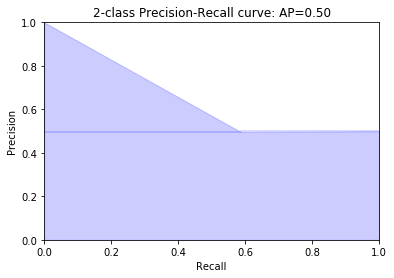

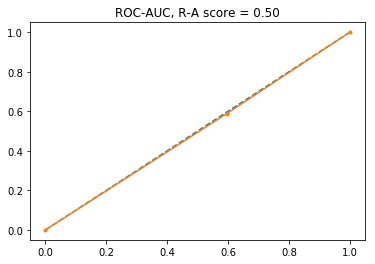

In [176]:
print(accuracy_score(y_test, clf.predict(X_test)))
drawResults(clf, X_test, y_test)

0.4399723374827109


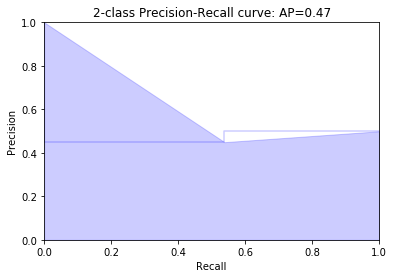

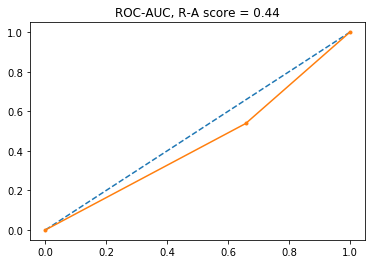

In [177]:
print(accuracy_score(y_test1, clf1.predict(X_test1)))
drawResults(clf1, X_test1, y_test)

In [168]:
clf2 = LogisticRegression(random_state=0, solver='lbfgs') 
print(clf.predict_proba(X_train)[0])
print(np.concatenate((clf.predict_proba(X_train), clf1.predict_proba(X_train1)), axis = 1))
clf2.fit(np.concatenate((clf.predict_proba(X_train), clf1.predict_proba(X_train1)), axis = 1), y_train)

[0.49999987 0.50000013]
[[0.49999987 0.50000013 0.49770277 0.50229723]
 [0.50004411 0.49995589 0.50094173 0.49905827]
 [0.4999505  0.5000495  0.49321043 0.50678957]
 ...
 [0.50001206 0.49998794 0.49197903 0.50802097]
 [0.49999993 0.50000007 0.46897825 0.53102175]
 [0.50010072 0.49989928 0.50848659 0.49151341]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.4426002766251729


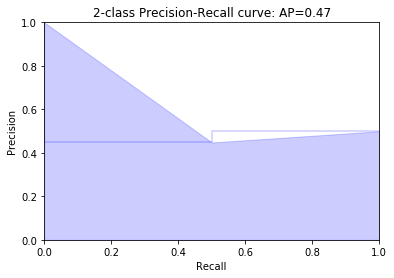

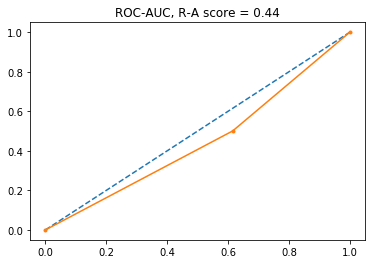

In [178]:
print(accuracy_score(y_test1, 
                     clf2.predict(
                         np.concatenate((clf.predict_proba(X_test), clf1.predict_proba(X_test1)), axis = 1))))
drawResults(clf2, np.concatenate((clf.predict_proba(X_test), clf1.predict_proba(X_test1)), axis = 1), y_test)

## Меняем shape выборки ##

In [179]:
newX = np.concatenate((X, X1), axis = 1)

In [180]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(newX, y, test_size=0.2, random_state=42)

0.45878284923928075


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


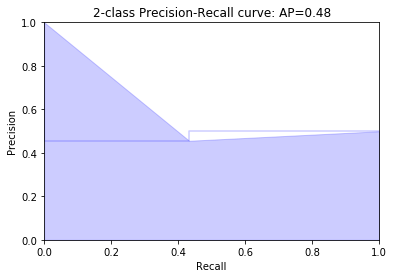

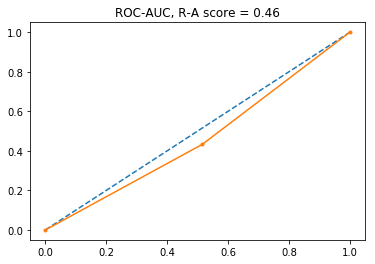

In [181]:
clf4 = LogisticRegression(random_state=0, solver='lbfgs') 
clf4.fit(X_train_n, y_train_n)
print(accuracy_score(y_test_n, clf4.predict(X_test_n)))
drawResults(clf4, X_test_n, y_test_n)

## XGBOOST ##

In [182]:
import xgboost as xgb

In [174]:
cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=1, gamma=1)

In [175]:
cl.fit(X_train_n, y_train_n)
print(accuracy_score(y_test_n, cl.predict(X_test_n)))

0.42655601659751036


**Вывод** Размеры изображений разные, так что добавление нулей не влияет на классфикацию. Т.е среди текстовых есть как маленькие, так и большие изоражения. Было бы полезно приводить к одному масштабу, нормализовать. Не учитывалось так же положение пикселей на исходном изображении

# Использование только xml #


In [183]:
from xml.dom import minidom
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [184]:

folder_text_path = glob.glob('2 - DA/Text/*') 

raw_xml_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() == 'L':
        raw_xml_text[filename.upper()] = minidom.parse(filename)

In [185]:
def divideData(xml_file, label, data):
    
    for i, wordRect in enumerate(xml_file.getElementsByTagName('WordFragment')):
        bCounts = max((int) (wordRect.attributes['BlackCount'].value), 0)
        wCounts = max((int) (wordRect.attributes['WhiteHolesCount'].value), 0)
        hCounts = max((int) (wordRect.attributes['HorzStrokesCount'].value), 0)
        vCounts = max((int) (wordRect.attributes['VertStrokesCount'].value), 0)
        mLength = max((int) (wordRect.attributes['MaxHorzStrokeLength'].value), 0)
        
        rect = wordRect.getElementsByTagName('Rect')[0]
        
        lefty = max((int) (rect.attributes['Left'].value) - 1, 0)
        leftx = max((int) (rect.attributes['Top'].value) - 1, 0)
        righty = (int) (rect.attributes['Right'].value) 
        rightx = (int) (rect.attributes['Bottom'].value)
        
        width = abs(rightx - leftx)
        height = abs(righty - lefty)
        sq = width * height * 1.0

        data.append({
            'bc' : bCounts / sq,
            'wc' : wCounts / sq,
            'hc' : hCounts / sq,
            'vc' : vCounts / sq,
            'ml' : mLength / sq,
            'isText' : label
        })
        


In [186]:
data = []

for filename in raw_xml_text:
    divideData(raw_xml_text[filename], 1, data)

In [187]:
folder_text_path = glob.glob('2 - DA/Nontext/*')         
raw_xml_text = dict()
for filename in folder_text_path:
    if filename[-1].upper() == 'L':
        raw_xml_text[filename.upper()] = minidom.parse(filename)
        
for filename in raw_xml_text:
    divideData(raw_xml_text[filename], 0, data)

In [188]:
data = pd.DataFrame(data)

In [189]:
data.to_csv("dataset_only_xml.scv", sep='\t', encoding='utf-8')

In [190]:
data1 = pd.read_csv("dataset_only_xml.scv", sep='\t')

In [191]:
data1.isText = data1.isText.astype(int)

In [192]:
print(data1.head(1))

   Unnamed: 0        bc        hc  isText        ml        vc   wc
0           0  0.583333  0.138889       1  0.138889  0.138889  0.0


In [193]:
y = data1.isText.values

In [194]:
X = (data1.loc[:, ~data1.columns.isin(['isText', 'Unnamed', 'im'])].values)[:, 1:]

## Разделение на тестовую и тренировочную выборку ##

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



def drawResults(est, X_test, y_test):
    
    y_score = est.predict(X_test)
    
    average_precision = average_precision_score(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
    
    
    
    auc = roc_auc_score(y_test, y_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC-AUC, R-A score = {0:0.2f}'.format(auc))
    plt.show()
    

## Обучение модели ##

### LogisticRegression ###

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
mean = np.mean(X_train)
std = np.std(X_train)
X_train1 = (X_train - mean) / std
X_test1 = (X_test - mean) / std
#X_train1 = X_train
#X_test1 = X_test

In [199]:
clf = LogisticRegression(random_state=0, solver='lbfgs') 
clf.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
print(accuracy_score(y_test, clf.predict(X_test1)))

0.8301557777261102


Без нормализации качество было 0.5, нормализация значительно повысила качество

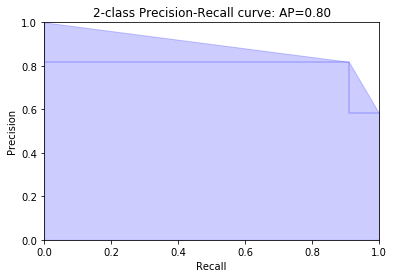

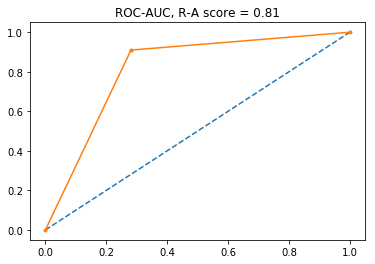

In [201]:
drawResults(clf, X_test1, y_test)

### XGBOOST ###

In [202]:
import xgboost as xgb

cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=1, gamma=1)

cl.fit(X_train, y_train)
print(accuracy_score(y_test, cl.predict(X_test)))

0.8435247616833295


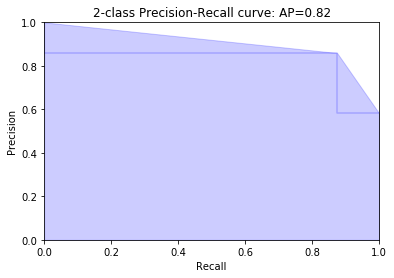

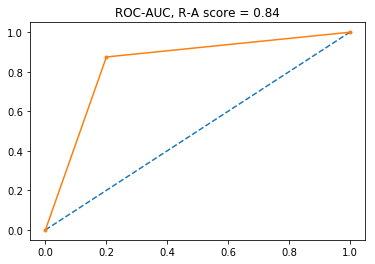

In [203]:
drawResults(cl, X_test, y_test)

### XGBOOST с нормализацией ###

0.8435247616833295


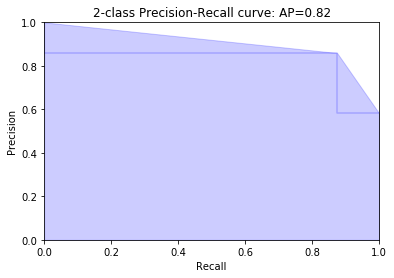

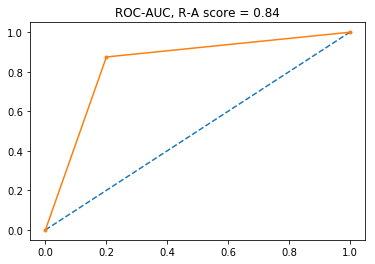

In [205]:
import xgboost as xgb

cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree=1, gamma=1)

cl.fit(X_train1, y_train)
print(accuracy_score(y_test, cl.predict(X_test1)))

drawResults(cl, X_test1, y_test)

### RandomForest ###

/usr/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9168797953964194


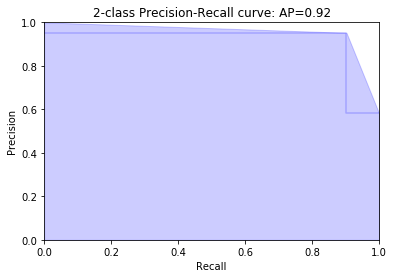

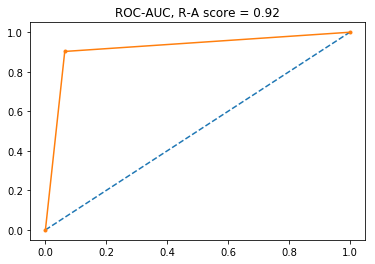

In [206]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier()

cl.fit(X_train1, y_train)
print(accuracy_score(y_test, cl.predict(X_test1)))

drawResults(cl, X_test1, y_test)

**Вывод:** Не тюнил парметры. XGBoost работает лучше чем Logistic Regression и без нормализации. RandomForestClassifier со стандартными параметрами показал лучший результат. После анализа ошибок закономерности в сделанных ошибок не найдено